# **PROJECT INTRODUCTION: Identify a Best Picture Winner based on its Craft Category Nominations**
------
## Context

The Oscar ceremony is the most prestigious ceremony in cinema that recognizes achievements in various filmmaking craft aspects (such as directing/ acting/ screenplay/ etc.) in the Craft Categories AND finding out the 'best film of the year' in the Best Picture Category.

It also inspires an engaging community of movie fans who, like sports fans, are into finding out what movies would win Best Picture.

Therefore, upon the Oscar Nomination Announcement & before the official ceremony, using only the Nomination List, **we want to predict which of the Best Picture Nominees have the highest probability of winning Best Picture** and doing so, **understanding what film-making aspects goes into creating a "best of the year" movie**.

------
## Target Audience:

*   Movie Fans who want to see what movie would win Best Picture
*   Studio Producers who are wanting to create a "Best Picture Movie" and therefore, want to see what craft aspect they should focus on.

------
# Targeted Conclusion:

*   Identify Craft Nomination Package among Best Picture Winners.
*   Predict the Best Picture Winners among a list of Best Picture Nominees upon Oscar Nominatino Announcement




In [ ]:
#Import Python Library
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-1-57218f6ec2fa>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# **Starting with OSCAR AWARD DATASET:**

**Feature all movies/ people that were in competition at the Oscar throughout the ceremony entirety.**

1. **year_film** = Year the movie was released

2. **year_ceremony** = Year of the Oscar ceremony that awards the movie.
*For example: Oscar in Year Ceremony 2023 would be for awarding movies release in 2022*

3. **ceremony** = Oridinal Count of the Oscar Ceremony

4. **category** = Category the movie was competiting in.

There are 4 types of categories honored at the Oscar

*   Best Picture Category = Recognition for the movie deemed as overall "Best of The year"

*   Craft Categories = Recognition for the movie in specific aspect of film-making crafts. *For example: Directing, Screenplay, etc.*

*   Honorary Category = Non-competitive, non-annual category used as recognition for specific individual/ movie with special contribution to cinema. *For example: Walt Disney receives an honorary oscar for his work in animation.*

*   Jean Hersholt Category = Non-competitive, non-annual category used as recognition for specific individual/ movie with special contribution to humanitarian causes. *For example: Angelina Jolie


5. **name** = Individual recipent/credit of the Oscar
*For example: For Best Picture, the credit would be the producer. For Best Screenplay, the credit would be writers *italicized text*

6. **film** = Movie recipent of the Oscar.

7. **winner** = Boolean Data, indicating 2 statuses:

*   True = The movie/ individual winning the category it was competiting in
*   False =  The movie/ individual only nominated for the category it was competing in


*Note:

*   For Honorary Category: No 'film' is listed, just 'name' - as the award only goes to a specific individuals.

*   For Jean Hersholt Category: No 'film' & No 'name' is listed = as the award is not a part of awarding cinematic contribution.

In [ ]:
# @title Summary of Oscar Dataset

#Upload Oscar Award Dataset
df = pd.read_csv('https://raw.githubusercontent.com/HieuThuTu/Best-Picture-Nominee/main/the_oscar_award.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


# **Initial Cleaning on OSCAR AWARD DATASET**

In [ ]:
# @title Checking for Duplicated Data
#Check Duplicated Data
df.duplicated().sum()
df[df.duplicated(keep = False)]

year_film  year_ceremony  ceremony                          category  \
6219        1983           1984        56             MUSIC (Original Song)   
6220        1983           1984        56             MUSIC (Original Song)   
7066        1991           1992        64             MUSIC (Original Song)   
7068        1991           1992        64             MUSIC (Original Song)   
7394        1994           1995        67             MUSIC (Original Song)   
7395        1994           1995        67             MUSIC (Original Song)   
8862        2007           2008        80             MUSIC (Original Song)   
8864        2007           2008        80             MUSIC (Original Song)   
8865        2007           2008        80             MUSIC (Original Song)   
9090        2009           2010        82             MUSIC (Original Song)   
9091        2009           2010        82             MUSIC (Original Song)   
10513       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   
10514       2020           2021        93  JEAN HERSHOLT HUMANITARIAN AWARD   

                                                    name  \
6219   Music by Michel Legrand; Lyric by Alan Bergman...   
6220   Music by Michel Legrand; Lyric by Alan Bergman...   
7066        Music by Alan Menken; Lyric by Howard Ashman   
7068        Music by Alan Menken; Lyric by Howard Ashman   
7394              Music by Elton John; Lyric by Tim Rice   
7395              Music by Elton John; Lyric by Tim Rice   
8862     Music by Alan Menken; Lyric by Stephen Schwartz   
8864     Music by Alan Menken; Lyric by Stephen Schwartz   
8865     Music by Alan Menken; Lyric by Stephen Schwartz   
9090                     Music and Lyric by Randy Newman   
9091                     Music and Lyric by Randy Newman   
10513                                                NaN   
10514                                                NaN   

                            film  winner  
6219                       Yentl   False  
6220                       Yentl   False  
7066        Beauty and the Beast   False  
7068        Beauty and the Beast   False  
7394               The Lion King   False  
7395               The Lion King   False  
8862                   Enchanted   False  
8864                   Enchanted   False  
8865                   Enchanted   False  
9090   The Princess and the Frog   False  
9091   The Princess and the Frog   False  
10513                        NaN    True  
10514                        NaN    True

Duplication comes from 2 sources, both of which does not require Removal of Duplicated Rows.

*   Music (Original Song) Category. This is because this is the only category that allows one 'name', representing a  film's composing team, to get >1 Nominations per year for working on multiple songs, resulting in duplicated rows
*   The Jean Hersholt Award in 2021, which is awarded to 2 Organization, but does not have their names listed.

In [ ]:
# @title Removing (1) Non-Competitive Categories & (2) Irrelevant Categories that is not related to Feature-length Films that compete for Best Picture (eg: Short Film/)

#For this analysis, we only consider Competitive Awards only; so we need to Remove All Special Categories (Honorary/ Huminatiran/ etc.)
#Category Names also change throughout history (for example, Adapted Screenplay was 1st named Writing based on previous material). So we need to adjust Category Names that have similar meaning, etc.

#Removing Non-Competitive Categories &
special_category = ['GORDON E. SAWYER AWARD', 'AWARD OF COMMENDATION', 'JEAN HERSHOLT HUMANITARIAN AWARD','IRVING G. THALBERG MEMORIAL AWARD',
                    'SPECIAL ACHIEVEMENT AWARD', 'SPECIAL ACHIEVEMENT AWARD (Visual Effects)', 'SPECIAL ACHIEVEMENT AWARD (Sound Effects)', 'SPECIAL ACHIEVEMENT AWARD (Sound Effects Editing)', 'SPECIAL AWARD', 'SPECIAL ACHIEVEMENT AWARD (Sound Effects Editing)','SPECIAL ACHIEVEMENT AWARD (Sound Editing)',
                    'HONORARY FOREIGN LANGUAGE FILM AWARD', 'HONORARY AWARD', 'HONORARY FOREIGN LANGUAGE FILM AWARD','SPECIAL FOREIGN LANGUAGE FILM AWARD']
df = df.drop(df[df['category'].isin(special_category)].index)

#Removing Irrelevant Categories
removed_category = df[df['category'].isin([ 'DOCUMENTARY SHORT FILM','WRITING (Title Writing)','WRITING (Original Motion Picture Story)','WRITING (Motion Picture Story)','SHORT SUBJECT (Cartoon)','SHORT SUBJECT (Comedy)','SHORT SUBJECT (Novelty)','ASSISTANT DIRECTOR','DANCE DIRECTION','SHORT SUBJECT (Color)','SHORT SUBJECT (One-reel)','SHORT SUBJECT (Two-reel)','DOCUMENTARY (Short Subject)', 'SHORT SUBJECT (Live Action)', 'SHORT FILM (Animated)', 'SHORT FILM (Live Action)', 'SHORT SUBJECT (Animated)', 'SHORT FILM (Dramatic Live Action)'])].index
df = df.drop(removed_category)

In [ ]:
# @title This leaves us only with Best Picture & Craft Categories. Next step, we need to unify the naming of these categories to be consistent across entire Oscar History

#Identify List of All Oscar Categories
all_category = df['category'].unique().tolist()

#Unify Naming Variations of "Best Picture" Category into one (ref https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture)
best_picture_name = [i for i in all_category if bool(re.search(r'^.*PICTURE.*$', i)) == True]
df.loc[df['category'].isin(best_picture_name),'category'] = 'Best Picture'
df.loc[df['category'] == 'OUTSTANDING PRODUCTION','category'] = 'Best Picture'

#Unify Naming Variations of "Best Director" Category into one
best_director_name = [i for i in all_category if bool(re.search(r'^.*DIRECTING.*$', i)) == True]
df.loc[df['category'].isin(best_director_name),'category'] = 'Best Director'

#Unify Naming Variations of "Original" & "Screenplay" Category
df.loc[(df['film'].isin(['Our Dancing Daughters', 'The Big House','The Cop;'])) & (df['category'] == 'WRITING'), 'category'] = 'Original Screenplay'

original_screeplay = ['WRITING (Original Story)', 'WRITING (Original Screenplay)','WRITING (Story and Screenplay)','WRITING (Screenplay--Original)',
                      'WRITING (Story and Screenplay--written directly for the screen)',
                      'WRITING (Story and Screenplay--based on material not previously published or produced)', 'WRITING (Story and Screenplay--based on factual material or material not previously published or produced)',
                      'WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)',
                      'WRITING (Screenplay Written Directly for the Screen)']

adapted_screenplay = ['WRITING (Adaptation)', 'WRITING','WRITING (Screenplay)','WRITING (Screenplay--Adapted)',
                      'WRITING (Screenplay--based on material from another medium)','WRITING (Screenplay Adapted from Other Material)', 'WRITING (Screenplay Based on Material from Another Medium)',
                       'WRITING (Screenplay Based on Material Previously Produced or Published)', 'WRITING (Adapted Screenplay)']

df.loc[df['category'].isin(original_screeplay),'category'] = 'Original Screenplay'
df.loc[df['category'].isin(adapted_screenplay),'category'] = 'Adapted Screenplay'


#Unify Naming Variations of "Leading Act" Category
best_actor = ['ACTOR', 'ACTOR IN A LEADING ROLE']
best_actress = ['ACTRESS', 'ACTRESS IN A LEADING ROLE']
df.loc[df['category'].isin(best_actor),'category'] = 'Best Actor'
df.loc[df['category'].isin(best_actress),'category'] = 'Best Actress'

#Unify Naming Variations of "Supporting Act" Category
df.loc[df['category'].isin(['ACTOR IN A SUPPORTING ROLE']),'category'] = 'Best Supporting Actor'
df.loc[df['category'].isin(['ACTRESS IN A SUPPORTING ROLE']),'category'] = 'Best Supporting Actress'


#Unify Naming Variations of other Categories
foreign_film = ['FOREIGN LANGUAGE FILM','INTERNATIONAL FEATURE FILM']
editing = ['FILM EDITING']
sound = [i for i in all_category if bool(re.search(r'^.*SOUND.*$', i)) == True]
cinematography = [i for i in all_category if bool(re.search(r'^.*CINEMATOGRAPHY.*$', i)) == True]
production_design = ['ART DIRECTION','ART DIRECTION (Black-and-White)','ART DIRECTION (Color)','PRODUCTION DESIGN']
score = [i for i in all_category if bool(re.search(r'^.*Scor.*$', i)) == True]
song = [i for i in all_category if bool(re.search(r'^.*Song.*$', i)) == True and bool(re.search(r'^.*Scor.*$', i)) == False]
visual_effects = [i for i in all_category if bool(re.search(r'^.*EFFECTS.*$', i)) == True and bool(re.search(r'^.*SOUND.*$', i)) == False]
costume_design = [i for i in all_category if bool(re.search(r'^.*COSTUME DESIGN.*$', i)) == True]
makeup_hair = ['MAKEUP','MAKEUP AND HAIRSTYLING']
documentary = [i for i in all_category if bool(re.search(r'^.*DOCUMENTARY.*$', i)) == True]
animated = ['ANIMATED FEATURE FILM']

df.loc[df['category'].isin(foreign_film),'category'] = 'Foreign Film'
df.loc[df['category'].isin(editing),'category'] = 'Editing'
df.loc[df['category'].isin(sound),'category'] = 'Sound'
df.loc[df['category'].isin(cinematography),'category'] = 'Cinematography'
df.loc[df['category'].isin(production_design),'category'] = 'Production Design'
df.loc[df['category'].isin(score),'category'] = 'Score'
df.loc[df['category'].isin(song),'category'] = 'Song'
df.loc[df['category'].isin(visual_effects),'category'] = 'Visual Effects'
df.loc[df['category'].isin(costume_design),'category'] = 'Costume Design'
df.loc[df['category'].isin(makeup_hair),'category'] = 'Makeup & Hair'
df.loc[df['category'].isin(documentary),'category'] = 'Documentary Film'
df.loc[df['category'].isin(animated),'category'] = 'Animated Film'

In [ ]:
#@title Oscar Award Dataset (df) after the Naming Variation Adjustment
df.sample(5)

year_film  year_ceremony  ceremony               category  \
7402        1994           1995        67           Best Picture   
9667        2014           2015        87         Cinematography   
5197        1974           1975        47  Best Supporting Actor   
6144        1982           1983        55    Original Screenplay   
10544       2021           2022        94         Cinematography   

                                    name                        film  winner  
7402               Niki Marvin, Producer    The Shawshank Redemption   False  
9667   Lukasz Zal and Ryszard Lenczewski                         Ida   False  
5197                        Jeff Bridges   Thunderbolt and Lightfoot   False  
6144                 Douglas Day Stewart  An Officer and a Gentleman   False  
10544                    Janusz Kaminski             West Side Story   False

# **Timeframe Consideration for the OSCAR AWARD DATASET**

There’ve been 96 Oscars Ceremony from 1924-2023. However, not all categories open for competition exist in entire 94 Years, due to the ever-expanding Oscar (eg: Editing Category does not exist until 1940).

We need to consider only timeframe when the Number of Categories open for competition at the Oscar is more consistent, so that we can fairly assess how theses craft categories could impact chance of winning Best Picture

### [Updated Outcome]: We'd only consider from year_ceremony 1940 onwards

In [ ]:
# @title Identify & Remove Outliers, when the Number of Craft Categories open for competition at the Oscar is too little, OR too many

#Calculate Number of Categories open for competition each year
category_count = df.copy()
#category_count['category'] = category_count['category'].replace(['Best Actor', 'Best Actress','Best Supporting Actor','Best Supporting Actress','Original Screenplay','Adapted Screenplay']
                                                                #,['Best Lead Performance','Best Lead Performance','Best Supporting Performance','Best Supporting Performance','Best Screenplay','Best Screenplay'])
category_count = category_count[['year_ceremony','category']].groupby('year_ceremony')['category'].nunique().reset_index().rename(columns={'category':'no_of_categories'})

#Identify Outlier
q1 = category_count['no_of_categories'].quantile(0.25)
q3 = category_count['no_of_categories'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

print(f"We only consider data from Year_Ceremony {category_count[(lower < category_count['no_of_categories']) & (category_count['no_of_categories'] < upper)]['year_ceremony'].min()} onwards")
#df1[(lower < df1['no_of_categories']) & (df1['no_of_categories'] < upper)]['year_ceremony'].min()

We only consider data from Year_Ceremony 1940 onwards


([<matplotlib.axis.XTick at 0x7c666e505990>,
 [Text(1928, 0, '1928'),
  Text(1933, 0, '1933'),
  Text(1938, 0, '1938'),
  Text(1943, 0, '1943'),
  Text(1948, 0, '1948'),
  Text(1953, 0, '1953'),
  Text(1958, 0, '1958'),
  Text(1963, 0, '1963'),
  Text(1968, 0, '1968'),
  Text(1973, 0, '1973'),
  Text(1978, 0, '1978'),
  Text(1983, 0, '1983'),
  Text(1988, 0, '1988'),
  Text(1993, 0, '1993'),
  Text(1998, 0, '1998'),
  Text(2003, 0, '2003'),
  Text(2008, 0, '2008'),
  Text(2013, 0, '2013'),
  Text(2018, 0, '2018'),
  Text(2023, 0, '2023')])

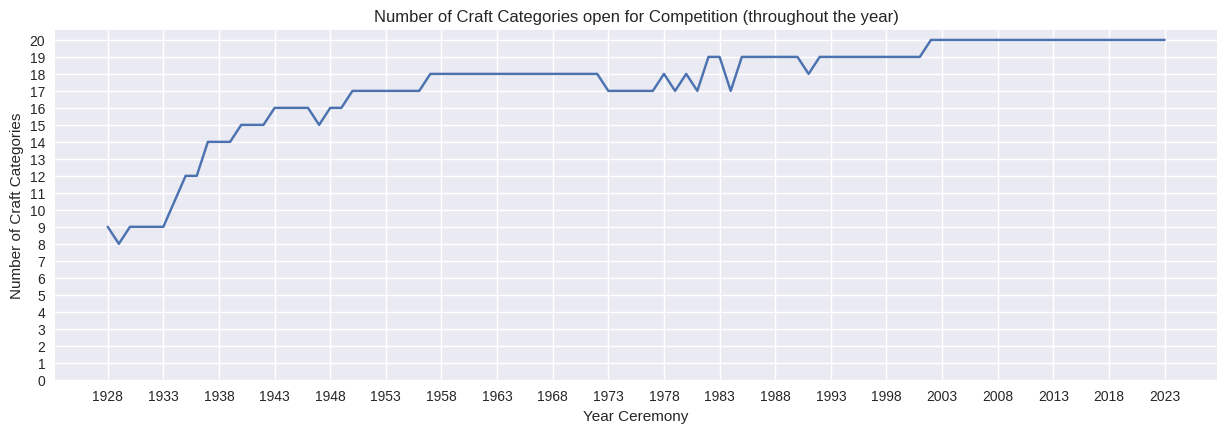

In [ ]:
# @title Visualize the number of Craft Categories open for competition throughout the year
plt.figure(figsize = (15,10))
plt.subplot(211)
sns.lineplot(data=category_count, x='year_ceremony', y = 'no_of_categories')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Craft Categories')
plt.title('Number of Craft Categories open for Competition (throughout the year)')
plt.yticks(np.arange(0, 21, step=1))
plt.xticks(np.arange(1928, 2024, step=5))

# **Generate BEST PICTURE NOMINEE DATASET as the base**

We only consider data timeframe from year_ceremony 1940 onwards

Next step, given our targeted objectives are:

*   Identify Nomination Package for eventual Best Picture Winners
*   Predict the Best Picture Winners among a list of Best Picture Nominees right when Oscar announcement is announced.

We would focus on **using Best Picture Nominees only as the base for our dataset** - which are all movies that were nominated/ winning at the Best Picture Category

In [ ]:
#@title Create a dataframe comprising only of Best Picture Contenders (including both Best Picture Nominees & Best Picture Winners)
best_picture = df[(df['category'] == 'Best Picture')&(df['winner'].notnull())&(df['year_ceremony']>1939)]
best_picture = best_picture.rename(columns = {'winner':'best_picture'})
#best_picture = best_picture.drop('winner', axis = 1)
best_picture.sample(5)

year_film  year_ceremony  ceremony      category  \
5372       1975           1976        48  Best Picture   
8641       2005           2006        78  Best Picture   
7859       1998           1999        71  Best Picture   
2354       1949           1950        22  Best Picture   
1913       1945           1946        18  Best Picture   

                                                   name               film  \
5372        Martin Bregman and Martin Elfand, Producers  Dog Day Afternoon   
8641          Paul Haggis and Cathy Schulman, Producers              Crash   
7859  Alison Owen, Eric Fellner and Tim Bevan, Produ...          Elizabeth   
2354                                          Paramount        The Heiress   
1913                    Selznick International Pictures         Spellbound   

      best_picture  
5372         False  
8641          True  
7859         False  
2354         False  
1913         False

In [ ]:
# @title Adding info about Craft Categories (either No Nomination/ Nomination/ Win) of these Best Picture Contenders
def best_dic(row):
  best_director = df[df['category'] == 'Best Director']
  if row['film'] in best_director['film'].tolist():
    if (best_director[best_director['film'] == row['film']]['winner']).any() & (best_director[best_director['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_director'] = best_picture.apply(best_dic, axis = 1)

def original_scrpl(row):
  k = df[df['category'] == 'Original Screenplay']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_original_screenplay'] = best_picture.apply(original_scrpl, axis = 1)

def adapted_scrpl(row):
  k = df[df['category'] == 'Adapted Screenplay']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_adapted_screenplay'] = best_picture.apply(adapted_scrpl, axis = 1)


def best_act(row):
  best_actor = df[df['category'] == 'Best Actor']
  if row['film'] in best_actor['film'].tolist():
    if (best_actor[best_actor['film'] == row['film']]['winner']).any() & (best_actor[best_actor['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'

best_picture['best_actor'] = best_picture.apply(best_act, axis = 1)


def best_actr(row):
  best_actress = df[df['category'] == 'Best Actress']
  if row['film'] in best_actress['film'].tolist():
    if (best_actress[best_actress['film'] == row['film']]['winner']).any() & (best_actress[best_actress['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_actress'] = best_picture.apply(best_actr, axis = 1)


def best_support_act(row):
  k = df[df['category'] == 'Best Supporting Actor']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_supporting_actor'] = best_picture.apply(best_support_act, axis = 1)


def best_support_actr(row):
  k = df[df['category'] == 'Best Supporting Actress']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_supporting_actress'] = best_picture.apply(best_support_actr, axis = 1)


def sound(row):
  k = df[df['category'] == 'Sound']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_sound'] = best_picture.apply(sound, axis = 1)

def cin(row):
  k = df[df['category'] == 'Cinematography']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_cinematography'] = best_picture.apply(cin, axis = 1)

def prod(row):
  k = df[df['category'] == 'Production Design']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_production_design'] = best_picture.apply(prod, axis = 1)

def score(row):
  k = df[df['category'] == 'Score']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_score'] = best_picture.apply(score, axis = 1)

def song(row):
  k = df[df['category'] == 'Song']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_song'] = best_picture.apply(song, axis = 1)

def vfx(row):
  k = df[df['category'] == 'Visual Effects']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_visual_effects'] = best_picture.apply(vfx, axis = 1)

def cos(row):
  k = df[df['category'] == 'Costume Design']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_costume_design'] = best_picture.apply(cos, axis = 1)

def mak(row):
  k = df[df['category'] == 'Makeup & Hair']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_makeup_hair'] = best_picture.apply(mak, axis = 1)

def doc(row):
  k = df[df['category'] == 'Documentary Film']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_documentary'] = best_picture.apply(doc, axis = 1)

def animated(row):
  k = df[df['category'] == 'Animated Film']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_animated_film'] = best_picture.apply(animated, axis = 1)

def foreign(row):
  k = df[df['category'] == 'Foreign Film']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_foreign_film'] = best_picture.apply(foreign, axis = 1)

def editing(row):
  k = df[df['category'] == 'Editing']
  if row['film'] in k['film'].tolist():
    if (k[k['film'] == row['film']]['winner']).any() & (k[k['film'] == row['film']]['year_ceremony'] == row['year_ceremony']).any():
      return 'Win'
    else:
      return 'Nom'
  else:
    return 'N/A'
best_picture['best_editing'] = best_picture.apply(editing, axis = 1)

In [ ]:
# @title Uniforming naming on the Craft Category Status of the Best Picture Contenders & keeping only relevant columns

#Re-adjusting 'Win'/'Nom'/'No Nomination' status on the Craft Categories of these Best Picture Contenders
best_picture = best_picture.replace('N/A',None)
best_picture = best_picture.replace(True,'Win')
best_picture = best_picture.replace(False,'Nom')

#Removing columns that we don't need
best_picture = best_picture.drop(columns={'year_film','ceremony','name','category'})


#Final Adjustment on Screenplay categories - wwhen overlapping between Best Story / Best Original Screenplay / Best Adapted Screenplay
best_picture.at[876, 'best_original_screenplay'] = None
best_picture.at[877, 'best_original_screenplay'] = None
best_picture.at[1200, 'best_original_screenplay'] = None
best_picture.at[10221, 'best_original_screenplay'] = None

# **Info on BEST PICTURE NOMINEE (bp_nominees) dataset**

**Feature all Contenders in Best Picture Category & their recognition across Craft Categories**

1. **year_ceremony** = Year of the Oscar ceremony that awards the movie.
2. **film** = Name of the movies
4. **best_picture** = Best Picture Nominees assuming 2 values:

*   'Nom': Only get nominated, did not win.
*   'Win': Win

4. **the various craft categories** = Recognition at the Craft Categories of the Best Picture Contenders, assuming 3 values:

*   'None" Did not get nominated.
*   'Nom': Only get nominated, did not win.
*   'Win': Win

Based on that, we also generate additional **BEST PICTURE WINNERS (bp_winner)** dataset

In [ ]:
# @title Best Picture Nominee Dataset
bp_nominees = best_picture.copy()
bp_nominees.head(5)
bp_nominees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 872 to 10723
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year_ceremony             501 non-null    int64 
 1   film                      501 non-null    object
 2   best_picture              501 non-null    object
 3   best_director             331 non-null    object
 4   best_original_screenplay  145 non-null    object
 5   best_adapted_screenplay   250 non-null    object
 6   best_actor                228 non-null    object
 7   best_actress              156 non-null    object
 8   best_supporting_actor     199 non-null    object
 9   best_supporting_actress   175 non-null    object
 10  best_sound                182 non-null    object
 11  best_cinematography       250 non-null    object
 12  best_production_design    208 non-null    object
 13  best_score                230 non-null    object
 14  best_song                 5

In [ ]:
# @title Generate Best Picture Winner Dataset
bp_winner = bp_nominees[bp_nominees['best_picture'] == 'Win']
bp_winner = bp_winner.sort_values(['year_ceremony','film'], ascending = [True, True])
bp_winner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 873 to 10718
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   year_ceremony             84 non-null     int64 
 1   film                      84 non-null     object
 2   best_picture              84 non-null     object
 3   best_director             80 non-null     object
 4   best_original_screenplay  28 non-null     object
 5   best_adapted_screenplay   54 non-null     object
 6   best_actor                53 non-null     object
 7   best_actress              25 non-null     object
 8   best_supporting_actor     53 non-null     object
 9   best_supporting_actress   34 non-null     object
 10  best_sound                45 non-null     object
 11  best_cinematography       55 non-null     object
 12  best_production_design    43 non-null     object
 13  best_score                51 non-null     object
 14  best_song                 9 

# **Overview of Craft Category Nomination across Best Picture Winners**

#### **Questions to answer:**

1.   How many Craft Categories an eventual Best Picture Winner should have nominations in?

2.   Which Top Craft Categories an eventual Best Picture Winner should have nominations in?

### **Data Merging Consideration**

We notice many Craft Categories (or shall be referred as "subcategories") share similar importance/ recognizing similar aspect of film-making crafts

*   Original & Adapted Screenplay both recognize the Screenplay Craft
*   Lead Actor & Actress both recgonize Lead Performance Craft
*   Supporting Actor & Actress both recognize Supporting Performance Craft

=> We'd merge these categories into ONE, to focus on analyzing the impact of the Craft FIRST (Dual Win/ Dual Nomination = MERGED as one).





In [ ]:
# @title Merge Nominations & Wins across Sub-categories into 1 (for example: dual nom in both Supporting Actor & Supporting Actress = one win in Supporting Performance)

#Counting Number of Craft Nom/ Wins among Best Picture Nominees
bp_nom_merged = bp_nominees.copy()
bp_win_merged = bp_winner.copy()

def best_lead_performance(row):
  if row['best_actor']=='Nom' and row['best_actress']=='Nom':
    return 'Nom'
  elif row['best_actor']=='Win' or row['best_actress']=='Win':
    return 'Win'
  elif row['best_actor']==None and row['best_actress']==None:
    return None
  else:
    return 'Nom'

def best_supporting_performance(row):
  if row['best_supporting_actor']=='Nom' and row['best_supporting_actress']=='Nom':
    return 'Nom'
  elif row['best_supporting_actor']=='Win' or row['best_supporting_actress']=='Win':
    return 'Win'
  elif row['best_supporting_actor']==None and row['best_supporting_actress']==None:
    return None
  else:
    return 'Nom'

def best_screenplay(row):
   if row['best_original_screenplay']=='Nom' and row['best_adapted_screenplay']=='Nom':
    return 'Nom'
   elif row['best_original_screenplay']==None and row['best_adapted_screenplay']==None:
    return None
   elif row['best_original_screenplay']=='Nom' or row['best_adapted_screenplay']=='Nom':
    return 'Nom'
   else:
    return 'Win'

bp_nom_merged['best_lead_performance'] = bp_nom_merged.apply(best_lead_performance, axis =1).drop(columns=['best_actor','best_actress'])
bp_nom_merged['best_supporting_performance'] = bp_nom_merged.apply(best_supporting_performance, axis =1).drop(columns=['best_supporting_actor','best_supporting_actress'])
bp_nom_merged['best_screenplay'] = bp_nom_merged.apply(best_screenplay, axis =1).drop(columns=['best_original_screenplay','best_adapted_screenplay'])
bp_nom_merged = bp_nom_merged.drop(columns={'best_actor','best_actress','best_supporting_actor','best_supporting_actress','best_original_screenplay','best_adapted_screenplay'})

bp_win_merged['best_lead_performance'] = bp_win_merged.apply(best_lead_performance, axis =1).drop(columns=['best_actor','best_actress'])
bp_win_merged['best_supporting_performance'] = bp_win_merged.apply(best_supporting_performance, axis =1).drop(columns=['best_supporting_actor','best_supporting_actress'])
bp_win_merged['best_screenplay'] = bp_win_merged.apply(best_screenplay, axis =1).drop(columns=['best_original_screenplay','best_adapted_screenplay'])
bp_win_merged = bp_win_merged.drop(columns={'best_actor','best_actress','best_supporting_actor','best_supporting_actress','best_original_screenplay','best_adapted_screenplay'})

([<matplotlib.axis.XTick at 0x7c666b932440>,
 [Text(1940, 0, '1940'),
  Text(1945, 0, '1945'),
  Text(1950, 0, '1950'),
  Text(1955, 0, '1955'),
  Text(1960, 0, '1960'),
  Text(1965, 0, '1965'),
  Text(1970, 0, '1970'),
  Text(1975, 0, '1975'),
  Text(1980, 0, '1980'),
  Text(1985, 0, '1985'),
  Text(1990, 0, '1990'),
  Text(1995, 0, '1995'),
  Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015'),
  Text(2020, 0, '2020')])

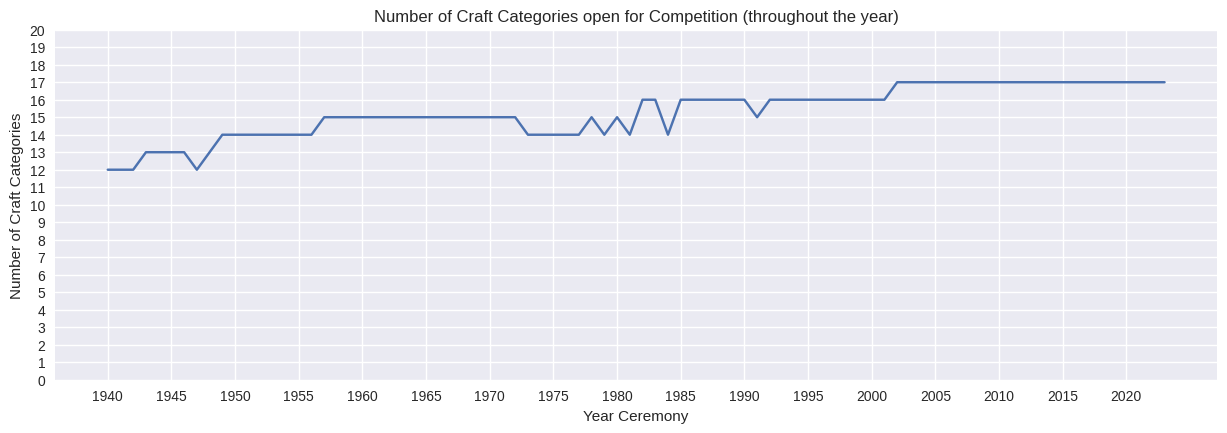

In [ ]:
# @title Number of Categories open for competition at Oscar upon merging subcategories
category_count_merged = df[df['year_ceremony']>1939].copy()
category_count_merged['category'] = category_count_merged['category'].replace(['Best Actor', 'Best Actress','Best Supporting Actor','Best Supporting Actress','Original Screenplay','Adapted Screenplay']
                                                                ,['Best Lead Performance','Best Lead Performance','Best Supporting Performance','Best Supporting Performance','Best Screenplay','Best Screenplay'])
category_count_merged = category_count_merged[['year_ceremony','category']].groupby('year_ceremony')['category'].nunique().reset_index().rename(columns={'category':'no_of_categories'})

plt.figure(figsize = (15,10))
plt.subplot(211)
sns.lineplot(data=category_count_merged, x='year_ceremony', y = 'no_of_categories')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Craft Categories')
plt.title('Number of Craft Categories open for Competition (throughout the year)')
plt.yticks(np.arange(0, 21, step=1))
plt.xticks(np.arange(1940, 2024, step=5))

In [ ]:
# @title Best Picture Nominee Dataset after merging the subcategories
bp_nom_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 872 to 10723
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year_ceremony                501 non-null    int64 
 1   film                         501 non-null    object
 2   best_picture                 501 non-null    object
 3   best_director                331 non-null    object
 4   best_sound                   182 non-null    object
 5   best_cinematography          250 non-null    object
 6   best_production_design       208 non-null    object
 7   best_score                   230 non-null    object
 8   best_song                    54 non-null     object
 9   best_visual_effects          47 non-null     object
 10  best_costume_design          132 non-null    object
 11  best_makeup_hair             31 non-null     object
 12  best_documentary             1 non-null      object
 13  best_animated_film           2 non-n

In [ ]:
# @title Best Picture Winner Dataset after merging the subcategories
bp_win_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 873 to 10718
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year_ceremony                84 non-null     int64 
 1   film                         84 non-null     object
 2   best_picture                 84 non-null     object
 3   best_director                80 non-null     object
 4   best_sound                   45 non-null     object
 5   best_cinematography          55 non-null     object
 6   best_production_design       43 non-null     object
 7   best_score                   51 non-null     object
 8   best_song                    9 non-null      object
 9   best_visual_effects          9 non-null      object
 10  best_costume_design          36 non-null     object
 11  best_makeup_hair             10 non-null     object
 12  best_documentary             0 non-null      object
 13  best_animated_film           0 non-nu

### **Counting Number of Nominated & Winning Craft Categories among Best Picture Winners**

##### [Updated Outcome]:


*   Best Picture Winners tend to get ~7 Nominateed Craft Categories, and consistently among the crop of Best Picture Nominees with high number of nominations in its year of competing
*   However, they are no longer win as many Craft Categories as before.

One possible explanation behind the trend is the **Preferential Ballot System **introduced since 2010s - which suggests that Best Picture Winner no longer needing to be everyone's "absolute favorite", but rather only having to be "the least disliked".

This outcome also suggests that not just focusing on volume of nominations, we should also look at what top craft categories that are consistently presented across all Best Picture Winners, to consider the categories that matter more than others.

In [ ]:
# @title Creating columns that count Number of Nominated & Winning Craft Categories among Best Picture Winners

#Counting Number of Craft Nom/ Wins among Best Picture Winners
def total_non_bp_nom(row):
  return row.iloc[3:].count()

def total_non_bp_win(row):
  count = 0
  for i in range(3,19):
    if row.iloc[i] == 'Win':
      count += 1
  return count

bp_win_merged['total_craft_nom'] = bp_win_merged.apply(total_non_bp_nom, axis =1)
bp_win_merged['total_craft_win'] = bp_win_merged.apply(total_non_bp_win, axis = 1)
bp_win_merged = pd.merge(bp_win_merged,category_count_merged,on='year_ceremony')
bp_win_merged['nom_percent'] = bp_win_merged['total_craft_nom']/bp_win_merged['no_of_categories'].round(1)
bp_win_merged['win_per_nom'] = (bp_win_merged['total_craft_win'] / bp_win_merged['total_craft_nom']).round(1)
bp_win_merged = bp_win_merged.rename(columns={'no_of_categories':'no_of_available_categories'})

#Counting Number of Craft Nom/ Wins among Best Picture Nominees
def total_non_bp_nom(row):
  return row.iloc[3:].count()

def total_non_bp_win(row):
  count = 0
  for i in range(3,19):
    if row.iloc[i] == 'Win':
      count += 1
  return count

bp_nom_merged['total_craft_nom'] = bp_nom_merged.apply(total_non_bp_nom, axis =1)
bp_nom_merged['total_craft_win'] = bp_nom_merged.apply(total_non_bp_win, axis = 1)
bp_nom_merged = pd.merge(bp_nom_merged,category_count_merged,on='year_ceremony')
bp_nom_merged['nom_percent'] = bp_nom_merged['total_craft_nom']/bp_nom_merged['no_of_categories'].round(1)
bp_nom_merged['win_per_nom'] = (bp_nom_merged['total_craft_win'] / bp_nom_merged['total_craft_nom']).round(1)
bp_nom_merged = bp_nom_merged.rename(columns={'no_of_categories':'no_of_available_categories'})

In [ ]:
bp_win_merged.sample(5)

year_ceremony             film best_picture best_director best_sound  \
72           2012       The Artist          Win           Win       None   
16           1956            Marty          Win           Win       None   
70           2010  The Hurt Locker          Win           Win        Win   
47           1987          Platoon          Win           Win        Win   
67           2007     The Departed          Win           Win       None   

   best_cinematography best_production_design best_score best_song  \
72                 Nom                    Nom        Win      None   
16                 Nom                    Nom       None      None   
70                 Nom                   None        Nom      None   
47                 Nom                   None       None      None   
67                None                   None       None      None   

   best_visual_effects  ... best_foreign_film best_editing  \
72                None  ...              None          Nom   
16                None  ...              None         None   
70                None  ...              None          Win   
47                None  ...              None          Win   
67                None  ...              None          Win   

   best_lead_performance best_supporting_performance best_screenplay  \
72                   Win                         Nom             Nom   
16                   Win                         Nom             Win   
70                   Nom                        None             Win   
47                  None                         Nom             Nom   
67                  None                         Nom             Win   

   total_craft_nom total_craft_win no_of_available_categories nom_percent  \
72               9               4                         17    0.529412   
16               6               3                         14    0.428571   
70               7               4                         17    0.411765   
47               6               3                         16    0.375000   
67               4               3                         17    0.235294   

    win_per_nom  
72          0.4  
16          0.5  
70          0.6  
47          0.5  
67          0.8  

[5 rows x 24 columns]


Note
*   total_craft_nom: Total Number of Nominated Craft Categories of the movie
*   total_craft_win: Total Number of Winning Craft Categories of the movie
*   no_of_available_categories: Total Number of Craft Categories open for Competition at the Oscar that year
*   nom_percent: % Craft Categories a Best Picture Winner get nominated in (='total craft_nom'/'no_of_available_categories')
*   win_per_nom: % Nominated Craft Categories a Best Picture Winner win at
(='total craft_win'/'total_craft_nom')







Text(0.5, 1.0, 'Range of Number of Nominated Categories of Best Picture Winners')

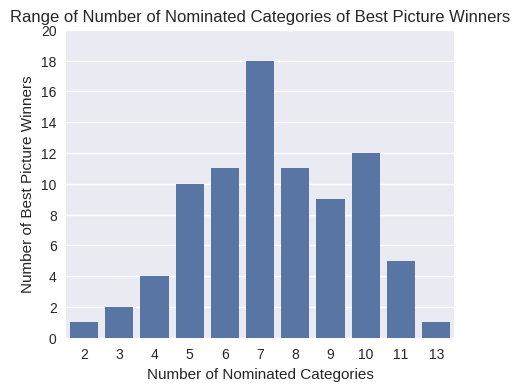

In [ ]:
# @title Number of Craft Categories Best Picture Winner have Nominations in? | Answwer: 7 to 11 Nominations
plt.figure(figsize = (5,4))
sns.countplot(data=bp_win_merged[['film','total_craft_nom']], x='total_craft_nom')
plt.xlabel('Number of Nominated Categories')
plt.ylabel('Number of Best Picture Winners')
plt.yticks(np.arange(0, 22, step=2))
plt.title('Range of Number of Nominated Categories of Best Picture Winners')

Text(0.5, 1.0, 'Number of Nominated Craft Categories of Best Picture Winners (by year)')

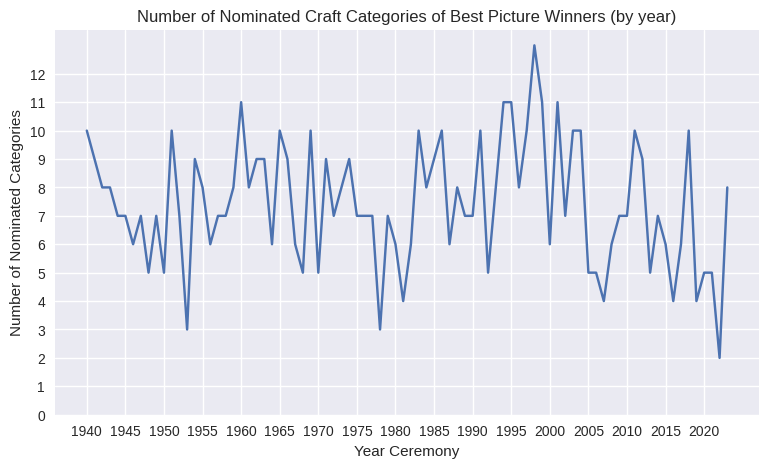

In [ ]:
# @title Number of Craft Catgories a Best Picture Winner have Nominations in throughout the year? - Fluctuate wildly
plt.figure(figsize = (20,5))
plt.subplot(121)
sns.lineplot(data=bp_win_merged, x='year_ceremony',y='total_craft_nom')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Nominated Categories')
plt.yticks(np.arange(0, 13, step=1))
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('Number of Nominated Craft Categories of Best Picture Winners (by year)')

Text(0.5, 1.0, 'Comparing to all Best Picture Nominees in same year of competition.')

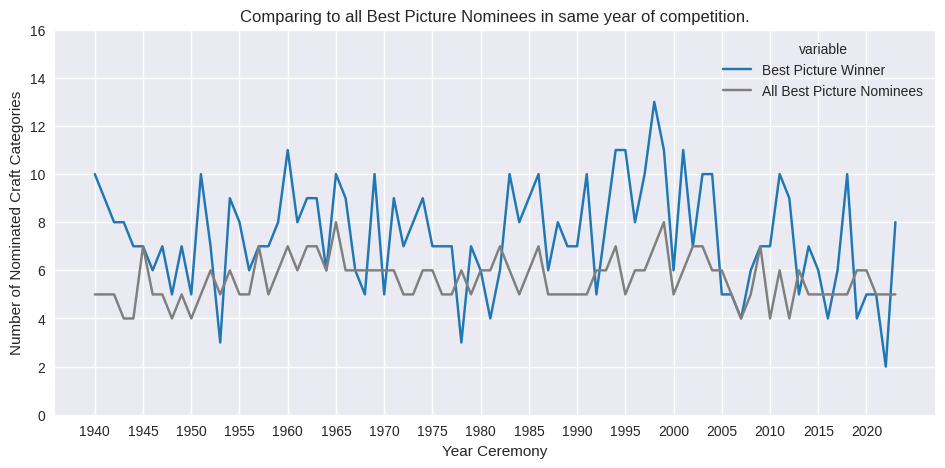

In [ ]:
# @title Comparing Number of Nominated Categories of Best Picture Winners to the average of all Best Picture Contenders in same year - On higher side
nom_percent_compare = bp_nom_merged.groupby('year_ceremony')['total_craft_nom'].mean().round(0).reset_index().rename(columns={'total_craft_nom':'nom_bp_nominees'})
nom_percent_compare = pd.merge(nom_percent_compare,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_nom']],on='year_ceremony')
nom_percent_compare = nom_percent_compare.rename(columns={'total_craft_nom':'nom_bp_winners'})

nom_percent_compare['Best Picture Winner'] = nom_percent_compare['nom_bp_winners']#/nom_percent_compare['no_of_categories']#.round(1)
nom_percent_compare['All Best Picture Nominees'] = nom_percent_compare['nom_bp_nominees']#/#nom_percent_compare['no_of_categories']#.round(1)
nom_percent_compare = nom_percent_compare.drop(columns={'nom_bp_nominees','nom_bp_winners','no_of_available_categories'})

palette = {
    'Best Picture Winner': 'tab:blue',
    'All Best Picture Nominees': 'tab:gray',
}

plt.figure(figsize = (25,5))
plt.subplot(121)
sns.lineplot(data=nom_percent_compare.melt('year_ceremony'), x='year_ceremony', y = 'value', hue = 'variable',palette = palette)
plt.xlabel('Year Ceremony')
plt.yticks(np.arange(0, 18, step=2))
plt.ylabel('Number of Nominated Craft Categories')
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('Comparing to all Best Picture Nominees in same year of competition.')

Text(0.5, 1.0, '% Available Craft Categories a Best Picture Winner get nominated in (by year)')

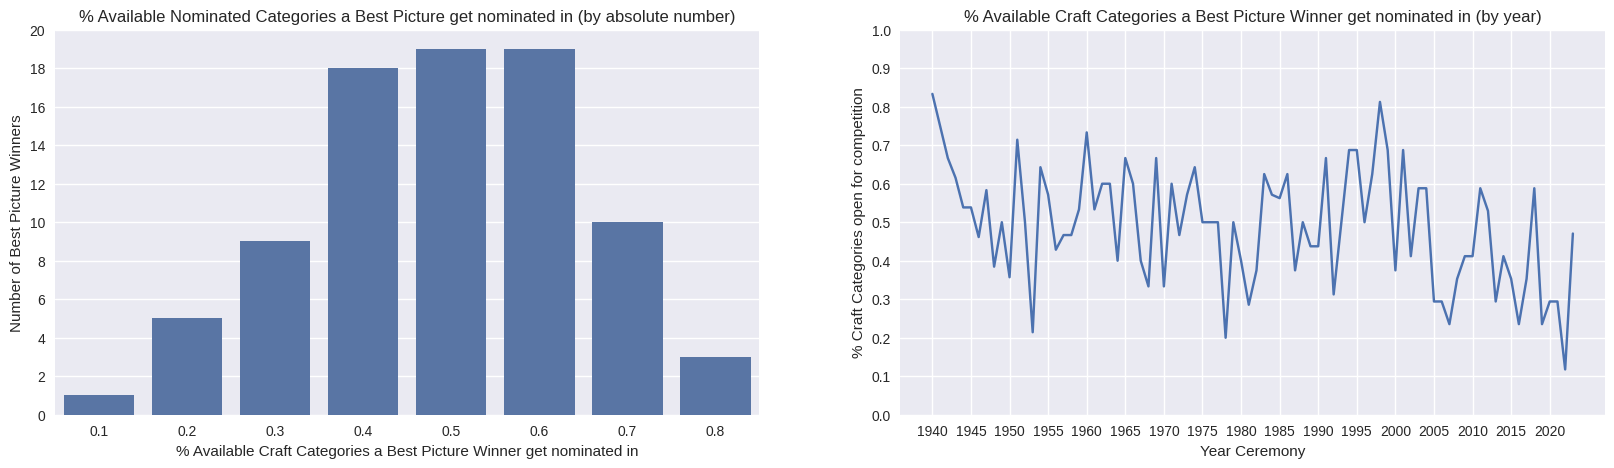

In [ ]:
# @title % Craft Categories a Best Picture Winner compete in compared to the number of Availalbe Craft Categories that year - Tend to be 40%~60%
nom_percent_compare = bp_nom_merged.groupby('year_ceremony')['total_craft_nom'].mean().round(0).reset_index().rename(columns={'total_craft_nom':'nom_bp_nominees'})
nom_percent_compare = pd.merge(nom_percent_compare,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_nom']],on='year_ceremony')
nom_percent_compare = nom_percent_compare.rename(columns={'total_craft_nom':'nom_bp_winners'})
nom_percent_compare['Best Picture Winner'] = nom_percent_compare['nom_bp_winners']/nom_percent_compare['no_of_available_categories'].round(1)
#nom_percent_compare['All Best Picture Nominees'] = nom_percent_compare['nom_bp_nominees']/nom_percent_compare['no_of_available_categories'].round(1)
nom_percent_compare = nom_percent_compare.drop(columns={'nom_bp_nominees','nom_bp_winners','no_of_available_categories'})

plt.figure(figsize = (20,5))

plt.subplot(121)
sns.countplot(data=bp_win_merged['nom_percent'].round(1).reset_index(), x='nom_percent')
plt.xlabel('% Available Craft Categories a Best Picture Winner get nominated in')
plt.ylabel('Number of Best Picture Winners')
plt.yticks(np.arange(0, 22, step=2))
plt.title('% Available Nominated Categories a Best Picture get nominated in (by absolute number)')

plt.subplot(122)
sns.lineplot(data=nom_percent_compare, x='year_ceremony', y = 'Best Picture Winner')
plt.xlabel('Year Ceremony')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('% Craft Categories open for competition')
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('% Available Craft Categories a Best Picture Winner get nominated in (by year)')

Text(0.5, 1.0, 'Range of Number of Winning Craft Categories')

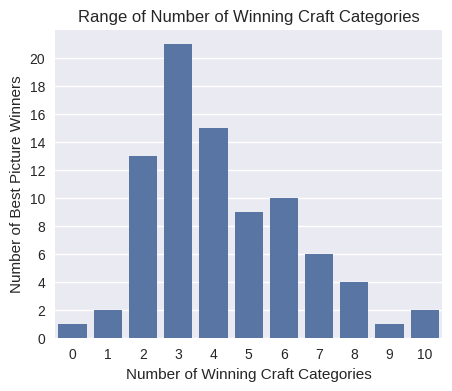

In [ ]:
# @title Number of Winning Craft Categories a BP Winner receives? | Answwer: 2 to 4 Wins
plt.figure(figsize = (5,4))
sns.countplot(data=bp_win_merged[['film','total_craft_win']], x='total_craft_win')
plt.xlabel('Number of Winning Craft Categories')
plt.ylabel('Number of Best Picture Winners')
plt.yticks(np.arange(0, 22, step=2))
plt.title('Range of Number of Winning Craft Categories')


Text(0.5, 1.0, 'Craft Win Rate Per Nomination')

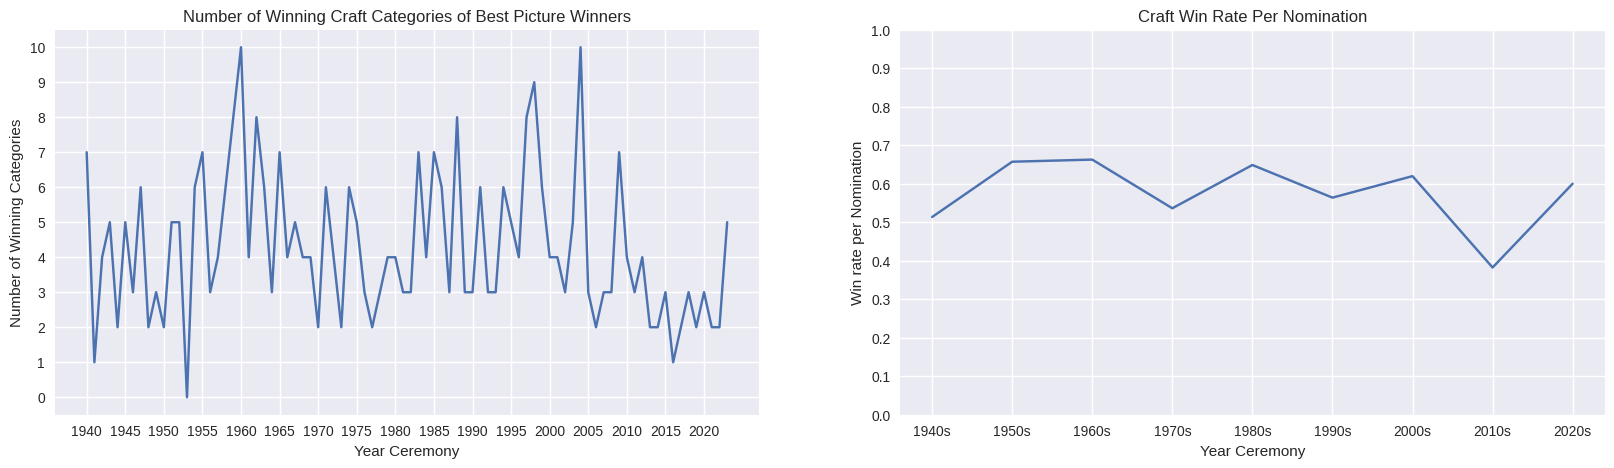

In [ ]:
# @title However, in recent year (from 2010s), Best Picture Winner no longer win as many craft categories as before

#Absolute Number
plt.figure(figsize = (20,5))
plt.subplot(121)
sns.lineplot(data=bp_win_merged, x='year_ceremony',y='total_craft_win')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Winning Categories')
plt.yticks(np.arange(0, 11, step=1))
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('Number of Winning Craft Categories of Best Picture Winners')


#Win Rate Per Nomination
win_percent_compare = bp_nom_merged.groupby('year_ceremony')['total_craft_win'].mean().round(0).reset_index().rename(columns={'total_craft_win':'win_bp_nominees'})
win_percent_compare = pd.merge(win_percent_compare,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_win']],on='year_ceremony')
win_percent_compare = win_percent_compare.rename(columns={'total_craft_win':'win_bp_winners'})

nom_percent_compare = bp_nom_merged.groupby('year_ceremony')['total_craft_nom'].mean().round(0).reset_index().rename(columns={'total_craft_nom':'nom_bp_nominees'})
nom_percent_compare = pd.merge(nom_percent_compare,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_nom']],on='year_ceremony')
nom_percent_compare = nom_percent_compare.rename(columns={'total_craft_nom':'nom_bp_winners'})
nom_percent_compare = nom_percent_compare.drop(columns={'no_of_available_categories'})

win_percent_compare = pd.merge(win_percent_compare,nom_percent_compare,on='year_ceremony')

win_percent_compare = win_percent_compare.groupby(win_percent_compare.index//10).mean()
win_percent_compare['best picture nominee with most craft wins']=win_percent_compare['win_bp_nominees']/win_percent_compare['nom_bp_nominees']
win_percent_compare['best picture winner']=win_percent_compare['win_bp_winners']/win_percent_compare['nom_bp_winners']

win_percent_compare = win_percent_compare.drop(columns={'win_bp_nominees','no_of_available_categories','win_bp_winners','nom_bp_nominees','nom_bp_winners'})
win_percent_compare['year_ceremony']= ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=win_percent_compare, x='year_ceremony', y = 'best picture winner')
plt.xlabel('Year Ceremony')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('Win rate per Nomination')
plt.title('Craft Win Rate Per Nomination')

Text(0.5, 1.0, 'Number of Winning Craft Categories of Best Picture Winners (by decade)')

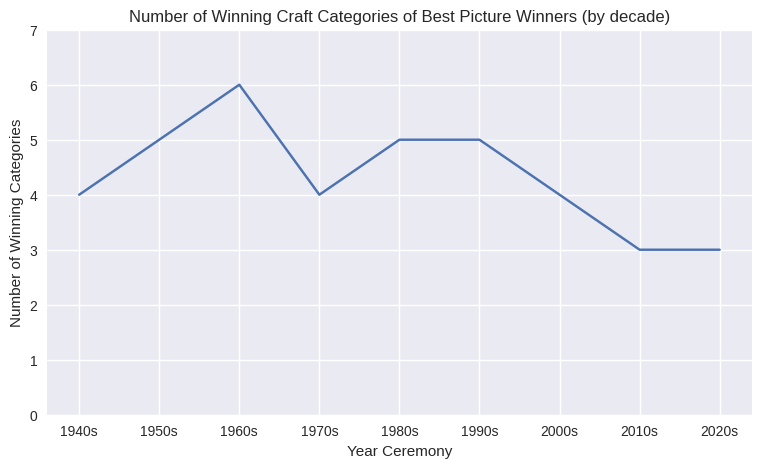

In [ ]:
# @title Visualize the Number of Craft Wins by decade

win_abs_decade = bp_win_merged.groupby(bp_win_merged.index//10)['total_craft_win'].mean().round(0).reset_index()
win_abs_decade['year_ceremony']= ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.figure(figsize = (20,5))
plt.subplot(121)
sns.lineplot(data=win_abs_decade, x='year_ceremony', y = 'total_craft_win')
plt.xlabel('Year Ceremony')
plt.yticks(np.arange(0, 8, step=1))
plt.ylabel('Number of Winning Categories')
#plt.xticks(np.arange(1940, 2024, step=10))
plt.title('Number of Winning Craft Categories of Best Picture Winners (by decade)')


Text(0.5, 1.0, 'Comparing with the Best Picture Nominee with Most Craft Wins')

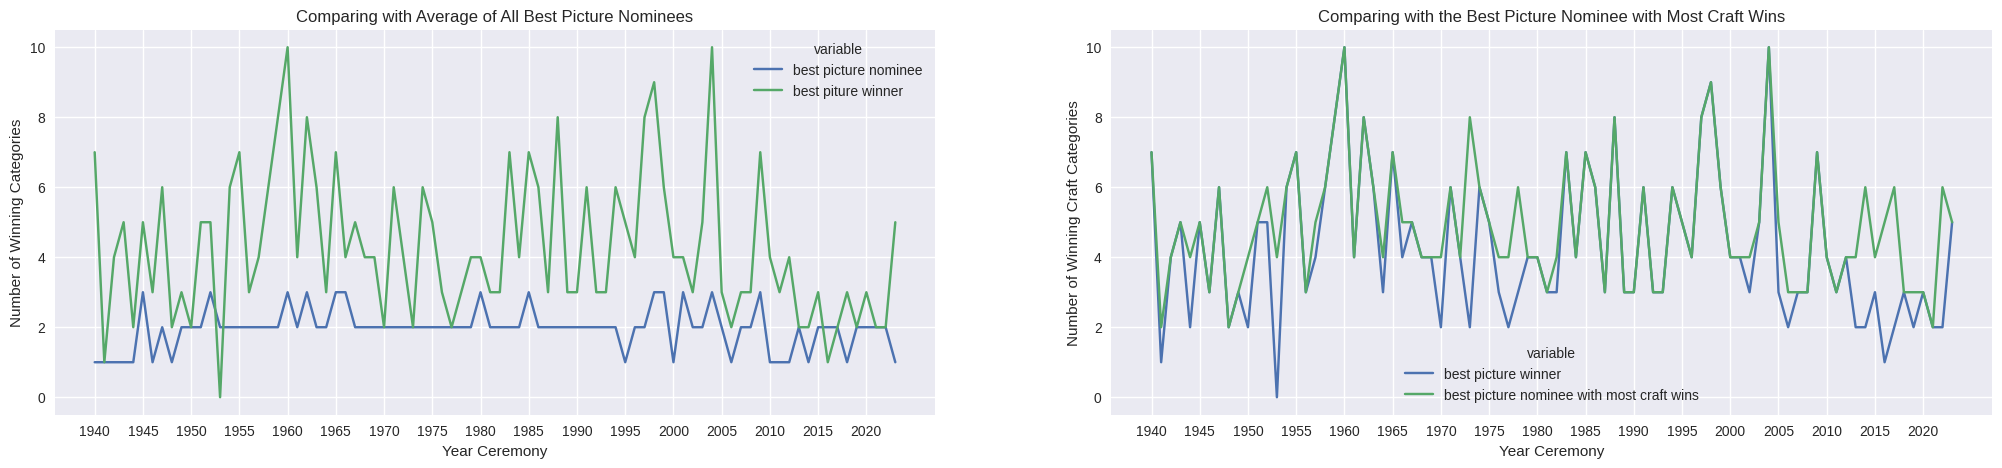

In [ ]:
# @title Additional Comparison to other Best Picture Nominees in its year - One noticable trend is that Best Picture Winner, in the 2010s, no longer the movie with highest number of Craft Wins

# % Win Rate between Best Picture Winner & Best Picture Nominees in same year
win_percent_compare_all = bp_nom_merged.groupby('year_ceremony')['total_craft_win'].mean().round(0).reset_index().rename(columns={'total_craft_win':'win_bp_nominees'})
win_percent_compare_all = pd.merge(win_percent_compare_all,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_win']],on='year_ceremony')
win_percent_compare_all = win_percent_compare_all.rename(columns={'total_craft_win':'win_bp_winners'})

nom_percent_compare_all = bp_nom_merged.groupby('year_ceremony')['total_craft_nom'].mean().round(0).reset_index().rename(columns={'total_craft_nom':'nom_bp_nominees'})
nom_percent_compare_all = pd.merge(nom_percent_compare_all,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_nom']],on='year_ceremony')
nom_percent_compare_all = nom_percent_compare_all.rename(columns={'total_craft_nom':'nom_bp_winners'})
nom_percent_compare_all= nom_percent_compare_all.drop(columns={'no_of_available_categories'})

win_percent_compare_all = pd.merge(win_percent_compare_all, nom_percent_compare_all, on='year_ceremony')
win_percent_compare_all['best picture nominee']=win_percent_compare_all['win_bp_nominees']
win_percent_compare_all['best piture winner']=win_percent_compare_all['win_bp_winners']
win_percent_compare_all = win_percent_compare_all.drop(columns={'win_bp_nominees','no_of_available_categories','win_bp_winners','nom_bp_nominees','nom_bp_winners'})

plt.figure(figsize = (25,5))
plt.subplot(121)
sns.lineplot(data=win_percent_compare_all.melt('year_ceremony'), x='year_ceremony', y = 'value', hue = 'variable')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Winning Categories')
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('Comparing with Average of All Best Picture Nominees')

# Comparing abs. number of Craft Wins compared to the Best Picture Nominees
win_abs_compare_max = bp_nom_merged.groupby('year_ceremony')['total_craft_win'].max().round(0).reset_index().rename(columns={'total_craft_win':'win_bp_nominees'})
win_abs_compare_max = pd.merge(win_abs_compare_max,bp_win_merged[['year_ceremony','no_of_available_categories','total_craft_win']],on='year_ceremony')
win_abs_compare_max = win_abs_compare_max.rename(columns={'total_craft_win':'win_bp_winners'})
win_abs_compare_max['best picture winner'] = win_abs_compare_max['win_bp_winners']
win_abs_compare_max['best picture nominee with most craft wins'] = win_abs_compare_max['win_bp_nominees']
win_abs_compare_max= win_abs_compare_max.drop(columns={'win_bp_nominees','win_bp_winners','no_of_available_categories'})

plt.subplot(122)
sns.lineplot(data=win_abs_compare_max.melt('year_ceremony'), x='year_ceremony', y = 'value', hue = 'variable')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Winning Craft Categories')
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('Comparing with the Best Picture Nominee with Most Craft Wins')

Text(0.5, 1.0, 'All Best Picture Nominees with 5+ Craft NOMs')

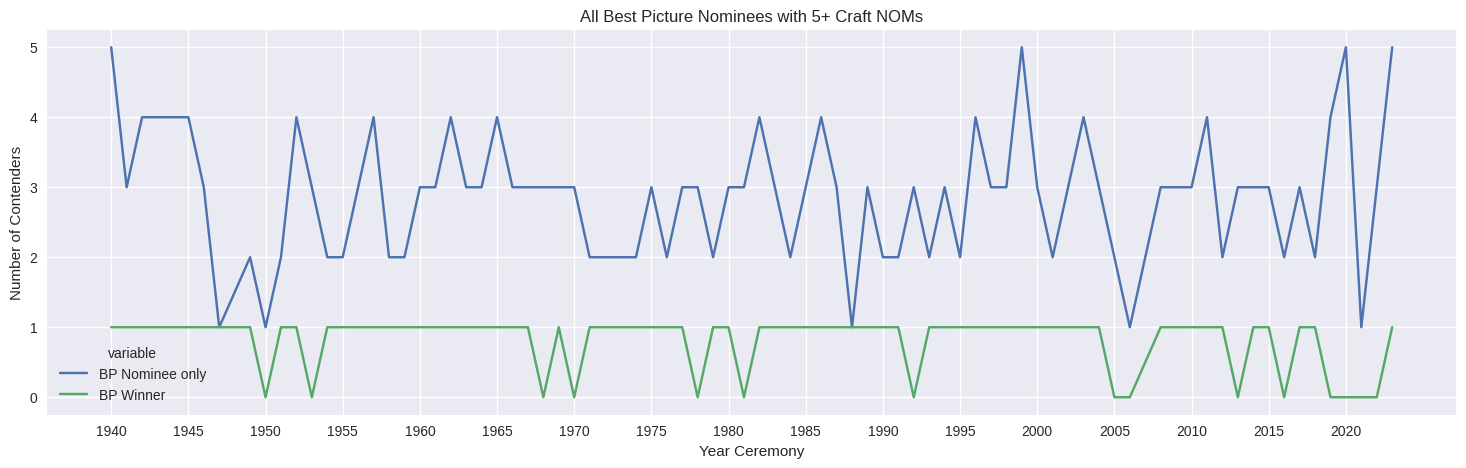

In [ ]:
# @title Further expanding the point above, out of the 12 Films with more than 5 Craft Nominations that lost Best Picture, 6 of which happenging since 2010, highlighting the impact of the voting body expansion
bp_nom_more5noms = bp_nom_merged[ bp_nom_merged['total_craft_nom'] > 5][['year_ceremony','film','best_picture','total_craft_nom']]

count_bp_nom_more5noms = bp_nom_more5noms.groupby('year_ceremony')['best_picture'].count().reset_index().rename(columns={'best_picture':'BP Nominee only'})
count_bp_win_more5noms = bp_nom_more5noms[bp_nom_more5noms['best_picture']=='Win'].groupby('year_ceremony')['best_picture'].count().reset_index()

dfx = pd.merge(count_bp_nom_more5noms, count_bp_win_more5noms, on =['year_ceremony'], how='outer').fillna(0).rename(columns={'best_picture':'BP Winner'})

plt.figure(figsize = (40,5))
plt.subplot(121)
sns.lineplot(data=dfx.melt('year_ceremony'), x='year_ceremony', y = 'value', hue = 'variable')
plt.xlabel('Year Ceremony')
plt.ylabel('Number of Contenders')
plt.xticks(np.arange(1940, 2024, step=5))
plt.title('All Best Picture Nominees with 5+ Craft NOMs')

### **Finding the Top Craft Categories consistently represented among Best Picture Winners**

##### [Updated Outcome]:

The consistent top 5
*   Director
*   Screenplay
*   Editing
*   Leading Performance
*   Supporting Performance





In [ ]:
# @title Get a dataframe only having Craft Category Info
bp_win_category = bp_win_merged.drop(columns= ['total_craft_win','total_craft_nom','win_per_nom','best_picture','no_of_available_categories','nom_percent','best_picture'])
bp_win_category

year_ceremony                               film best_director best_sound  \
0            1940                 Gone with the Wind           Win        Nom   
1            1941                            Rebecca           Nom       None   
2            1942            How Green Was My Valley           Win        Nom   
3            1943                       Mrs. Miniver           Win        Nom   
4            1944                         Casablanca           Win       None   
..            ...                                ...           ...        ...   
79           2019                         Green Book          None       None   
80           2020                           Parasite           Win       None   
81           2021                          Nomadland           Win       None   
82           2022                               CODA          None       None   
83           2023  Everything Everywhere All at Once           Win       None   

   best_cinematography best_production_design best_score best_song  \
0                  Win                    Win        Nom      None   
1                  Win                    Nom        Nom      None   
2                  Win                    Win        Nom      None   
3                  Win                   None       None      None   
4                  Nom                   None        Nom      None   
..                 ...                    ...        ...       ...   
79                None                   None       None      None   
80                None                    Nom       None      None   
81                 Nom                   None       None      None   
82                None                   None       None      None   
83                None                   None        Nom       Nom   

   best_visual_effects best_costume_design best_makeup_hair best_documentary  \
0                  Nom                None             None             None   
1                  Nom                None             None             None   
2                 None                None             None             None   
3                  Nom                None             None             None   
4                 None                None             None             None   
..                 ...                 ...              ...              ...   
79                None                None             None             None   
80                None                None             None             None   
81                None                None             None             None   
82                None                None             None             None   
83                None                 Nom             None             None   

   best_animated_film best_foreign_film best_editing best_lead_performance  \
0                None              None          Win                   Win   
1                None              None          Nom                   Nom   
2                None              None          Nom                  None   
3                None              None          Nom                   Win   
4                None              None          Nom                   Nom   
..                ...               ...          ...                   ...   
79               None              None          Nom                   Nom   
80               None               Win          Nom                  None   
81               None              None          Nom                   Win   
82               None              None         None                  None   
83               None              None          Win                   Win   

   best_supporting_performance best_screenplay  
0                          Win             Win  
1                          Nom             Nom  
2                          Win             Nom  
3                          Win             Win  
4                          Nom             Win 

Text(0.5, 1.0, 'Top Craft Categories to get nominated among Best Picture Winners')

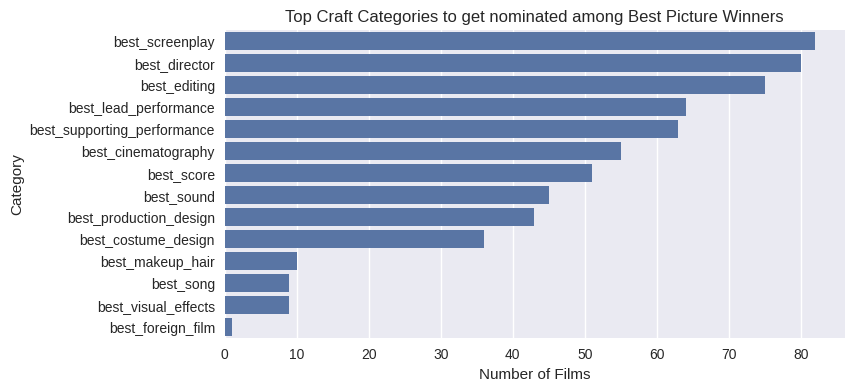

In [ ]:
# @title Top Categories a Best Picture Winners frequently get nominated - The Big 5 "Above The Line" Categories: Screenplay + Director + Editing + Supporting Performance + Leading Performance
bp_win = bp_win_category.drop(columns = ['film'])
bp_win = bp_win.melt('year_ceremony')

craft_nom = bp_win[bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'number of films'})
craft_nom

plt.figure(figsize = (8,4))
sns.barplot(data=craft_nom, y='category',x='number of films')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Craft Categories to get nominated among Best Picture Winners')

In [ ]:
# @title Top Categories a Best Picture Winners frequently to get nominated throughout each decade - The Big 5 ATL, especially Screenplay & Director, remains strongest consistency since 2000s
craft_nom_2020s = bp_win[bp_win['year_ceremony']>2019][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2020s'})
craft_nom_2010s = bp_win[bp_win['year_ceremony'].isin(range(2010,2020,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2010s'})
craft_nom_2000s = bp_win[bp_win['year_ceremony'].isin(range(2000,2010,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2000s'})
craft_nom_1990s = bp_win[bp_win['year_ceremony'].isin(range(1990,2000,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1990s'})
craft_nom_1980s = bp_win[bp_win['year_ceremony'].isin(range(1980,1990,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1980s'})
craft_nom_1970s = bp_win[bp_win['year_ceremony'].isin(range(1970,1980,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1970s'})
craft_nom_1960s = bp_win[bp_win['year_ceremony'].isin(range(1960,1970,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1960s'})
craft_nom_1950s = bp_win[bp_win['year_ceremony'].isin(range(1950,1960,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1950s'})
craft_nom_1940s = bp_win[bp_win['year_ceremony'].isin(range(1940,1950,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1940s'})

craft_nom_by_decade = craft_nom_1940s.merge(craft_nom_1950s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_1960s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_1970s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_1980s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_1990s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_2000s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_2010s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom_2020s,on='category',how='outer')
craft_nom_by_decade = craft_nom_by_decade.merge(craft_nom,on='category',how='outer')

craft_nom_by_decade.columns = ["category","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s","2020s","all_time"]
craft_nom_by_decade = craft_nom_by_decade.sort_values(by='all_time',ascending=False)
cm = sns.light_palette("green", as_cmap=True)
craft_nom_by_decade = craft_nom_by_decade.style.background_gradient(cmap=cm).highlight_null('grey')

craft_nom_by_decade


<ipython-input-31-26755afee10b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craft_nom_2020s = bp_win[bp_win['year_ceremony']>2019][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2020s'})
<ipython-input-31-26755afee10b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craft_nom_2010s = bp_win[bp_win['year_ceremony'].isin(range(2010,2020,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2010s'})
<ipython-input-31-26755afee10b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craft_nom_2000s = bp_win[bp_win['year_ceremony'].isin(range(2000,2010,1))][bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2000s'})
<ipython-input-31-26755afee10b>:5: UserWarning: Boolean Series key will be 

Text(0.5, 1.0, 'Top Craft Categories to Win among Best Picture Winners')

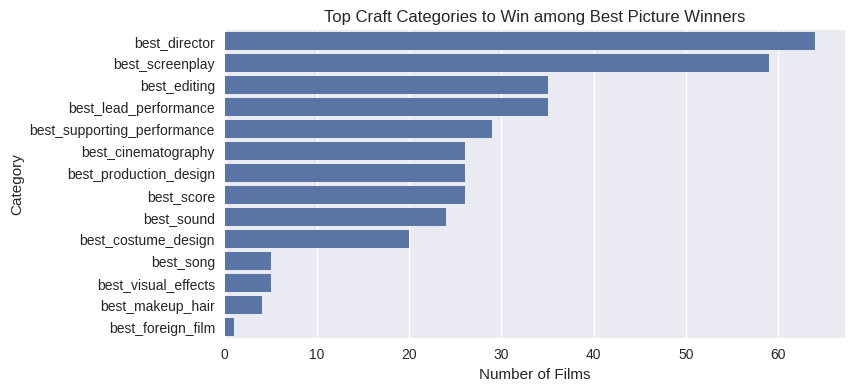

In [ ]:
# @title Top Categories a Best Picture Winner frequently to win all time - Also The Big 5: Screenplay + Director + Editing + Supporting Performance + Leading Performance
bp_win = bp_win_category.drop(columns = ['film'])
bp_win = bp_win.melt('year_ceremony')

#bp_win.loc[bp_win['variable'].isin(['best_original_screenplay','best_adapted_screenplay']),'variable'] = 'best_screenplay (original/adapted)'
#bp_win.loc[bp_win['variable'].isin(['best_actor','best_actress']), 'variable'] = 'best_leading_performance'
#bp_win.loc[bp_win['variable'].isin(['best_supporting_actor','best_supporting_actress']), 'variable'] = 'best_supporting_performance'

#non_bp_nom = bp_win[bp_win['value'].notnull()]['variable'].value_counts().reset_index().rename(columns = {'index':'category', 'variable':'number of films'})
craft_win = bp_win[bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'number of films'})
craft_win

plt.figure(figsize = (8,4))
sns.barplot(data=craft_win, y='category',x='number of films')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title(('Top Craft Categories to Win among Best Picture Winners'))

In [ ]:
# @title Top Categories a Best Picture Winner frequently to WIN across each decade - The Big 5 ATL, particularly Director & Screenplay, also remains most consistently prominent, since the 2000s

craft_win_2020s = bp_win[bp_win['year_ceremony']>2019][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2020s'})
craft_win_2010s = bp_win[bp_win['year_ceremony'].isin(range(2010,2020,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2010s'})
craft_win_2000s = bp_win[bp_win['year_ceremony'].isin(range(2000,2010,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2000s'})
craft_win_1990s = bp_win[bp_win['year_ceremony'].isin(range(1990,2000,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1990s'})
craft_win_1980s = bp_win[bp_win['year_ceremony'].isin(range(1980,1990,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1980s'})
craft_win_1970s = bp_win[bp_win['year_ceremony'].isin(range(1970,1980,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1970s'})
craft_win_1960s = bp_win[bp_win['year_ceremony'].isin(range(1960,1970,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1960s'})
craft_win_1950s = bp_win[bp_win['year_ceremony'].isin(range(1950,1960,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1950s'})
craft_win_1940s = bp_win[bp_win['year_ceremony'].isin(range(1940,1950,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'1940s'})

craft_win_by_decade = craft_win_1940s.merge(craft_win_1950s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_1960s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_1970s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_1980s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_1990s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_2000s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_2010s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win_2020s,on='category',how='outer')
craft_win_by_decade = craft_win_by_decade.merge(craft_win,on='category',how='outer')

craft_win_by_decade.columns = ["category","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s","2020s","all_time"]
craft_win_by_decade = craft_win_by_decade.sort_values(by='all_time',ascending=False)

cm = sns.light_palette("green", as_cmap=True)
craft_win_by_decade = craft_win_by_decade.style.background_gradient(cmap=cm).highlight_null('grey')
craft_win_by_decade

<ipython-input-33-1f33dd356f01>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craft_win_2020s = bp_win[bp_win['year_ceremony']>2019][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2020s'})
<ipython-input-33-1f33dd356f01>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craft_win_2010s = bp_win[bp_win['year_ceremony'].isin(range(2010,2020,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2010s'})
<ipython-input-33-1f33dd356f01>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  craft_win_2000s = bp_win[bp_win['year_ceremony'].isin(range(2000,2010,1))][bp_win['value']=='Win']['variable'].value_counts().reset_index().rename(columns = {'variable':'category', 'count':'2000s'})
<ipython-input-33-1f33dd356f01>:6: UserWarning: Boolean Series key will be reindexed

Text(0.5, 1.0, 'Top Categories A BP Win likely to get nominated in (the 1940s)')

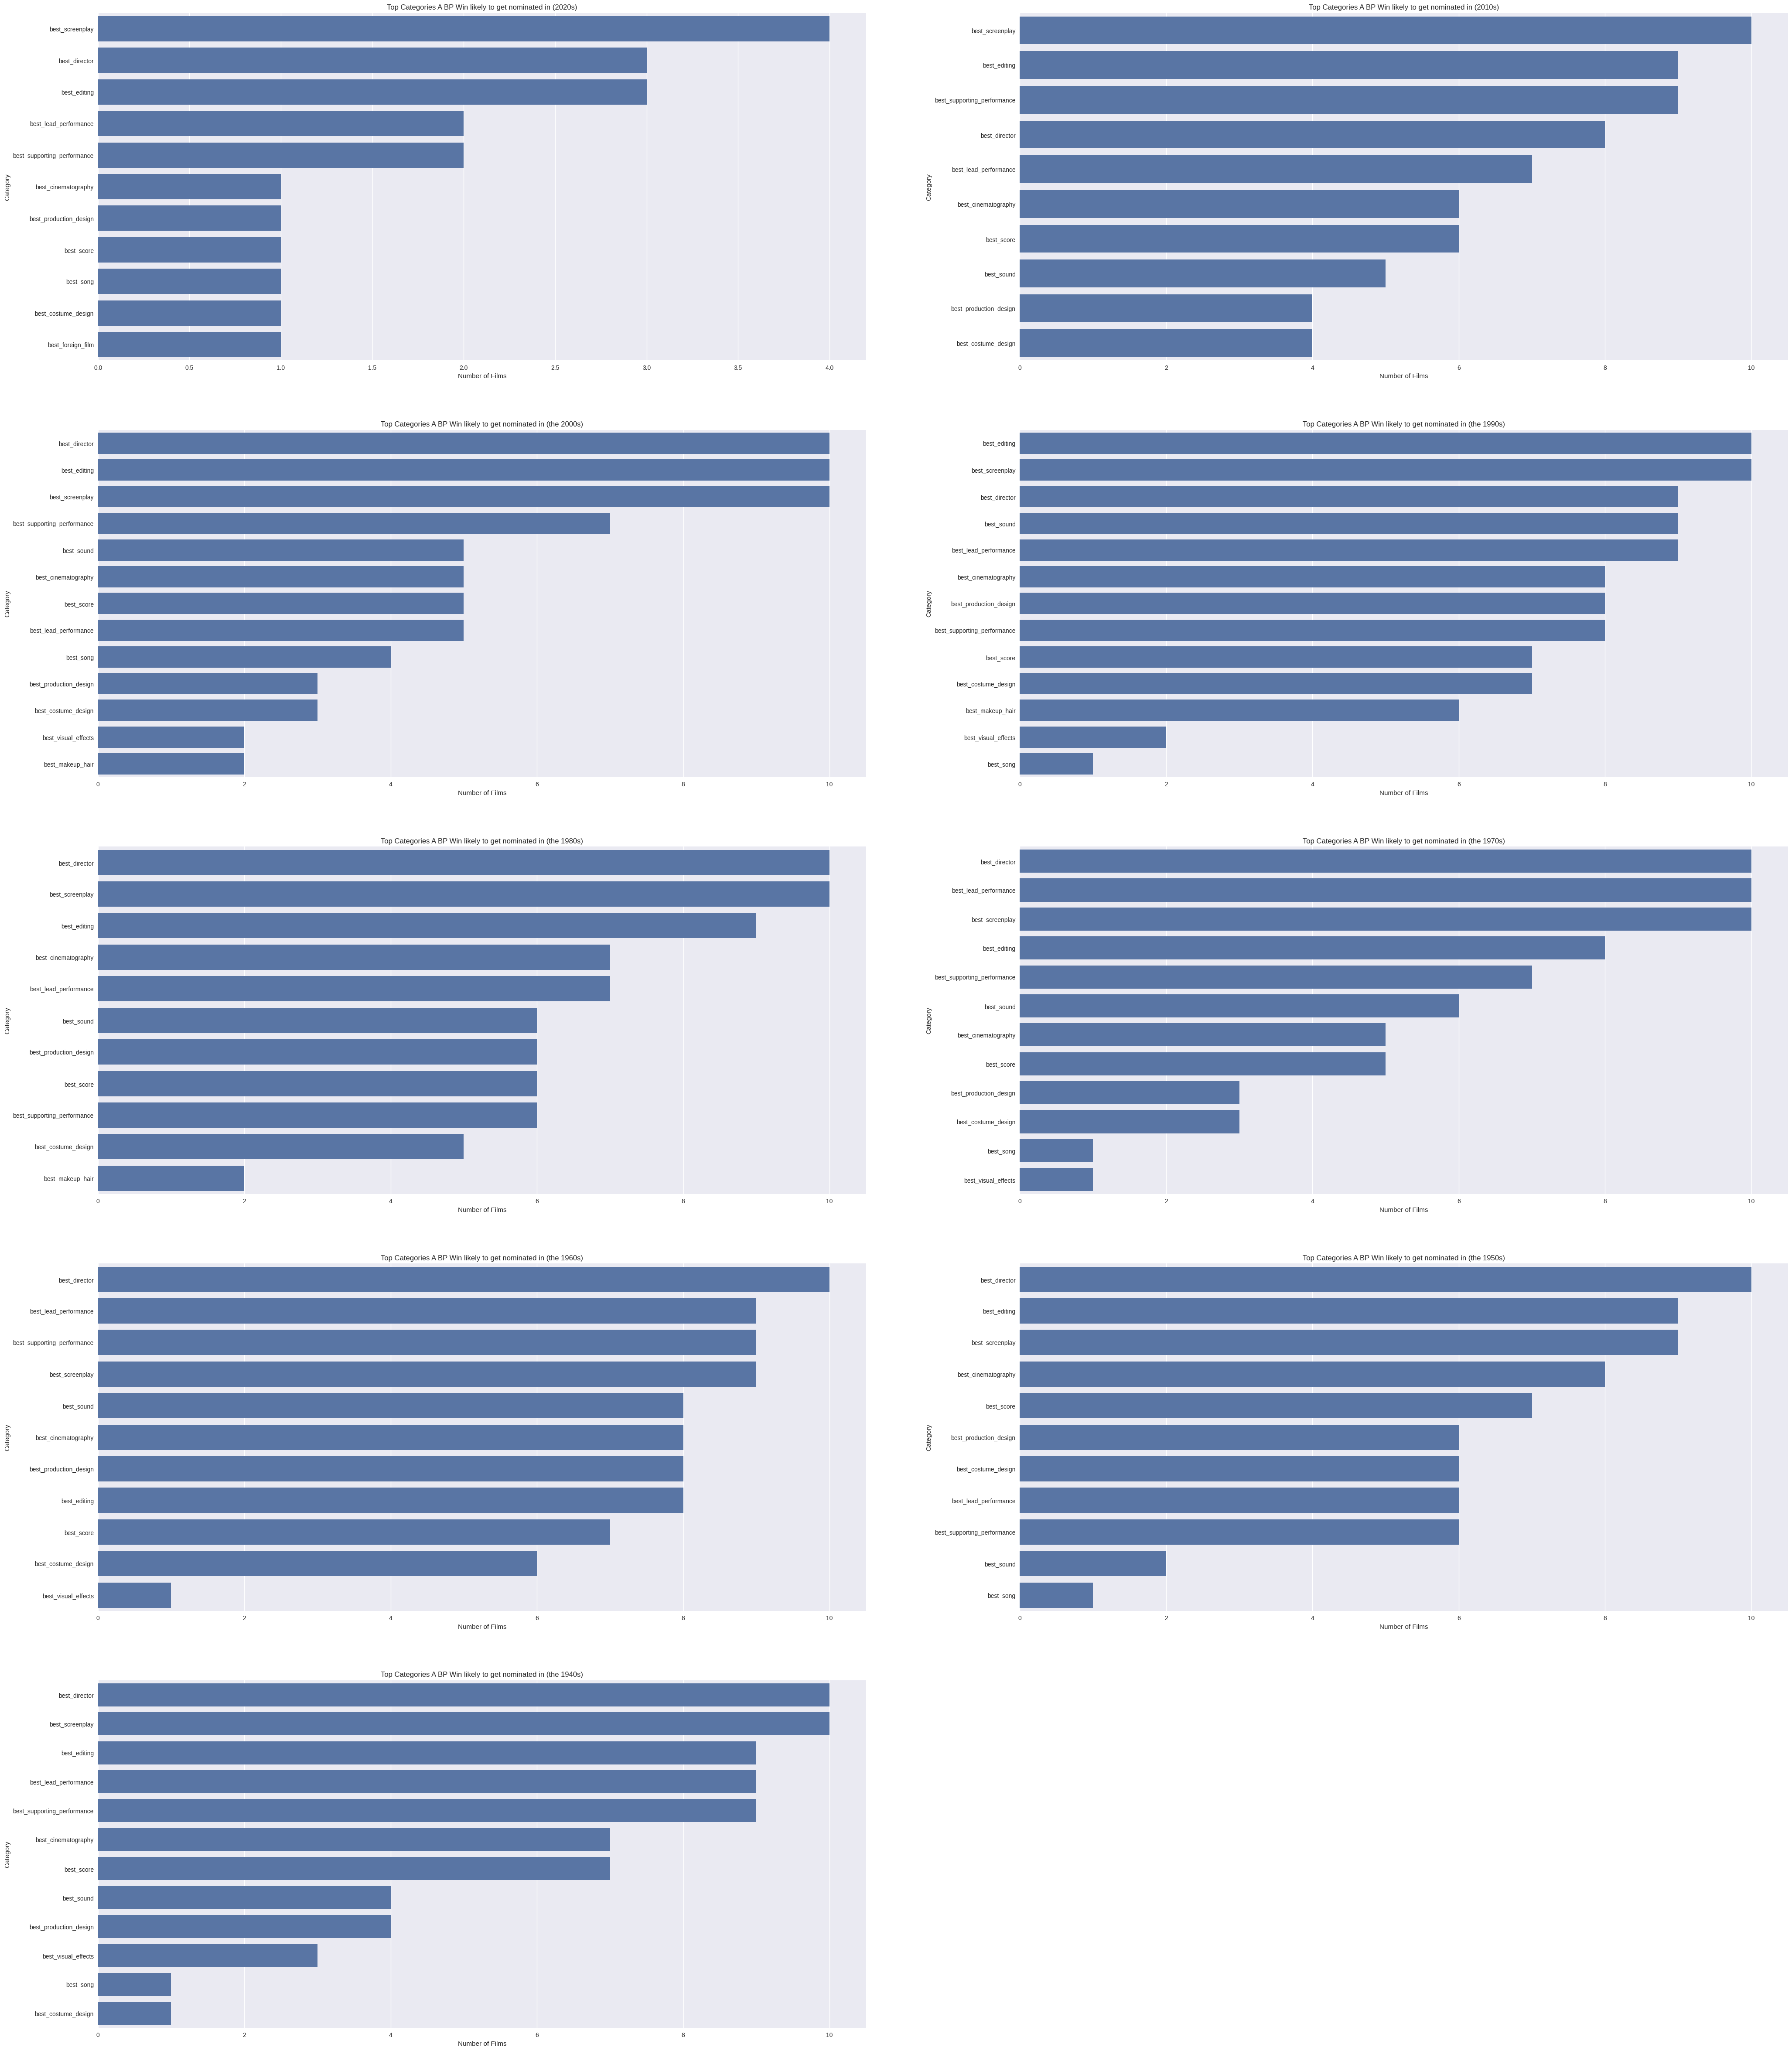

In [ ]:
# @title Visualization of Top Craft Categories a Best Picture Winner frequently get nominated
plt.figure(figsize = (50,60))

plt.subplot(521)
sns.barplot(data=craft_nom_2020s, y='category',x='2020s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (2020s)')

plt.subplot(522)
sns.barplot(data=craft_nom_2010s, y='category',x='2010s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (2010s)')

plt.subplot(523)
sns.barplot(data=craft_nom_2000s, y='category',x='2000s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 2000s)')

plt.subplot(524)
sns.barplot(data=craft_nom_1990s, y='category',x='1990s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 1990s)')

plt.subplot(525)
sns.barplot(data=craft_nom_1980s, y='category',x='1980s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 1980s)')

plt.subplot(526)
sns.barplot(data=craft_nom_1970s, y='category',x='1970s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 1970s)')

plt.subplot(527)
sns.barplot(data=craft_nom_1960s, y='category',x='1960s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 1960s)')

plt.subplot(528)
sns.barplot(data=craft_nom_1950s, y='category',x='1950s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 1950s)')

plt.subplot(529)
sns.barplot(data=craft_nom_1940s, y='category',x='1940s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get nominated in (the 1940s)')

Text(0.5, 1.0, 'Top Categories A BP Win likely to get win in (1940s)')

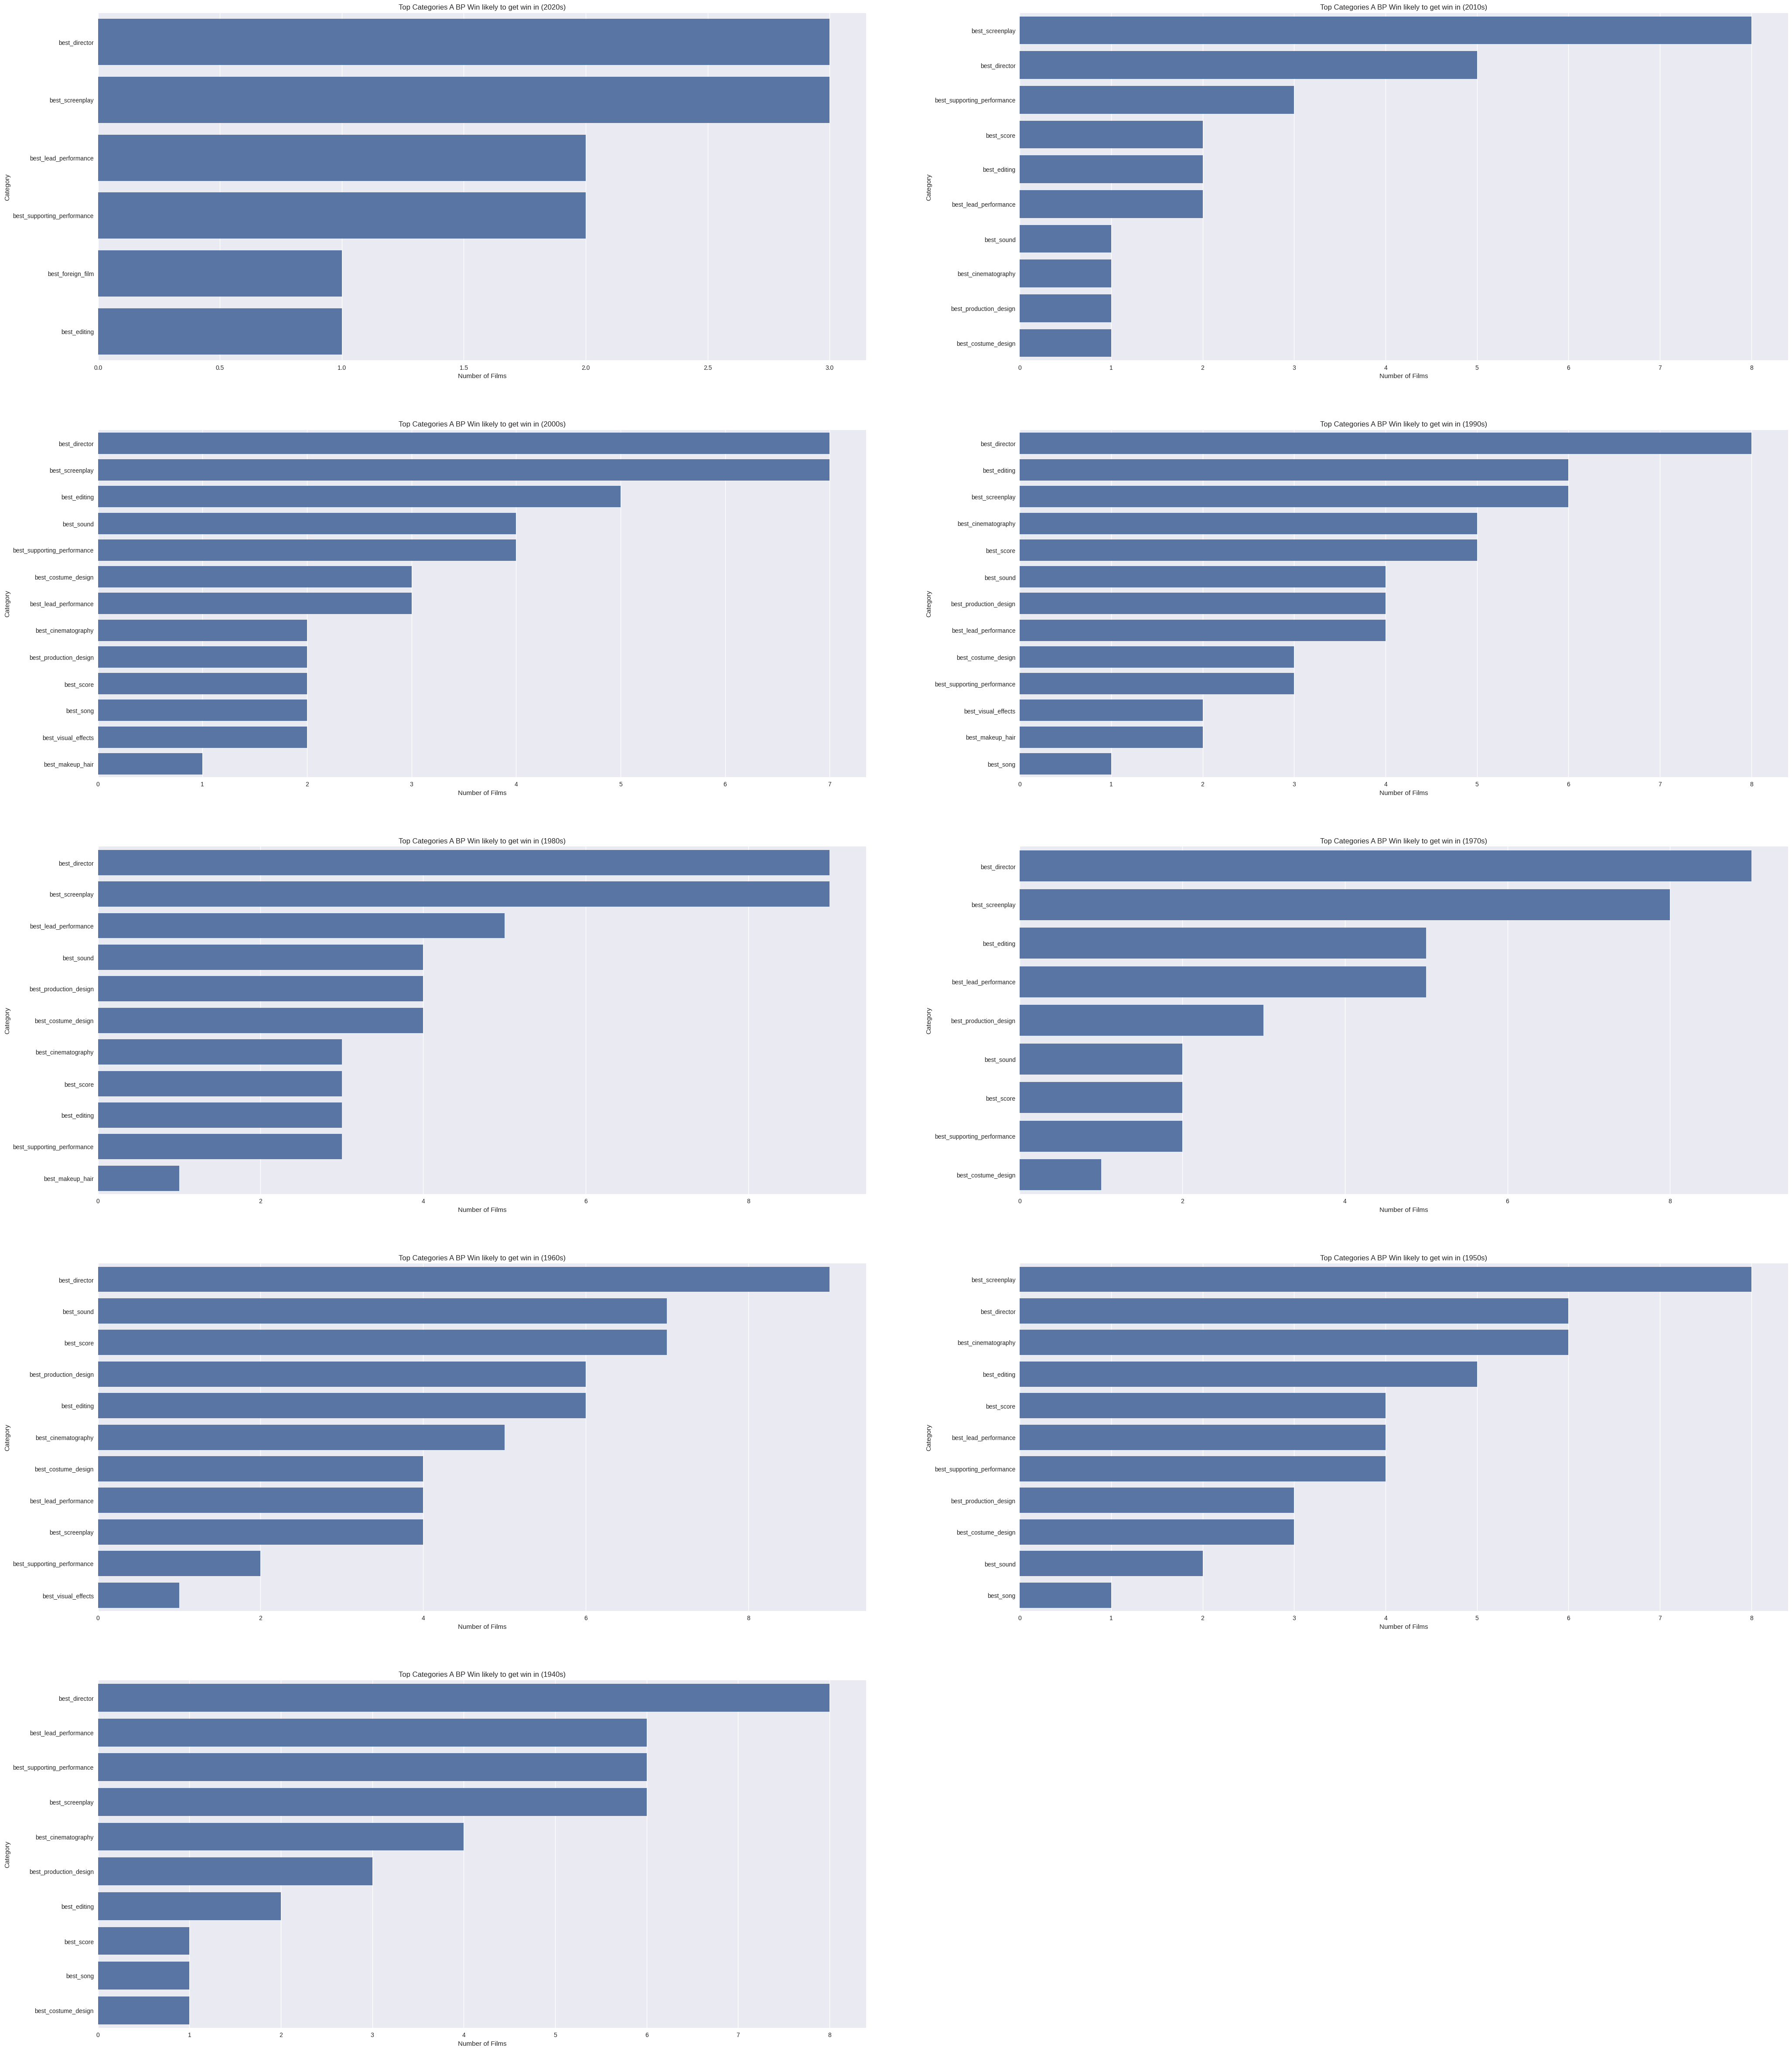

In [ ]:
# @title Visualization of Top Craft Categories a Best Picture Winner frequently get WIN across each decade
plt.figure(figsize = (50,60))

plt.subplot(521)
sns.barplot(data=craft_win_2020s, y='category',x='2020s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (2020s)')

plt.subplot(522)
sns.barplot(data=craft_win_2010s, y='category',x='2010s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (2010s)')

plt.subplot(523)
sns.barplot(data=craft_win_2000s, y='category',x='2000s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (2000s)')

plt.subplot(524)
sns.barplot(data=craft_win_1990s, y='category',x='1990s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (1990s)')

plt.subplot(525)
sns.barplot(data=craft_win_1980s, y='category',x='1980s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (1980s)')

plt.subplot(526)
sns.barplot(data=craft_win_1970s, y='category',x='1970s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (1970s)')

plt.subplot(527)
sns.barplot(data=craft_win_1960s, y='category',x='1960s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (1960s)')

plt.subplot(528)
sns.barplot(data=craft_win_1950s, y='category',x='1950s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (1950s)')

plt.subplot(529)
sns.barplot(data=craft_win_1940s, y='category',x='1940s')
plt.xlabel('Number of Films')
plt.ylabel('Category')
plt.title('Top Categories A BP Win likely to get win in (1940s)')

# **Deep-dive into Each Craft Category**

We identify Top 5 Craft Categories most prominently nominated across all Best Picture Winners to be:

*   Directing
*   Screenplay
*   Editing
*   Acting - Lead
*   Acting - Supporting







## **Director & Screenplay Category**

### **Director & Screenplay Nomination among Best Picture Winners**

In [ ]:
# @title No Best Picture Winner ever has no NOMINATION in Directing OR Screenplay categories
print(f"Number of Best Picture Winners with no nomination in Directing OR Screenplay is {bp_win_category[(bp_win_category['best_screenplay'].isnull())&(bp_win_category['best_director'].isnull())].shape[0]}")


Number of Best Picture Winners with no nomination in Directing OR Screenplay is 0


In [ ]:
# @title Only 2 Best Picture Winners don't have a Best Screenplay Nomination - Last time is 1966.
bp_win_sole_director = bp_win_category[bp_win_category['best_screenplay'].isnull()][['year_ceremony','film','best_director','best_screenplay']]

print(f"Number of Best Picture Winners with no Screenplay Nomination is {bp_win_sole_director.shape[0]}")
bp_win_sole_director

Number of Best Picture Winners with no Screenplay Nomination is 2


year_ceremony                        film best_director best_screenplay
13           1953  The Greatest Show on Earth           Nom            None
26           1966          The Sound of Music           Win            None

In [ ]:
# @title Only 4 Best Picture Winners don't have a Best Director Nomination - last time is 2022, all of which have a WIN in the Screenplay Category
bp_win_sole_screenplay = bp_win_category[bp_win_category['best_director'].isnull()][['year_ceremony','film','best_director','best_screenplay']]

print(f"Number of Best Picture Winners with no Director Nomination is {bp_win_sole_screenplay.shape[0]}")
bp_win_sole_screenplay

Number of Best Picture Winners with no Director Nomination is 4


year_ceremony                film best_director best_screenplay
50           1990  Driving Miss Daisy          None             Win
73           2013                Argo          None             Win
79           2019          Green Book          None             Win
82           2022                CODA          None             Win

<ipython-input-39-4757484c2163>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_win_top2_nom = bp_win_category[bp_win_category['best_screenplay'].notnull()][bp_win_category['best_director'].notnull()][['year_ceremony','film','best_director','best_screenplay','best_lead_performance','best_supporting_performance','best_editing']]


Text(0.5, 1.0, 'All 84 Best Picture Winners')

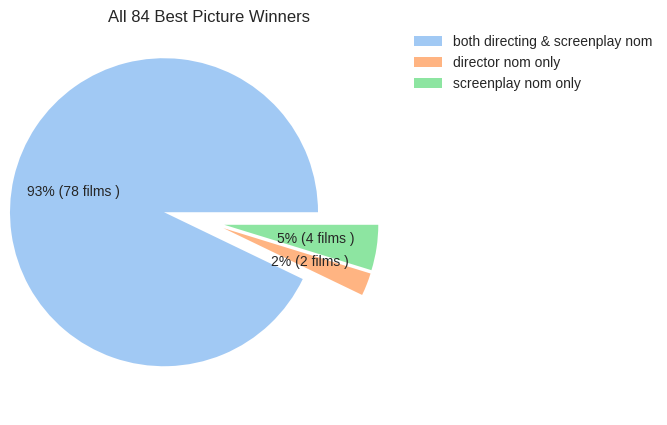

In [ ]:
# @title Visual Representation of Directing & Screenplay Nominations of all 84 Best Picture Winners

bp_win_top2_nom = bp_win_category[bp_win_category['best_screenplay'].notnull()][bp_win_category['best_director'].notnull()][['year_ceremony','film','best_director','best_screenplay','best_lead_performance','best_supporting_performance','best_editing']]
bp_win_sole_director = bp_win_category[(bp_win_category['best_screenplay'].isnull())&(bp_win_category['best_director'].notnull())]
bp_win_sole_screenplay = bp_win_category[(bp_win_category['best_screenplay'].notnull())&(bp_win_category['best_director'].isnull())]

a = bp_win_category.shape[0]

x = bp_win_top2_nom.shape[0]
y = bp_win_sole_director.shape[0]
z = bp_win_sole_screenplay.shape[0]

data = [x, y, z]
keys = ['both directing & screenplay nom', 'director nom only','screenplay nom only']

k = pd.DataFrame(data={'both directing & screenplay':[x],'director only':[y],'screenplay only':[z]},
                 index=['All 84 Best Picture Winners'])

# plotting data on pie chart

# define Seaborn color palette to use
import seaborn
palette_color = seaborn.color_palette('pastel')

# plotting data on chart
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.pie(data, labels = None,colors=palette_color,explode=(0.3,0.1,0.1), autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.legend(labels = keys, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title(f"All {a} Best Picture Winners")

<ipython-input-40-7b78554faf66>:30: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=bp_win_screenplay_decade.melt('periods'), x='periods', y = 'value', hue = 'variable', palette=palette_color)


Text(0.5, 1.0, 'BP Winners with Screenplay NOMINATIONS')

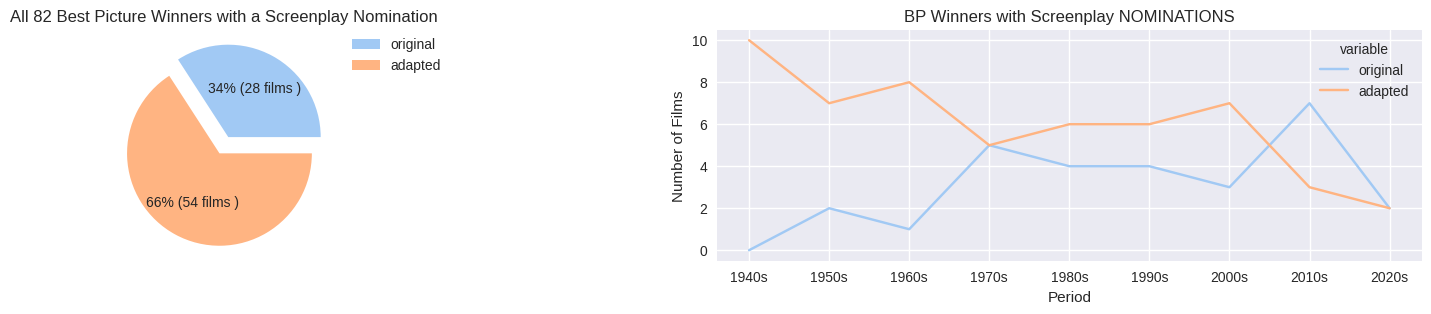

In [ ]:
# @title Breakdown into Screenplay Subcategories: Original V.S Adapted - Adapted is historically more prominenent, though increase in Original

#BP WINNERS WITH SCREENPLAY NOMINATIONS - visualized by Absolute
x= bp_winner[bp_winner['best_original_screenplay'].notnull()].shape[0]
y= bp_winner[bp_winner['best_adapted_screenplay'].notnull()].shape[0]
a = x+y

plt.figure(figsize = (20,3))
data = [x, y]
keys = ['original', 'adapted']

plt.subplot(121)
plt.pie(data, labels=None, colors=palette_color,explode=(0.1,0.1), autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.legend(labels = keys, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title(f"All {a} Best Picture Winners with a Screenplay Nomination")


#BP WINNERS WITH SCREENPLAY NOMINATIONS - visualized by time
bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')

bp_win_original_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).count()['best_original_screenplay'].reset_index()
bp_win_adapted_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).count()['best_adapted_screenplay'].reset_index()

bp_win_screenplay_decade = pd.merge(bp_win_original_decade, bp_win_adapted_decade, on =['year_ceremony'], how='outer')
bp_win_screenplay_decade = bp_win_screenplay_decade.rename(columns={'year_ceremony':'periods','best_adapted_screenplay':'adapted','best_original_screenplay':'original'})
bp_win_screenplay_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=bp_win_screenplay_decade.melt('periods'), x='periods', y = 'value', hue = 'variable', palette=palette_color)
plt.xlabel('Period')
plt.ylabel('Number of Films')
plt.title('BP Winners with Screenplay NOMINATIONS')

### Observation Summary:
*   All Best Picture Winners have nomination in Directing AND/ OR Screenplay. 93% have both
*   Among Best Picture Winners with a Screenplay Nomination, 66% is Adapted compared to 34% of Original; however the 2010s has seen an uptick in Original Screenplay




### **Director & Screenplay Nomination mong Best Picture Nominees & Probability of Winning Best Picture**

<ipython-input-41-0718814c8f2b>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_no_director_nom = bp_nominees[bp_nominees['best_director'].isnull()][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-41-0718814c8f2b>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_no_director_nom = bp_nominees[bp_nominees['best_director'].isnull()][bp_nominees['best_picture']=='Win'].shape[0]
<ipython-input-41-0718814c8f2b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_director_nom = bp_nominees[bp_nominees['best_director'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-41-0718814c8f2b>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_director_nom = bp_nominees[bp_nominees['best_director'].notnull()][bp_nominees['best_picture']=='Win'].shape[0]


Text(0.5, 1.0, 'All 331 Best Picture Contenders with a Director Nomination')

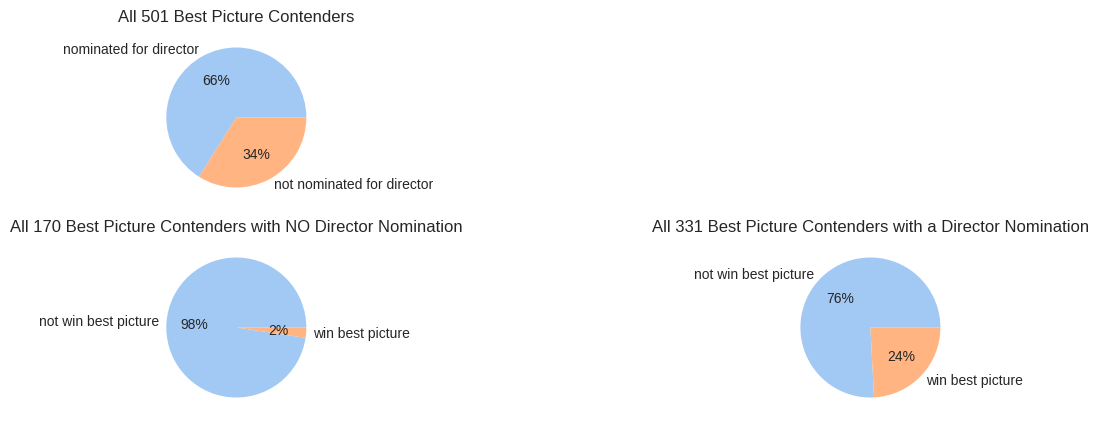

In [ ]:
# @title Director Category

plt.figure(figsize = (15,5))

#DISTRIBUTION AMONG ALL BEST PICTUE CONTENDERS
bp_contender_no_director_nom = bp_nominees[bp_nominees['best_director'].isnull()].shape[0]

x = bp_nominees.shape[0] - bp_contender_no_director_nom
y = bp_contender_no_director_nom
data = [x, y]
keys = ['nominated for director', 'not nominated for director']

plt.subplot(221)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders")

#NO DIRECTOR NOMINATION to win BEST PICTURE
bp_nominee_no_director_nom = bp_nominees[bp_nominees['best_director'].isnull()][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_no_director_nom = bp_nominees[bp_nominees['best_director'].isnull()][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_no_director_nom
y = bp_winner_no_director_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(223)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders with NO Director Nomination")

#WITH DIRECTOR NOMINATION to win BEST PICTURE
bp_nominee_director_nom = bp_nominees[bp_nominees['best_director'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_director_nom = bp_nominees[bp_nominees['best_director'].notnull()][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_director_nom
y = bp_winner_director_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(224)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders with a Director Nomination")

<ipython-input-42-30001f8ba443>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_no_screenplay_nom = bp_nominees[(bp_nominees['best_original_screenplay'].isnull())&(bp_nominees['best_adapted_screenplay'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-42-30001f8ba443>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_no_screenplay_nom= bp_nominees[(bp_nominees['best_original_screenplay'].isnull())&(bp_nominees['best_adapted_screenplay'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]
<ipython-input-42-30001f8ba443>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_original = bp_nominees[bp_nominees['best_original_screenplay'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-42-30001f8ba443>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_original = bp_nominees[bp_

Text(0.5, 1.0, 'Among 250 Best Picture Contenders \n with Adapted  Screenplay Nominations')

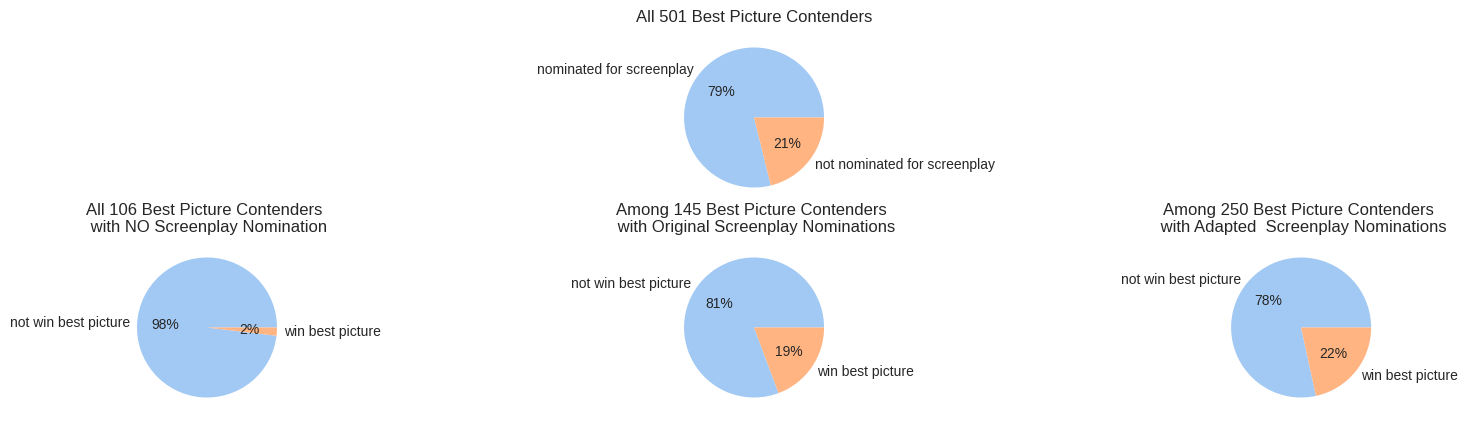

In [ ]:
# @title Screenplay Cateogry

plt.figure(figsize = (20,5))

#DISTRIBUTION AMONG ALL BEST PICTURE CONTENDERS
bp_contender_no_screenplay_nom = bp_nominees[(bp_nominees['best_original_screenplay'].isnull())&(bp_nominees['best_adapted_screenplay'].isnull())].shape[0]

x = bp_nominees.shape[0] - bp_contender_no_screenplay_nom
y = bp_contender_no_screenplay_nom
data = [x, y]
keys = ['nominated for screenplay', 'not nominated for screenplay']

plt.subplot(232)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders")

#NO SCREENPLAY NOMINATION to WIN BEST PICTURE
bp_nominee_no_screenplay_nom = bp_nominees[(bp_nominees['best_original_screenplay'].isnull())&(bp_nominees['best_adapted_screenplay'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_no_screenplay_nom= bp_nominees[(bp_nominees['best_original_screenplay'].isnull())&(bp_nominees['best_adapted_screenplay'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_no_screenplay_nom
y = bp_winner_no_screenplay_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(234)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n with NO Screenplay Nomination")

#WITH SCREENPLAY NOMINATION to WIN BEST PICTURE
bp_nominee_original = bp_nominees[bp_nominees['best_original_screenplay'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_original = bp_nominees[bp_nominees['best_original_screenplay'].notnull()][bp_nominees['best_picture']=='Win'].shape[0]

bp_nominee_adapted = bp_nominees[bp_nominees['best_adapted_screenplay'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_adapted = bp_nominees[bp_nominees['best_adapted_screenplay'].notnull()][bp_nominees['best_picture']=='Win'].shape[0]

data_original = [bp_nominee_original,bp_winner_original]
data_adapted = [bp_nominee_adapted,bp_winner_adapted]

a_original = bp_nominee_original + bp_winner_original
a_adapted = bp_nominee_adapted + bp_winner_adapted
keys = ['not win best picture','win best picture']

plt.subplot(235)
plt.pie(data_original, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f'Among {a_original} Best Picture Contenders \n with Original Screenplay Nominations')

plt.subplot(236)
plt.pie(data_adapted, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f'Among {a_adapted} Best Picture Contenders \n with Adapted  Screenplay Nominations')


### Observation Summary

* Best Picture Contenders has 66% Probability of getting Director Nomination, and 79% of getting Screenplay Nomination  

* Those with Director Nomination has 24% Probability of winning Best Picture, and those without has only 2%.

* Those with those with Adapted Screenplay nomination has 22% probability of winning Best Picture, those with Original Screenplay has 19%, bringing total probability of those with Screenplay Nomination (Original OR Screenplay) being 17%

* Meanwhile, those without Screenplay Nomination has only 2%,




### **[Supplementary] Director & Screenplay Win among Best Picture Winners**

<ipython-input-43-0133c4fe509c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_win_both_top2 = bp_win_category[bp_win_category['best_screenplay']=='Win'][bp_win_category['best_director']=='Win']


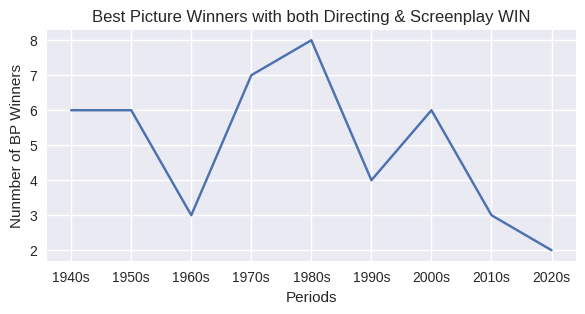

In [ ]:
# @title 45/84 Best Picture Winners win both Screenplay & Directing Categories, though ever since the 2000s, there have been far less movies that win BOTH Screenplay & Directing
bp_win_both_top2 = bp_win_category[bp_win_category['best_screenplay']=='Win'][bp_win_category['best_director']=='Win']

bp_win_both_top2_1940s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(1940,1950))].shape[0]
bp_win_both_top2_1950s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(1950,1960))].shape[0]
bp_win_both_top2_1960s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(1960,1970))].shape[0]
bp_win_both_top2_1970s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(1970,1980))].shape[0]
bp_win_both_top2_1980s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(1980,1990))].shape[0]
bp_win_both_top2_1990s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(1990,2000))].shape[0]
bp_win_both_top2_2000s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(2000,2010))].shape[0]
bp_win_both_top2_2010s = bp_win_both_top2[bp_win_both_top2['year_ceremony'].isin(range(2010,2020))].shape[0]
bp_win_both_top2_2020s = bp_win_both_top2[bp_win_both_top2['year_ceremony']>=2020].shape[0]

d1 = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'movies with both Directing & Screenplay':[bp_win_both_top2_1940s,bp_win_both_top2_1950s,bp_win_both_top2_1960s,bp_win_both_top2_1970s,bp_win_both_top2_1980s,
                                                bp_win_both_top2_1990s,bp_win_both_top2_2000s,bp_win_both_top2_2010s,bp_win_both_top2_2020s]}

bp_with_both_top_2_decade = pd.DataFrame(data=d1)
bp_with_both_top_2_decade

plt.figure(figsize = (15,3))
plt.subplot(121)
sns.lineplot(data=bp_with_both_top_2_decade, y='movies with both Directing & Screenplay',x='period')
plt.xlabel('Periods')
plt.ylabel('Nunmber of BP Winners')
plt.title('Best Picture Winners with both Directing & Screenplay WIN')
plt.show()

<ipython-input-44-7f4cb61002eb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_win_only_screenplay = bp_win_category[bp_win_category['best_screenplay']=='Win'][(bp_win_category['best_director']=='Nom')|(bp_win_category['best_director'].isnull())]
<ipython-input-44-7f4cb61002eb>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_win_only_director = bp_win_category[bp_win_category['best_director']=='Win'][(bp_win_category['best_screenplay']=='Nom')|(bp_win_category['best_screenplay'].isnull())]


Text(0.5, 1.0, 'Best Picture Winners with EITHER Directing OR Screenplay Win')

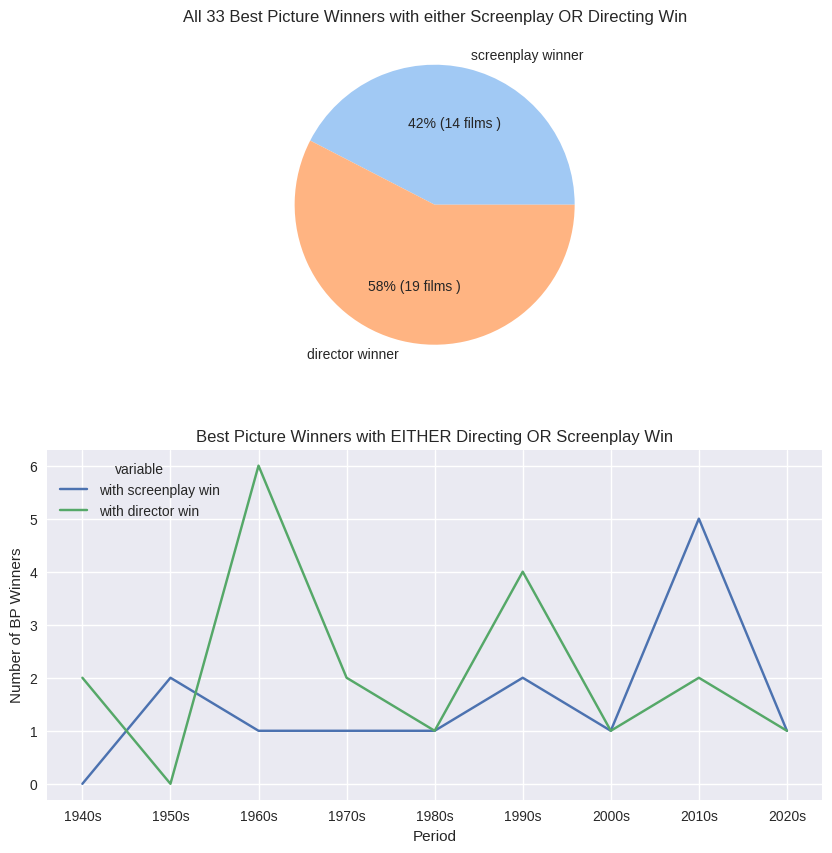

In [ ]:
# @title Out of 39 Best Picture Winners that win ONLY either Directing OR Screenplay, a Screenplay win is more prominent than a Best Picture Win in recent time (though Director Win is historically more prominent)


#Visualize by time
bp_win_only_screenplay = bp_win_category[bp_win_category['best_screenplay']=='Win'][(bp_win_category['best_director']=='Nom')|(bp_win_category['best_director'].isnull())]
bp_win_only_director = bp_win_category[bp_win_category['best_director']=='Win'][(bp_win_category['best_screenplay']=='Nom')|(bp_win_category['best_screenplay'].isnull())]

bp_win_only_screenplay_1940s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(1940,1950))].shape[0]
bp_win_only_screenplay_1950s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(1950,1960))].shape[0]
bp_win_only_screenplay_1960s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(1960,1970))].shape[0]
bp_win_only_screenplay_1970s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(1970,1980))].shape[0]
bp_win_only_screenplay_1980s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(1980,1990))].shape[0]
bp_win_only_screenplay_1990s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(1990,2000))].shape[0]
bp_win_only_screenplay_2000s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(2000,2010))].shape[0]
bp_win_only_screenplay_2010s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony'].isin(range(2010,2020))].shape[0]
bp_win_only_screenplay_2020s = bp_win_only_screenplay[bp_win_only_screenplay['year_ceremony']>=2020].shape[0]

d2 = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'with screenplay win':[bp_win_only_screenplay_1940s,bp_win_only_screenplay_1950s,bp_win_only_screenplay_1960s,bp_win_only_screenplay_1970s,bp_win_only_screenplay_1980s,
                                                bp_win_only_screenplay_1990s,bp_win_only_screenplay_2000s,bp_win_only_screenplay_2010s,bp_win_only_screenplay_2020s]}
bp_win_only_screenplay_decade = pd.DataFrame(data=d2)
bp_win_only_screenplay_decade

bp_win_only_director_1940s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(1940,1950))].shape[0]
bp_win_only_director_1950s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(1950,1960))].shape[0]
bp_win_only_director_1960s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(1960,1970))].shape[0]
bp_win_only_director_1970s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(1970,1980))].shape[0]
bp_win_only_director_1980s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(1980,1990))].shape[0]
bp_win_only_director_1990s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(1990,2000))].shape[0]
bp_win_only_director_2000s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(2000,2010))].shape[0]
bp_win_only_director_2010s = bp_win_only_director[bp_win_only_director['year_ceremony'].isin(range(2010,2020))].shape[0]
bp_win_only_director_2020s = bp_win_only_director[bp_win_only_director['year_ceremony']>=2020].shape[0]

d3 = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'with director win':[bp_win_only_director_1940s,bp_win_only_director_1950s,bp_win_only_director_1960s,bp_win_only_director_1970s,bp_win_only_director_1980s,
                                                bp_win_only_director_1990s,bp_win_only_director_2000s,bp_win_only_director_2010s,bp_win_only_director_2020s]}
bp_win_only_director_decade = pd.DataFrame(data=d3)

bp_win_either_top2 = pd.merge(bp_win_only_screenplay_decade, bp_win_only_director_decade, on =['period'], how='outer')
bp_win_either_top2['periods'] = bp_win_either_top2['period']
bp_win_either_top2 = bp_win_either_top2.drop(columns={'period'})

#Visualize in absolute
x= bp_win_only_screenplay.shape[0]
y = bp_win_only_director.shape[0]

a = x+y

data = [x, y]
keys = ['screenplay winner', 'director winner']

# define Seaborn color palette to use
import seaborn
palette_color = seaborn.color_palette('pastel')

plt.figure(figsize = (10,10))

# plotting data on chart
plt.subplot(211)
plt.pie(data, labels=keys, colors=palette_color, autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.title(f"All {a} Best Picture Winners with either Screenplay OR Directing Win")

plt.subplot(212)
sns.lineplot(data=bp_win_either_top2.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of BP Winners')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with EITHER Directing OR Screenplay Win')

## **Editing Category**

### **Editing Nomination among Best Picture Winners**

Text(0.5, 1.0, 'Best Picture Winners with ZERO Editing NOMINATIONS')

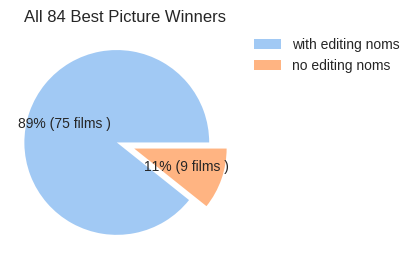

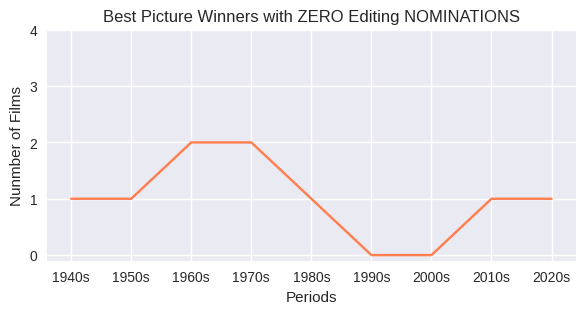

In [ ]:
# @title Visual Represnetation of Editing Nomination among Best Picture Winners

#EDITING NOMINATION AMONG ALL BEST PICTURE WINNERs
x= bp_winner.shape[0] - bp_winner[bp_winner['best_editing'].notnull()].shape[0]
y = bp_winner[bp_winner['best_editing'].notnull()].shape[0]
a = x+y

data = [y, x]
keys = ['with editing noms','no editing noms', ]

# define Seaborn color palette to use
import seaborn
palette_color = seaborn.color_palette('pastel')

# plotting data on chart
plt.figure(figsize = (20,3))
plt.subplot(121)
plt.pie(data, labels=None, colors=palette_color,explode=(0.1,0.1), autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.legend(labels = keys, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title(f"All {a} Best Picture Winners")


#BP WINNERS WITH NO EDITING NOMINATIONS
def count_no_nom(series):
    return series.isnull().sum()

bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')

bp_win_no_editing_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_no_nom)['best_editing'].reset_index()
bp_win_no_editing_decade = bp_win_no_editing_decade.rename(columns={'year_ceremony':'periods','best_editing':'no editing nomination'})
bp_win_no_editing_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.figure(figsize = (15,3))
plt.subplot(122)
sns.lineplot(data=bp_win_no_editing_decade, y='no editing nomination',x='periods', color='coral')
plt.xlabel('Periods')
plt.ylabel('Nunmber of Films')
plt.yticks(np.arange(0, 5, step=1))
plt.title('Best Picture Winners with ZERO Editing NOMINATIONS')



> **Observation:** Only 2 Best Picture Winners in the past 30 years have missed an Editing Nomination



In [ ]:
# @title Of the Best Picture Winner since 1990s that DON'T HAVE a Editing NOMINATION, one movie (Birdman or) is an one-take movie (hence, considred "no editing"), and the other one (CODA) is an extreme outlier as the Best Picture Winner with lowest number of Craft Category Nominations in 84 years
bp_winner[bp_winner['best_editing'].isnull()][bp_winner['year_ceremony']>1990]

<ipython-input-46-c0975795b9f9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner[bp_winner['best_editing'].isnull()][bp_winner['year_ceremony']>1990]


year_ceremony                                             film  \
9714            2015  Birdman or (The Unexpected Virtue of Ignorance)   
10591           2022                                             CODA   

      best_picture best_director best_original_screenplay  \
9714           Win           Win                      Win   
10591          Win          None                     None   

      best_adapted_screenplay best_actor best_actress best_supporting_actor  \
9714                     None        Nom         None                   Nom   
10591                     Win       None         None                   Win   

      best_supporting_actress  ... best_production_design best_score  \
9714                      Nom  ...                   None       None   
10591                    None  ...                   None       None   

      best_song best_visual_effects best_costume_design best_makeup_hair  \
9714       None                None                None             None   
10591      None                None                None             None   

      best_documentary best_animated_film best_foreign_film best_editing  
9714              None               None              None         None  
10591             None               None              None         None  

[2 rows x 22 columns]

In [ ]:
# @title Reference: Movies with lowest number of Craft Nominations
bp_win_merged[['year_ceremony','film','total_craft_nom']].sort_values(by='total_craft_nom',ascending=True).head(5)

year_ceremony                        film  total_craft_nom
82           2022                        CODA                2
13           1953  The Greatest Show on Earth                3
38           1978                  Annie Hall                3
41           1981             Ordinary People                4
67           2007                The Departed                4

### Observation Summary
*   89% Best Picture Winners have an Editing Nomination
*   In the past 30+ years, only 2 Best Picture Winners have had no Editing Nomination. 1 is an one-take style movie, 1 is an outlier with lowest number of craft nominations ever in Oscar history




### **Editing Nominations among Best Picture Nominees and probability of winning Best Picture**

<ipython-input-48-9ff5a52838f2>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_edit_nom = bp_nominees[bp_nominees['best_editing'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-48-9ff5a52838f2>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_edit_nom = bp_nominees[bp_nominees['best_editing'].notnull()][bp_nominees['best_picture']=='Win'].shape[0]
<ipython-input-48-9ff5a52838f2>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_no_edit_nom = bp_nominees[bp_nominees['best_editing'].isnull()][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-48-9ff5a52838f2>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_no_edit_nom = bp_nominees[bp_nominees['best_editing'].isnull()][bp_nominees['best_picture']=='Win'].shape[0]


Text(0.5, 1.0, 'All 225 Best Picture Contenders with NO Editing Nomination')

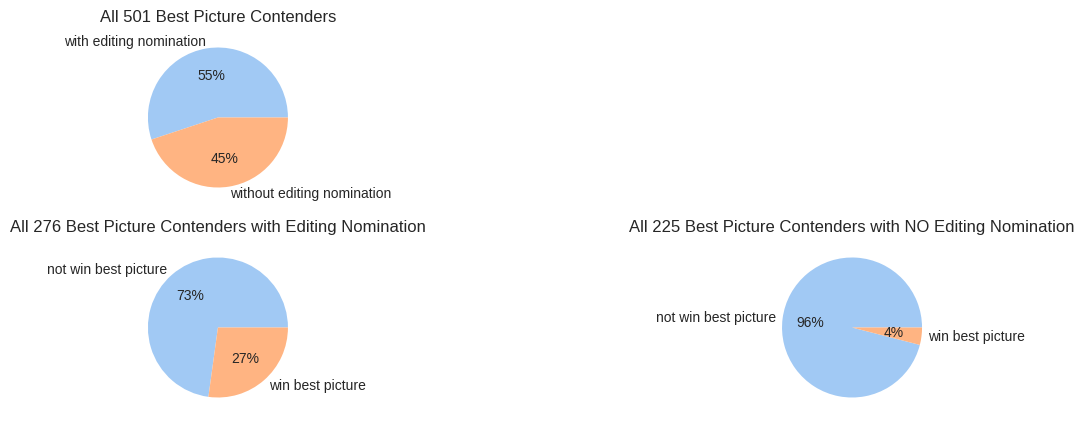

In [ ]:
# @title Visual Representation Best Picture Nominees

plt.figure(figsize = (15,5))

#DISTRIBTUION AMONG BEST PICTURE CONTENDERS
bp_contender_no_edit_nom = bp_nominees[bp_nominees['best_editing'].isnull()].shape[0]

x= bp_nominees.shape[0] - bp_contender_no_edit_nom
y = bp_contender_no_edit_nom
data = [x, y]
keys = ['with editing nomination', 'without editing nomination']

plt.subplot(221)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders")


#WITH EDITING NOMINATION
bp_nominee_edit_nom = bp_nominees[bp_nominees['best_editing'].notnull()][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_edit_nom = bp_nominees[bp_nominees['best_editing'].notnull()][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_edit_nom
y = bp_winner_edit_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(223)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders with Editing Nomination")

#NO EDITING NOMINATION
bp_nominee_no_edit_nom = bp_nominees[bp_nominees['best_editing'].isnull()][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_no_edit_nom = bp_nominees[bp_nominees['best_editing'].isnull()][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_no_edit_nom
y = bp_winner_no_edit_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(224)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders with NO Editing Nomination")

### Observation Summary
*   Best Picture Nominees have an 55% Probability of having an Editing Nomination
*   Best Picture Nominee with an Editing Nomination has 27% probability of winning Best Picture.
*   Best Picture Nominee without an Editing Nomination has 4% probability of winning Best Picture



### [Supplementary] Editing Wins among Best Picture Winners

Text(0.5, 1.0, 'Best Picture Winners with Editing WIN')

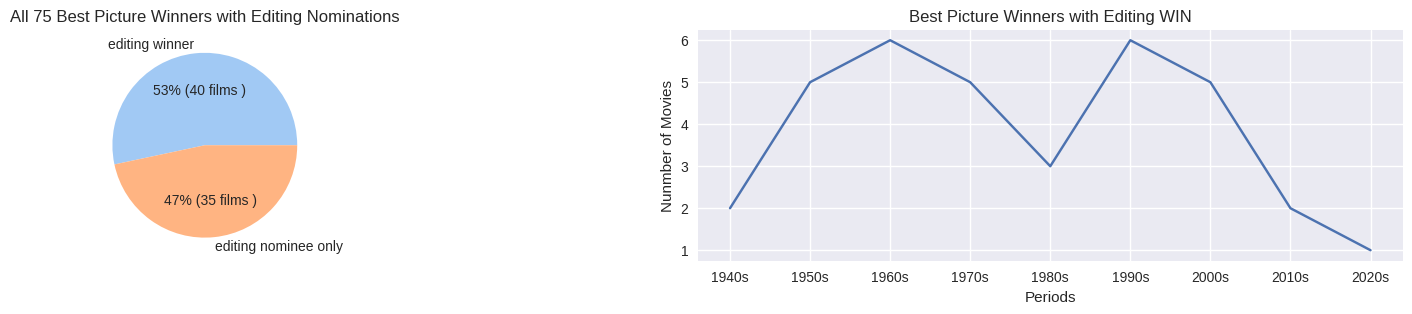

In [ ]:
# @title Editing Category Win among Best Picture Winners
bp_win_editing = bp_winner[bp_winner['best_editing']=='Win']

x= bp_winner[bp_winner['best_editing'].notnull()].shape[0]-bp_win_editing.shape[0]
y = bp_win_editing.shape[0]
a = x+y
data = [x, y]
keys = ['editing winner', 'editing nominee only']

# plotting data on chart
plt.figure(figsize = (20,3))
plt.subplot(121)
plt.pie(data, labels=keys, colors=palette_color, autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.title(f"All {a} Best Picture Winners with Editing Nominations")

def count_editing_win(series):
    return (series=='Win').sum()

bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')

bp_win_editing_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_editing_win)['best_editing'].reset_index()
bp_win_editing_decade = bp_win_editing_decade.rename(columns={'year_ceremony':'periods','best_editing':'editing'})
bp_win_editing_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=bp_win_editing_decade, y='editing',x='periods')
plt.xlabel('Periods')
plt.ylabel('Nunmber of Movies')
#plt.yticks(np.arange(0, 5, step=1))
plt.title('Best Picture Winners with Editing WIN')

## **Lead & Supporting Performance Category**

### **Lead & Supporting Performance Nomination among Best Picture Winners**

Text(0.5, 1.0, 'Best Picture Winners with ZERO Acting NOMINATIONS')

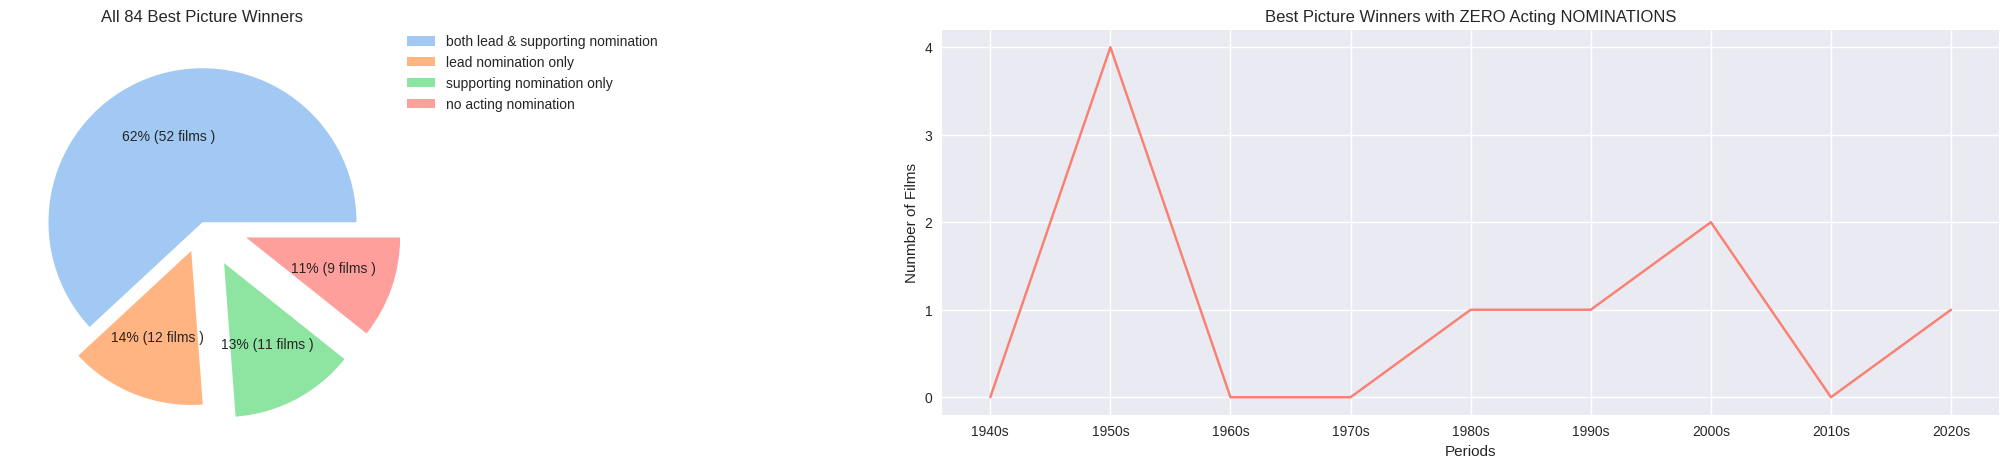

In [ ]:
# @title Visualization of Acting Nominations among Best Picture Winners

# Visualization of Acting Nomination
bp_win_2_acting_nom =  bp_win_category[(bp_win_category['best_lead_performance'].notnull())&(bp_win_category['best_supporting_performance'].notnull())]
bp_win_lead_nom =  bp_win_category[(bp_win_category['best_lead_performance'].notnull())&(bp_win_category['best_supporting_performance'].isnull())]
bp_win_supporting_nom =  bp_win_category[(bp_win_category['best_lead_performance'].isnull())&(bp_win_category['best_supporting_performance'].notnull())]
bp_win_no_acting = bp_win_category[(bp_win_category['best_lead_performance'].isnull()) &(bp_win_category['best_supporting_performance'].isnull())]

a = bp_win_category.shape[0]

x = bp_win_2_acting_nom.shape[0]
y = bp_win_lead_nom.shape[0]
z = bp_win_supporting_nom.shape[0]
f = bp_win_no_acting.shape[0]

data = [x,y,z,f]
keys = ['both lead & supporting nomination', 'lead nomination only','supporting nomination only', 'no acting nomination']


# plotting data on chart
plt.figure(figsize = (30,5))
plt.subplot(121)
plt.pie(data, labels = None,colors=palette_color,explode=(0,0.2,0.3,0.3), autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.legend(labels = keys, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title(f"All {a} Best Picture Winners")


#Best Picture Winners with Zero Acting Nomination - visualized through time
bp_win_no_acting_1940s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(1940,1950))].shape[0]
bp_win_no_acting_1950s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(1950,1960))].shape[0]
bp_win_no_acting_1960s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(1960,1970))].shape[0]
bp_win_no_acting_1970s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(1970,1980))].shape[0]
bp_win_no_acting_1980s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(1980,1990))].shape[0]
bp_win_no_acting_1990s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(1990,2000))].shape[0]
bp_win_no_acting_2000s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(2000,2010))].shape[0]
bp_win_no_acting_2010s = bp_win_no_acting[bp_win_no_acting['year_ceremony'].isin(range(2010,2020))].shape[0]
bp_win_no_acting_2020s = bp_win_no_acting[bp_win_no_acting['year_ceremony']>=2020].shape[0]

d6 = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'no acting':[bp_win_no_acting_1940s,bp_win_no_acting_1950s,bp_win_no_acting_1960s,bp_win_no_acting_1970s,bp_win_no_acting_1980s,
                bp_win_no_acting_1990s,bp_win_no_acting_2000s,bp_win_no_acting_2010s,bp_win_no_acting_2020s]}

bp_win_no_acting_decade = pd.DataFrame(data=d6)

plt.subplot(122)
sns.lineplot(data=bp_win_no_acting_decade, y='no acting',x='period',color = 'salmon')
plt.xlabel('Periods')
plt.ylabel('Nunmber of Films')
plt.yticks(np.arange(0, 5, step=1))
plt.title('Best Picture Winners with ZERO Acting NOMINATIONS')


In [ ]:
# @title Of the 3 Best Picture Winners without an Acting Nomination since 2000s, one movie (LOTR) is a Fantasy movie (hence less focus on acting) , and the other two (Slumdog Millionaire & Parasite) all features 100% Ensemle of Indian/ Korean Minority (which suggests their unpopularity when voters vote for Actors/ Actresses)
bp_win_category[(bp_win_category['best_lead_performance'].isnull()) & (bp_win_category['best_supporting_performance'].isnull())][bp_win_category['year_ceremony']>1999][['year_ceremony','film','best_lead_performance','best_supporting_performance']]

<ipython-input-51-9c7289bd9c3b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_win_category[(bp_win_category['best_lead_performance'].isnull()) & (bp_win_category['best_supporting_performance'].isnull())][bp_win_category['year_ceremony']>1999][['year_ceremony','film','best_lead_performance','best_supporting_performance']]


year_ceremony                                           film  \
64           2004  The Lord of the Rings: The Return of the King   
69           2009                            Slumdog Millionaire   
80           2020                                       Parasite   

   best_lead_performance best_supporting_performance  
64                  None                        None  
69                  None                        None  
80                  None                        None

Text(0.5, 1.0, 'Best Picture Winners with Acting NOMINATIONS')

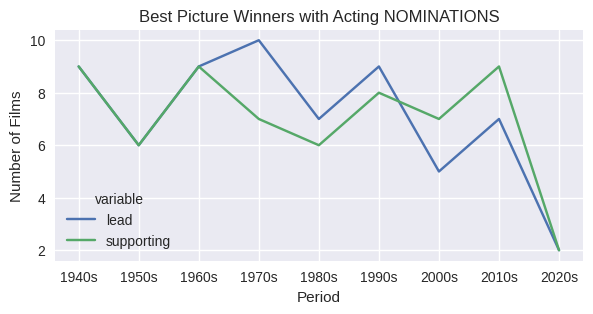

In [ ]:
# @title Lead & Supporting Nomination overtime among Best Pictures with Acting Nomination

#BP WINNERS WITH ACTING NOMINATIONS
def count_nom(series):
    return series.notnull().sum()

bp_winner_copy = bp_win_category.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')
bp_win_acting_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_nom)[['best_lead_performance','best_supporting_performance']].reset_index()

bp_win_acting_decade  = bp_win_acting_decade.rename(columns={'year_ceremony':'periods','best_lead_performance':'lead','best_supporting_performance':'supporting'})
bp_win_acting_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.figure(figsize = (15,3))
plt.subplot(121)
sns.lineplot(data=bp_win_acting_decade.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of Films')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with Acting NOMINATIONS')

Text(0.5, 1.0, 'Best Picture Winners with Lead Acting NOMINATIONS')

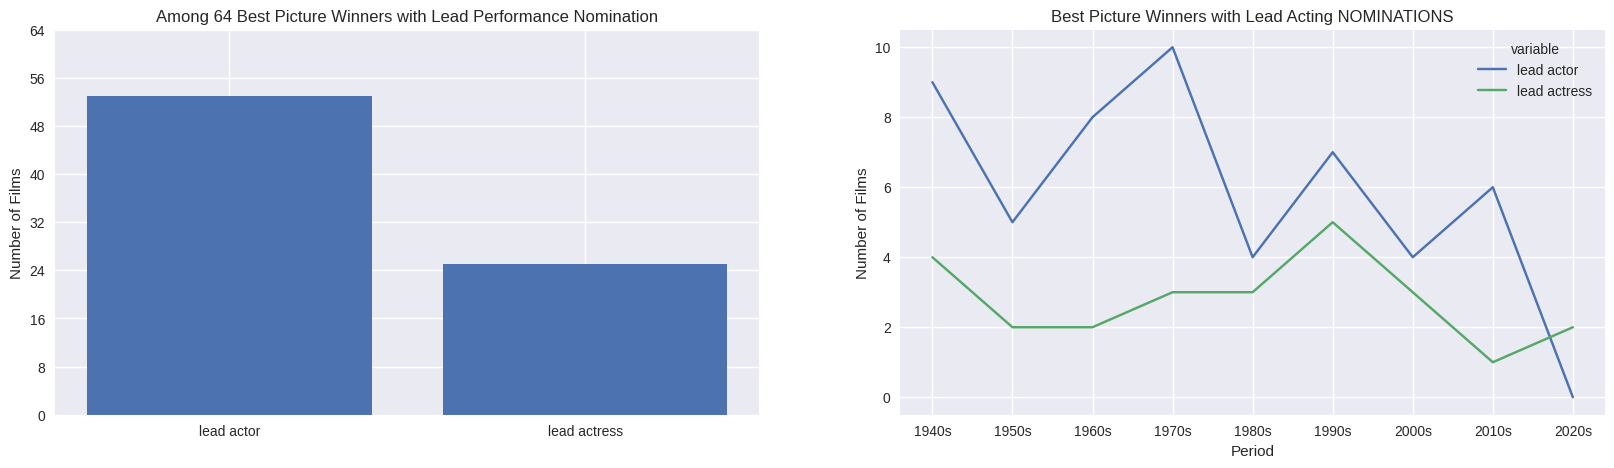

In [ ]:
# @title Gender Breakdown in Lead Performance Nomination among Best Picture Winner

# Visualization of Gender Breakdown in Lead Performance
bp_win_actor_nom = bp_winner[(bp_winner['best_actor'].notnull())]#&(bp_winner['best_actress'].isnull())]
bp_win_actress_nom = bp_winner[(bp_winner['best_actress'].notnull())]#&(bp_winner['best_actress'].notnull())]

a = bp_winner[(bp_winner['best_actor'].notnull())|(bp_winner['best_actress'].notnull())].shape[0]

x = bp_win_actor_nom.shape[0]
y = bp_win_actress_nom.shape[0]

data = [x,y]
keys = ['lead actor','lead actress']
k = {'lead actor':[x],'lead actress':[y]}

# plotting data on chart
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.bar(keys,data)
plt.ylabel('Number of Films')
plt.yticks(np.arange(0,65, step = 8))
plt.title(f"Among {a} Best Picture Winners with Lead Performance Nomination")


#BP WINNERS WITH LEAD ACTING NOMINATIONS - visualized via time
def count_nom(series):
    return series.notnull().sum()

bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')
bp_win_lead_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_nom)[['best_actor','best_actress']].reset_index()

bp_win_lead_decade  = bp_win_lead_decade.rename(columns={'year_ceremony':'periods','best_actor':'lead actor','best_actress':'lead actress'})
bp_win_lead_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=bp_win_lead_decade.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of Films')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with Lead Acting NOMINATIONS')

Text(0.5, 1.0, 'Best Picture Winners with Supporting Performance Nomination')

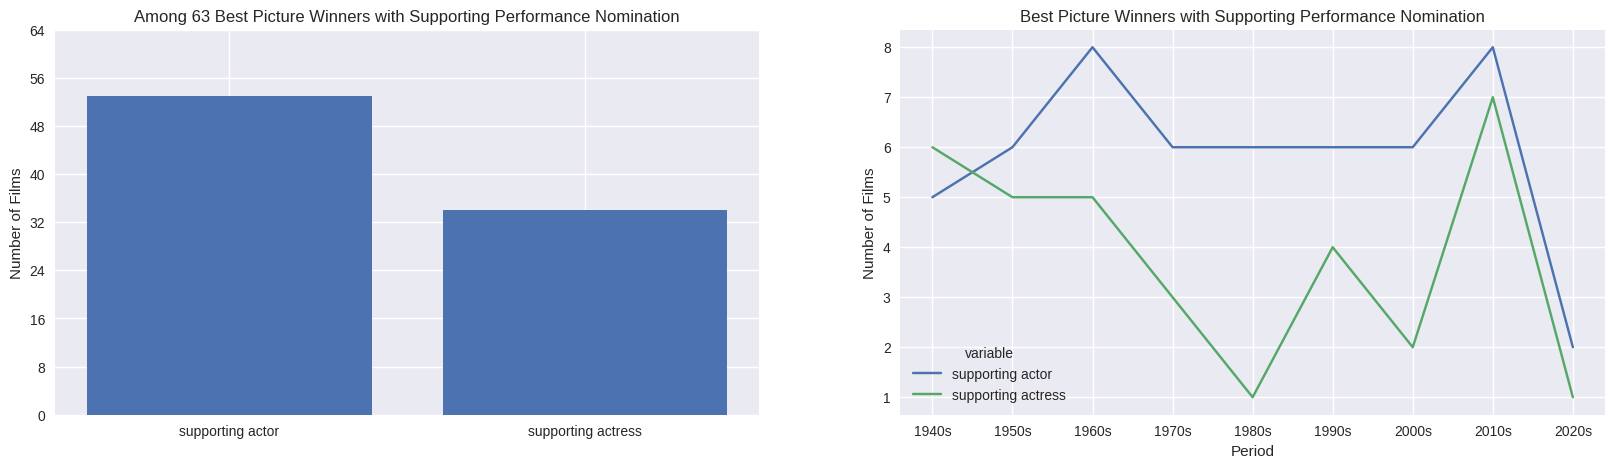

In [ ]:
# @title Gender Breakdown in Supporting Performance Nomination among Best Picture Winners

# Visualization of Gender Breakdown in Lead Performance
bp_win_support_actor_nom = bp_winner[(bp_winner['best_supporting_actor'].notnull())]#&(bp_winner['best_actress'].isnull())]
bp_win_support_actress_nom = bp_winner[(bp_winner['best_supporting_actress'].notnull())]#&(bp_winner['best_actress'].notnull())]

a = bp_winner[(bp_winner['best_supporting_actor'].notnull())|(bp_winner['best_supporting_actress'].notnull())].shape[0]

x = bp_win_support_actor_nom.shape[0]
y = bp_win_support_actress_nom.shape[0]

data = [x,y]
keys = ['supporting actor','supporting actress']
k = {'supporting actor':[x],'supporting actress':[y]}

# plotting data on chart
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.bar(keys,data)
plt.ylabel('Number of Films')
plt.yticks(np.arange(0,65, step = 8))
plt.title(f"Among {a} Best Picture Winners with Supporting Performance Nomination")


#BP WINNERS WITH LEAD ACTING NOMINATIONS - visualized via time
def count_nom(series):
    return series.notnull().sum()

bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')
bp_win_support_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_nom)[['best_supporting_actor','best_supporting_actress']].reset_index()

bp_win_support_decade  = bp_win_support_decade.rename(columns={'year_ceremony':'periods','best_supporting_actor':'supporting actor','best_supporting_actress':'supporting actress'})
bp_win_support_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=bp_win_support_decade.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of Films')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with Supporting Performance Nomination')

### Observation Summary
*   89% Best Picture Winners have an Acting Nomination (either Lead or Supporting or both)
*   Only 3 Best Picture Winners in the past 20 Years have had 0 Acting Nomination. 2 are movies with foreign cast, 1 movie is a fantasy movie with heavy CGI.
*   Among those with Acting Nominatinos, fairly equal distribution between Lead & Supporting Nomination, though in 2010s, Supporting Nominations are more prominent
*   Among both Lead & Supporting Performance, Nomination for Male Actors are far higher than Female ones

### **Lead & Supporting Nominations among Best Picture Nominees & Probability of Winning Best Picture**

<ipython-input-55-d6d75dcf7ffd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_no_lead_nom = bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-55-d6d75dcf7ffd>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_no_lead_nom= bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]
<ipython-input-55-d6d75dcf7ffd>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_actor_only_nom = bp_nominees[(bp_nominees['best_actor'].notnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-55-d6d75dcf7ffd>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_actor_only_nom= bp_nominees[(bp_nominees['best_actor'].

Text(0.5, 1.0, 'All 63 Best Picture Contenders \n  that has BOTH Lead Actress & Lead Actor Nomination')

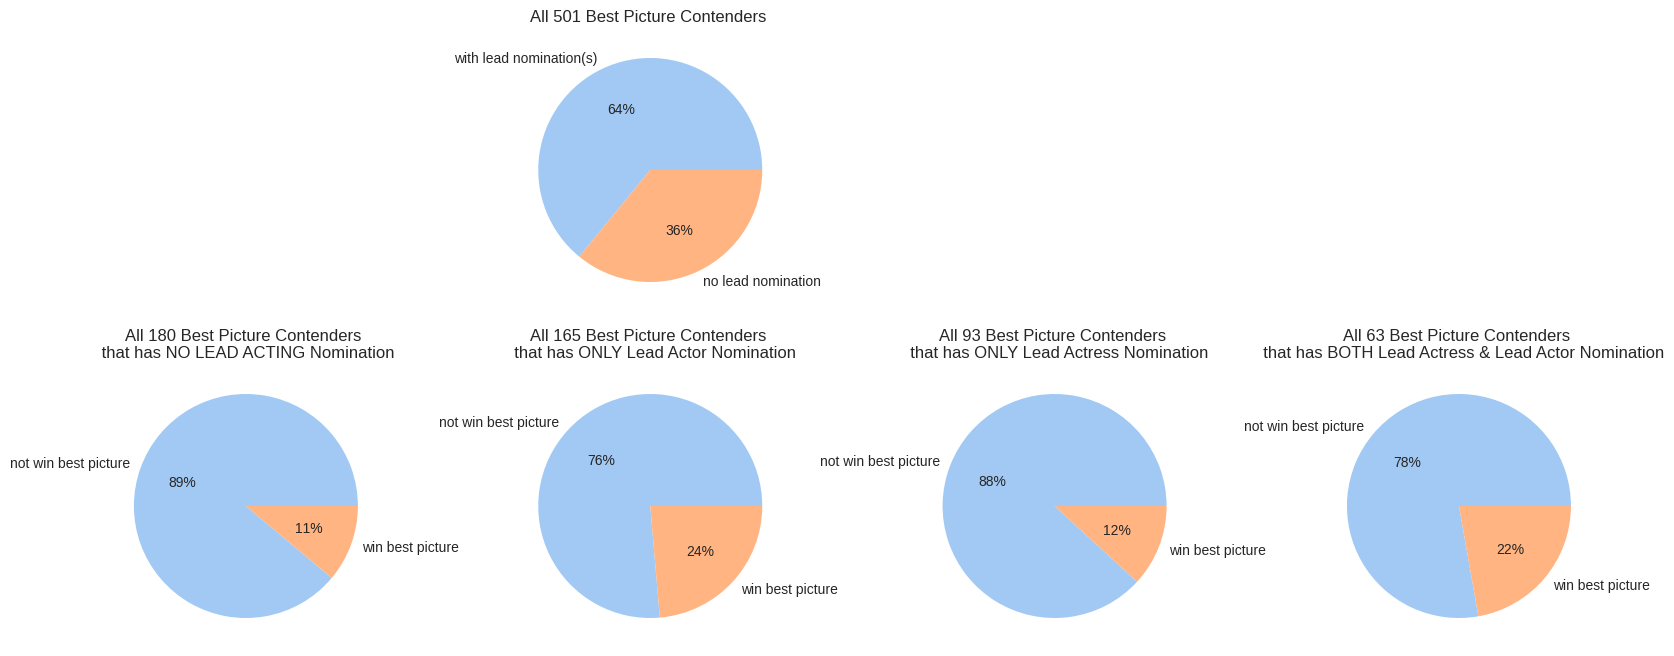

In [ ]:
# @title Lead Acting Nomination among Best Picture Contenders & Probability of Winning Best Picture

plt.figure(figsize = (20,8))

#DISTRIBUTION AMONG BEST PICTURE CONTENDERS
bp_contender_no_lead_nom = bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].isnull())].shape[0]

x= bp_nominees.shape[0] - bp_contender_no_lead_nom
y= bp_contender_no_lead_nom
data = [x, y]
keys = ['with lead nomination(s)','no lead nomination']

plt.subplot(242)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders ")

#NO LEAD
bp_nominee_no_lead_nom = bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_no_lead_nom= bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_no_lead_nom
y= bp_winner_no_lead_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(245)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n that has NO LEAD ACTING Nomination")


#LEAD ACTOR ONLY
bp_nominee_actor_only_nom = bp_nominees[(bp_nominees['best_actor'].notnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_actor_only_nom= bp_nominees[(bp_nominees['best_actor'].notnull())&(bp_nominees['best_actress'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_actor_only_nom
y= bp_winner_actor_only_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(246)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n  that has ONLY Lead Actor Nomination")

#LEAD ACTRESS ONLY
bp_nominee_actress_only_nom = bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].notnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_actress_only_nom= bp_nominees[(bp_nominees['best_actor'].isnull())&(bp_nominees['best_actress'].notnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_actress_only_nom
y= bp_winner_actress_only_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(247)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n  that has ONLY Lead Actress Nomination")

#BOTH GENDER
bp_nominee_both_lead_nom = bp_nominees[(bp_nominees['best_actor'].notnull())&(bp_nominees['best_actress'].notnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_both_lead_nom= bp_nominees[(bp_nominees['best_actor'].notnull())&(bp_nominees['best_actress'].notnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_both_lead_nom
y= bp_winner_both_lead_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(248)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n  that has BOTH Lead Actress & Lead Actor Nomination")

<ipython-input-56-9ca19431d34d>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_no_support_nom = bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-56-9ca19431d34d>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_winner_no_support_nom= bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]
<ipython-input-56-9ca19431d34d>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_nominee_support_actor_only_nom = bp_nominees[(bp_nominees['best_supporting_actor'].notnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
<ipython-input-56-9ca19431d34d>:33: UserWarning: Boolean Series key will be reindexed to match Data

Text(0.5, 1.0, 'All 82 Best Picture Contenders \n that has BOTH Supporting Actress & Supporting Actor Nomination')

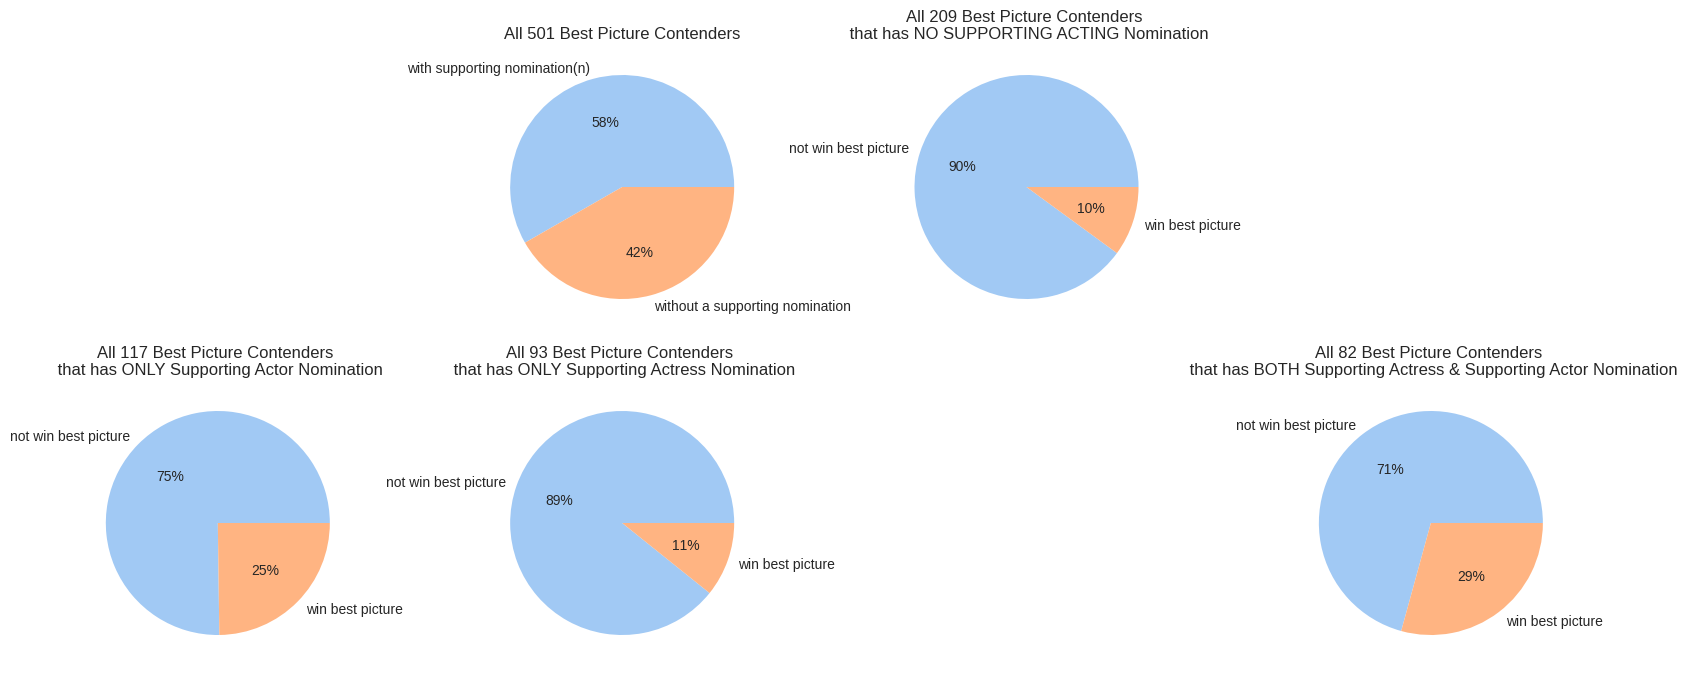

In [ ]:
# @title Supporting  Acting Nomination among Best Picture Contenders & Probability of Winning Best Picture

plt.figure(figsize = (20,8))


#DISTRIBUTION AMONG ALL BEST PICTURE CONTENERS
bp_contender_no_support_nom = bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].isnull())].shape[0]

x= bp_nominees.shape[0] - bp_contender_no_support_nom
y= bp_contender_no_support_nom
data = [x, y]
keys = ['with supporting nomination(n)', 'without a supporting nomination ']

plt.subplot(242)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders")

#NO SUPPORTING
bp_nominee_no_support_nom = bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_no_support_nom= bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_no_support_nom
y= bp_winner_no_support_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(243)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n that has NO SUPPORTING ACTING Nomination")

#SUPPORTING ACTOR ONLY
bp_nominee_support_actor_only_nom = bp_nominees[(bp_nominees['best_supporting_actor'].notnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_support_actor_only_nom = bp_nominees[(bp_nominees['best_supporting_actor'].notnull())&(bp_nominees['best_supporting_actress'].isnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_support_actor_only_nom
y= bp_winner_support_actor_only_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(245)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n that has ONLY Supporting Actor Nomination")

#SUPPORTING ACTRESS ONLY
bp_nominee_support_actress_only_nom = bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].notnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_support_actress_only_nom= bp_nominees[(bp_nominees['best_supporting_actor'].isnull())&(bp_nominees['best_supporting_actress'].notnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_support_actress_only_nom
y= bp_winner_support_actress_only_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(246)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n that has ONLY Supporting Actress Nomination")

#BOTH GENDER
bp_nominee_both_support_nom = bp_nominees[(bp_nominees['best_supporting_actor'].notnull())&(bp_nominees['best_supporting_actress'].notnull())][bp_nominees['best_picture']=='Nom'].shape[0]
bp_winner_both_support_nom= bp_nominees[(bp_nominees['best_supporting_actor'].notnull())&(bp_nominees['best_supporting_actress'].notnull())][bp_nominees['best_picture']=='Win'].shape[0]

x= bp_nominee_both_support_nom
y= bp_winner_both_support_nom
data = [x, y]
keys = ['not win best picture', 'win best picture']

plt.subplot(248)
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"All {x+y} Best Picture Contenders \n that has BOTH Supporting Actress & Supporting Actor Nomination")



### Observation Summary

* Best Picture Contenders have 64% Probability of having a Lead Nomination, and 58% of having Supporting Nomination   


For Lead Category
*   in which, having a Lead Actor Nomination (either only Lead Actor or Lead Actor + Lead Actress) has highest probability, at 24% and 22%, respectively.
*   Having a Lead Actress nomination ONLY have 12% probability of winning best picture, ~a half compared to having Lead Actor nomination.

=> If a Best Picture Contenders have minimum 1 Lead Acting Nomination (any gender), it has a total 11% Probability of winning Best Picture (= (24%+22%+12%)*33%)

*   Those without any Lead Nomination, probability of winning Best Picture is 11%


For Supporting Category
*   Having both Supporting Actors & Supporting Actress has highest probability at 29%, or only Suppoorting Actor nomination, at 25%.
*   Having a Supporting Actress nomination ONLY have 11% probability of winning best picture, ~a half compared to having Supporting Actor nomination

=>  If a Best Picture Contenders have minimum 1 Supporting Nomination (any gender) a total 13% Probability of winning Best Picture (= (11%+25%+29%)*33%)


*   Those ithout any Lead Nomination has probability of winning Best Picture is 10%




### **[Supplementary] Lead & Supporting Performance Wins among Best Picture Winners**

Text(0.5, 1.0, 'Best Picture Winners with MINIMUM 1 Acting WINS')

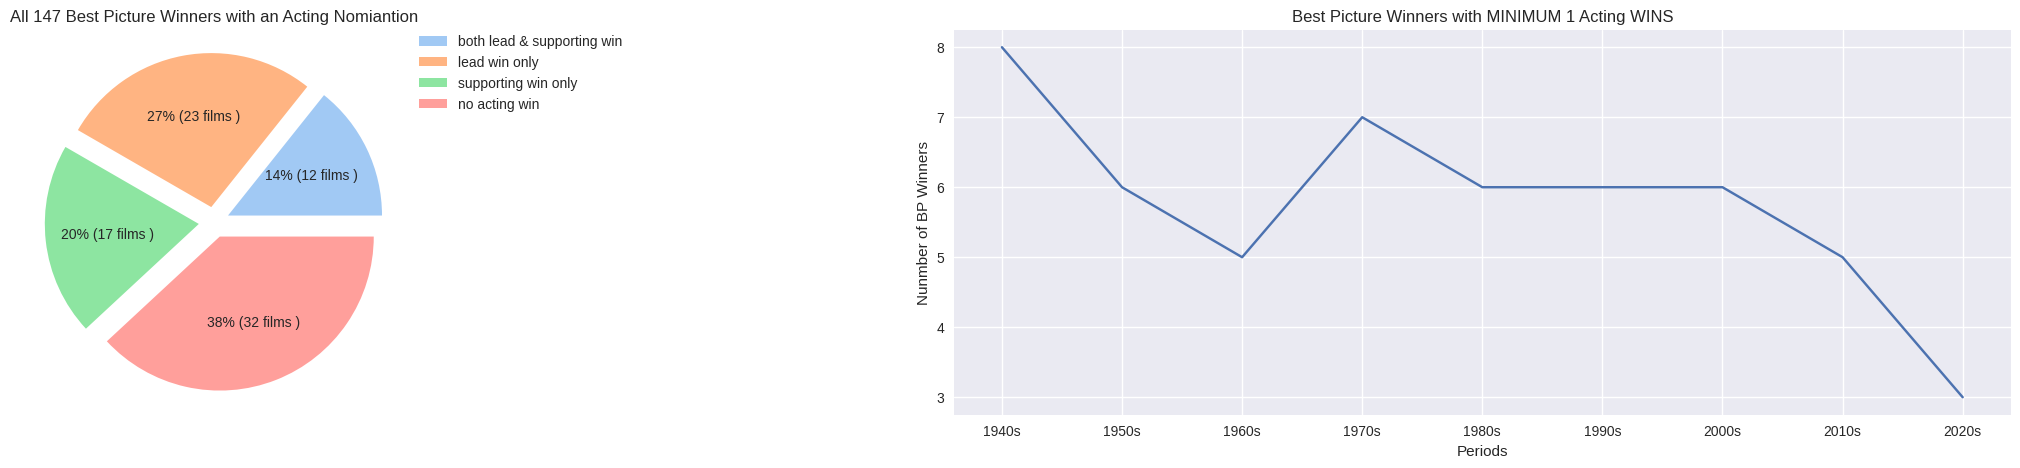

In [ ]:
# @title Visualization of Acting Wins among Best Picture Winners


# Visualization of Acting Win
bp_win_2_acting_win =  bp_win_category[(bp_win_category['best_lead_performance']=='Win')&(bp_win_category['best_supporting_performance']=='Win')]
bp_win_lead_win =  bp_win_category[(bp_win_category['best_lead_performance']=='Win')&(bp_win_category['best_supporting_performance']!= 'Win')]
bp_win_supporting_win =  bp_win_category[(bp_win_category['best_lead_performance']!='Win')&(bp_win_category['best_supporting_performance']=='Win')]
bp_win_no_acting_win = bp_win_category[(bp_win_category['best_lead_performance']!= 'Win') &(bp_win_category['best_supporting_performance']!= 'Win')]

x = bp_win_2_acting_win.shape[0]
y = bp_win_lead_win.shape[0]
z = bp_win_supporting_win.shape[0]
f = bp_win_no_acting_win.shape[0]
a = x+y+z+f+a

data = [x,y,z,f]
keys = ['both lead & supporting win', 'lead win only','supporting win only', 'no acting win']


# plotting data on chart
plt.figure(figsize = (30,5))
plt.subplot(121)
plt.pie(data, labels = None,colors=palette_color,explode=(0.1,0.1,0.1,0.1), autopct=lambda p:f'{p:.0f}% ({p*sum(data)/100 :.0f} films )')
plt.legend(labels = keys, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title(f"All {a} Best Picture Winners with an Acting Nomiantion")



# Visualization of Acting Win by time
bp_win_acting = bp_win_category[(bp_win_category['best_lead_performance']=='Win') | (bp_win_category['best_supporting_performance']=='Win')]

bp_win_acting_1940s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(1940,1950))].shape[0]
bp_win_acting_1950s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(1950,1960))].shape[0]
bp_win_acting_1960s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(1960,1970))].shape[0]
bp_win_acting_1970s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(1970,1980))].shape[0]
bp_win_acting_1980s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(1980,1990))].shape[0]
bp_win_acting_1990s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(1990,2000))].shape[0]
bp_win_acting_2000s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(2000,2010))].shape[0]
bp_win_acting_2010s = bp_win_acting[bp_win_acting['year_ceremony'].isin(range(2010,2020))].shape[0]
bp_win_acting_2020s = bp_win_acting[bp_win_acting['year_ceremony']>=2020].shape[0]

d6 = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'no acting':[bp_win_acting_1940s,bp_win_acting_1950s,bp_win_acting_1960s,bp_win_acting_1970s,bp_win_acting_1980s,
                bp_win_acting_1990s,bp_win_acting_2000s,bp_win_acting_2010s,bp_win_acting_2020s]}

bp_win_acting_decade = pd.DataFrame(data=d6)
bp_win_acting_decade

plt.subplot(122)
sns.lineplot(data=bp_win_acting_decade, y='no acting',x='period')
plt.xlabel('Periods')
plt.ylabel('Nunmber of BP Winners')
plt.title('Best Picture Winners with MINIMUM 1 Acting WINS')

Text(0.5, 1.0, 'Best Picture Winners with Acting WINS')

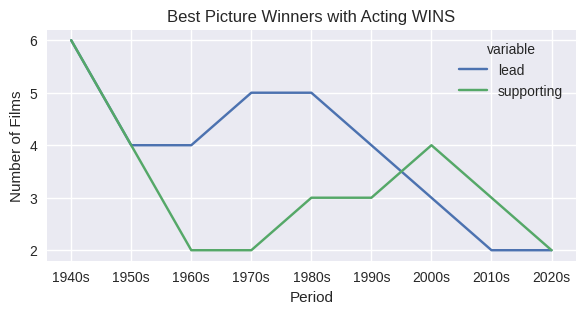

In [ ]:
# @title Lead & Supporting Wins overtime among Best Pictures with Acting Nomination

#BP WINNERS WITH ACTING NOMINATIONS
def count_win(series):
    return (series=='Win').sum()

bp_winner_copy = bp_win_category.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')
bp_win_acting_win_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_win)[['best_lead_performance','best_supporting_performance']].reset_index()

bp_win_acting_win_decade  = bp_win_acting_win_decade.rename(columns={'year_ceremony':'periods','best_lead_performance':'lead','best_supporting_performance':'supporting'})
bp_win_acting_win_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.figure(figsize = (15,3))
plt.subplot(121)
sns.lineplot(data=bp_win_acting_win_decade.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of Films')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with Acting WINS')

Text(0.5, 1.0, 'Best Picture Winners with Lead Acting WINS')

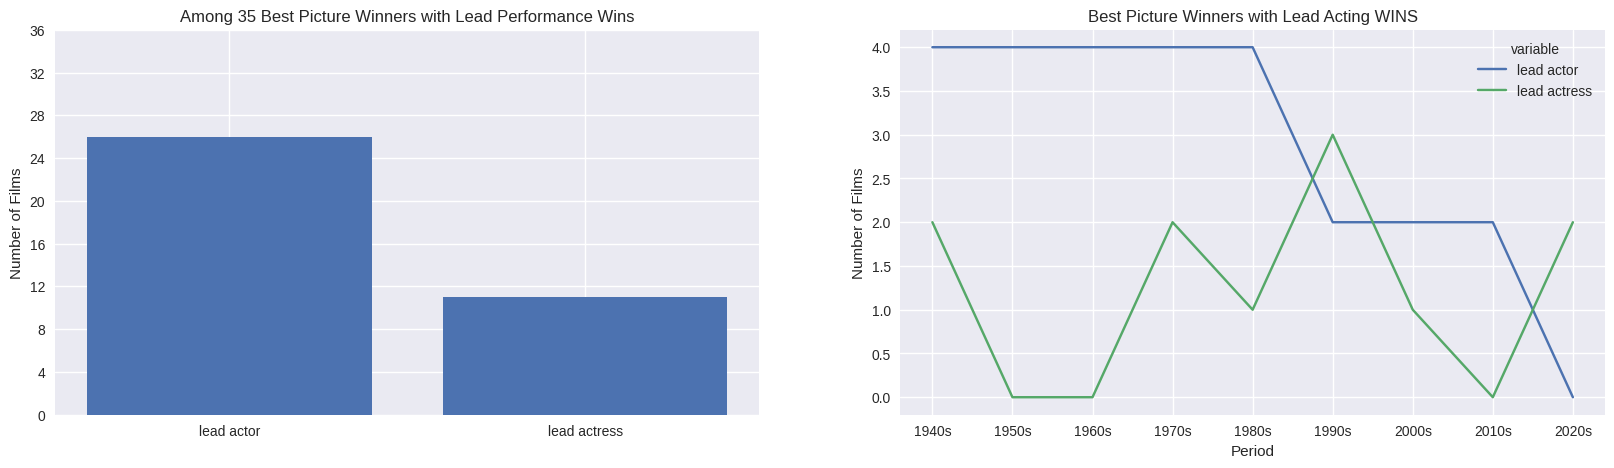

In [ ]:
# @title Gender Breakdown in Lead Acting WINS among Best Picture Winners

# Visualization of Gender Breakdown in Lead Performance Wins
bp_win_actor_win = bp_winner[(bp_winner['best_actor']=='Win')]
bp_win_actress_win = bp_winner[(bp_winner['best_actress']=='Win')]

a = bp_winner[(bp_winner['best_actor']=='Win')|(bp_winner['best_actress']=='Win')].shape[0]

x = bp_win_actor_win.shape[0]
y = bp_win_actress_win.shape[0]

data = [x,y]
keys = ['lead actor','lead actress']
k = {'lead actor':[x],'lead actress':[y]}

# plotting data on chart
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.bar(keys,data)
plt.ylabel('Number of Films')
plt.yticks(np.arange(0,37, step = 4))
plt.title(f"Among {a} Best Picture Winners with Lead Performance Wins")


#BP WINNERS WITH LEAD ACTING WINS - visualized via time
def count_win(series):
    return (series=='Win').sum()

bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')
bp_win_lead_win_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_win)[['best_actor','best_actress']].reset_index()

bp_win_lead_win_decade  = bp_win_lead_win_decade.rename(columns={'year_ceremony':'periods','best_actor':'lead actor','best_actress':'lead actress'})
bp_win_lead_win_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=bp_win_lead_win_decade.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of Films')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with Lead Acting WINS')

Text(0.5, 1.0, 'Best Picture Winners with Supporting Performance Wins')

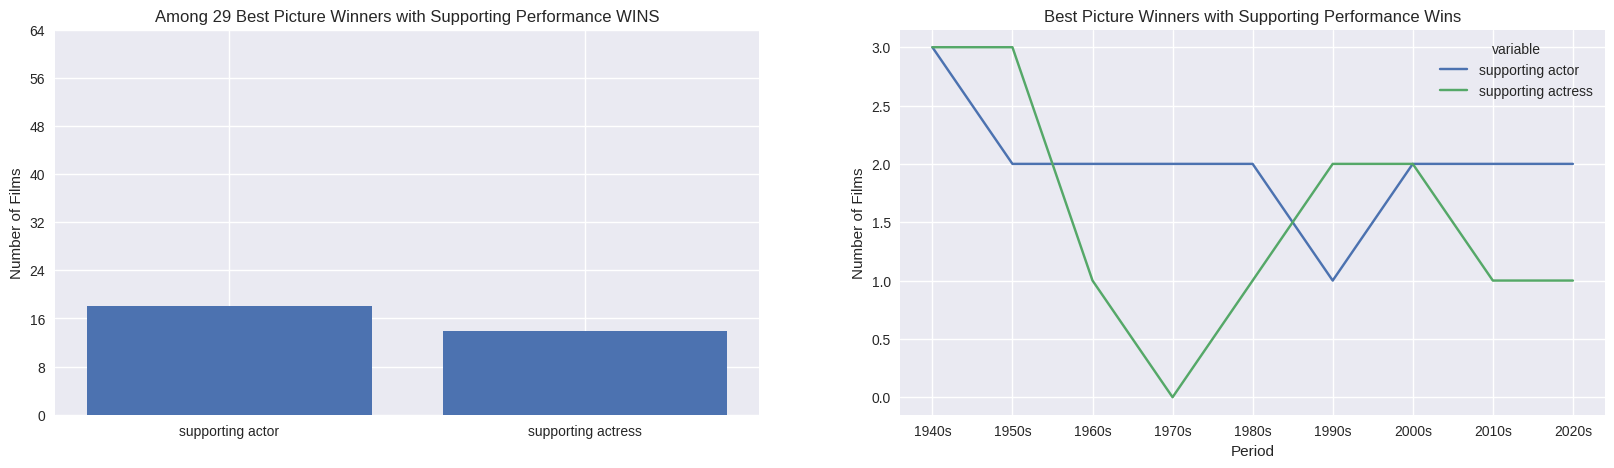

In [ ]:
# @title Gender Breakdown in Supporting Performance WINS among Best Picture Winners

# Visualization of Gender Breakdown in Lead Performance
bp_win_support_actor_win = bp_winner[(bp_winner['best_supporting_actor']=='Win')]#&(bp_winner['best_actress'].isnull())]
bp_win_support_actress_win = bp_winner[(bp_winner['best_supporting_actress']=='Win')]#&(bp_winner['best_actress'].notnull())]

a = bp_winner[(bp_winner['best_supporting_actor']=='Win')|(bp_winner['best_supporting_actress']=='Win')].shape[0]

x = bp_win_support_actor_win.shape[0]
y = bp_win_support_actress_win.shape[0]

data = [x,y]
keys = ['supporting actor','supporting actress']
k = {'supporting actor':[x],'supporting actress':[y]}

# plotting data on chart
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.bar(keys,data)
plt.ylabel('Number of Films')
plt.yticks(np.arange(0,65, step = 8))
plt.title(f"Among {a} Best Picture Winners with Supporting Performance WINS")


#BP WINNERS WITH LEAD ACTING NOMINATIONS - visualized via time
def count_win(series):
    return (series=='Win').sum()

bp_winner_copy = bp_winner.copy()
bp_winner_copy['year_ceremony'] = pd.to_datetime(bp_winner_copy['year_ceremony'].astype(str), format='%Y')
bp_win_support_win_decade = bp_winner_copy.groupby((bp_winner_copy.year_ceremony.dt.year//10)*10).apply(count_win)[['best_supporting_actor','best_supporting_actress']].reset_index()

bp_win_support_win_decade  = bp_win_support_win_decade.rename(columns={'year_ceremony':'periods','best_supporting_actor':'supporting actor','best_supporting_actress':'supporting actress'})
bp_win_support_win_decade['periods'] = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

plt.subplot(122)
sns.lineplot(data=bp_win_support_win_decade.melt('periods'), x='periods', y = 'value', hue = 'variable')
plt.xlabel('Period')
plt.ylabel('Number of Films')
#plt.xticks(np.arange(1940, 2024, step=2))
plt.title('Best Picture Winners with Supporting Performance Wins')

# **Probability Map**

In [ ]:
# @title For Director Category

no_director_nom = 1
with_director_nom = 1

no_director_nom_winbp = round((bp_winner_no_director_nom /(bp_winner_no_director_nom + bp_nominee_no_director_nom)),3)
with_director_nom_winbp = round((bp_winner_director_nom / (bp_winner_director_nom + bp_nominee_director_nom)),3)

p_director = [['no director nom', no_director_nom, no_director_nom_winbp], ['with director nom', with_director_nom, with_director_nom_winbp]]
p_director = pd.DataFrame(p_director, columns=['craft_status','p_craft_status', 'p_win_best_picture_on_craft_status'])

p_director

craft_status  p_craft_status  p_win_best_picture_on_craft_status
0    no director nom               1                               0.024
1  with director nom               1                               0.242

In [ ]:
# @title For Screenplay Category

no_screenplay_nom = 1
no_screenplay_nom_winbp = round((bp_winner_no_screenplay_nom / (bp_winner_no_screenplay_nom + bp_nominee_no_screenplay_nom)),4)

#breakdown into screenplay categories
with_screenplay_nom = 1
with_original_nom = round((bp_nominee_original + bp_winner_original)/(bp_nominees.shape[0]-bp_contender_no_screenplay_nom),3)
with_adapted_nom = round((bp_nominee_adapted + bp_winner_adapted)/(bp_nominees.shape[0]-bp_contender_no_screenplay_nom),3)


with_original_nom_winbp = round((bp_winner_original / (bp_winner_original + bp_nominee_original)),4)
with_adapted_nom_winbp = round((bp_winner_adapted / (bp_winner_adapted + bp_nominee_adapted)),4)
with_screenplay_nom_winbp = round((with_original_nom_winbp*with_original_nom + with_adapted_nom*with_adapted_nom_winbp),3)

p_screenplay = [['no screenplay nom', no_screenplay_nom , no_screenplay_nom_winbp,],
                ['with screenplay nom (original or adapted)',with_screenplay_nom, with_screenplay_nom_winbp],
                ['breakdown - original screenplay nom', with_original_nom, with_original_nom_winbp],
                ['breakdown - adapted screenplay nom', with_adapted_nom, with_adapted_nom_winbp]]

p_screenplay = pd.DataFrame(p_screenplay, columns=['craft_status','p_craft_status', 'p_go_on_win_best_picture'])

#p_screenplay['final_p_win_best_picture'] = round((p_screenplay['p_craft_status']*p_screenplay['p_go_on_win_best_picture']),3)
p_screenplay

craft_status  p_craft_status  \
0                          no screenplay nom           1.000   
1  with screenplay nom (original or adapted)           1.000   
2        breakdown - original screenplay nom           0.367   
3         breakdown - adapted screenplay nom           0.633   

   p_go_on_win_best_picture  
0                    0.0189  
1                    0.2080  
2                    0.1931  
3                    0.2160

In [ ]:
# @title For Editing Category

no_edit_nom = 1
with_edit_nom = 1
no_edit_nom_winbp = (bp_winner_no_edit_nom /(bp_winner_no_edit_nom + bp_nominee_no_edit_nom))
with_edit_nom_winbp = (bp_winner_edit_nom / (bp_winner_edit_nom + bp_nominee_edit_nom))

p_edit = [['no editing nom', no_edit_nom, no_edit_nom_winbp], ['with editing nom', with_edit_nom, with_edit_nom_winbp]]
p_edit = pd.DataFrame(p_edit, columns=['craft_status','p_craft_status', 'p_go_on_win_best_picture'])

p_edit

craft_status  p_craft_status  p_go_on_win_best_picture
0    no editing nom               1                  0.040000
1  with editing nom               1                  0.271739

In [ ]:
# @title For Lead Performance Category

no_lead_nom = 1  #(bp_contender_no_lead_nom / bp_nominees.shape[0])
with_lead_nom = 1 #- no_lead_nom

no_lead_nom_winbp = (bp_winner_no_lead_nom /(bp_winner_no_lead_nom + bp_nominee_no_lead_nom))


#breakdown by subcategories
with_both_lead_nom = (bp_winner_both_lead_nom + bp_nominee_both_lead_nom) / (bp_nominees.shape[0]-bp_contender_no_lead_nom)
with_actor_only_nom = (bp_nominee_actor_only_nom + bp_winner_actor_only_nom) / (bp_nominees.shape[0]-bp_contender_no_lead_nom)
with_actress_only_nom = (bp_winner_actress_only_nom + bp_nominee_actress_only_nom) / (bp_nominees.shape[0]-bp_contender_no_lead_nom)

with_both_lead_nom_winbp = (bp_winner_both_lead_nom /(bp_winner_both_lead_nom + bp_nominee_both_lead_nom))
with_actor_nom_winbp = (bp_winner_actor_only_nom /(bp_winner_actor_only_nom + bp_nominee_actor_only_nom))
with_actress_nom_winbp = (bp_winner_actress_only_nom /(bp_winner_actress_only_nom + bp_nominee_actress_only_nom))
with_lead_nom_winbp = (with_both_lead_nom*with_both_lead_nom_winbp) + (with_actor_only_nom*with_actor_nom_winbp)+ (with_actress_only_nom*with_actress_nom_winbp)

#summary
p_lead = [['no lead nom', no_lead_nom , no_lead_nom_winbp ],
          ['with min 1 lead nom (of any gender)',with_lead_nom, with_lead_nom_winbp],
          ['breakdown-lead actor only', with_actor_only_nom , with_actor_nom_winbp],
          ['breakdown - lead actress only', with_actress_only_nom, with_actress_nom_winbp ],
          ['breakdown - both gender nom', with_both_lead_nom, with_both_lead_nom_winbp]]

p_lead = pd.DataFrame(p_lead, columns=['craft_status','p_craft_status', 'p_go_on_win_best_picture'])

#p_lead['final_p_win_best_picture'] = p_lead['p_craft_status']*p_lead['p_go_on_win_best_picture']
p_lead

craft_status  p_craft_status  \
0                          no lead nom        1.000000   
1  with min 1 lead nom (of any gender)        1.000000   
2            breakdown-lead actor only        0.514019   
3        breakdown - lead actress only        0.289720   
4          breakdown - both gender nom        0.196262   

   p_go_on_win_best_picture  
0                  0.111111  
1                  0.199377  
2                  0.236364  
3                  0.118280  
4                  0.222222

In [ ]:
# @title For Supporting Performance Category

no_support_nom = 1 # round((bp_contender_no_support_nom / bp_nominees.shape[0]),3)
no_support_nom_winbp = (bp_winner_no_support_nom /(bp_winner_no_support_nom + bp_nominee_no_support_nom))


#breakdown into subcategories
with_support_nom = 1 #- no_support_nom
with_both_support_nom = (bp_winner_both_support_nom + bp_nominee_both_support_nom) / (bp_nominees.shape[0]-bp_contender_no_support_nom)
with_support_actor_only_nom = (bp_winner_support_actor_only_nom + bp_nominee_support_actor_only_nom)/ (bp_nominees.shape[0]-bp_contender_no_support_nom)
with_support_actress_only_nom =(bp_winner_support_actress_only_nom + bp_nominee_support_actress_only_nom) / (bp_nominees.shape[0]-bp_contender_no_support_nom)

with_both_support_nom_winbp = (bp_winner_both_support_nom /(bp_winner_both_support_nom + bp_nominee_both_support_nom))
with_support_actor_nom_winbp = (bp_winner_support_actor_only_nom /(bp_winner_support_actor_only_nom + bp_nominee_support_actor_only_nom))
with_support_actress_nom_winbp = (bp_winner_support_actress_only_nom /(bp_winner_support_actress_only_nom + bp_nominee_support_actress_only_nom))
with_support_nom_winbp = (with_both_support_nom*with_both_support_nom_winbp) + (with_support_actor_only_nom*with_support_actor_nom_winbp)+(with_support_actress_only_nom*with_support_actress_nom_winbp)

#probability off winning best picture
p_support = [['no supporting nom', no_support_nom , no_support_nom_winbp ],
             ['with min 1 support nom (of any gender)',with_support_nom, with_support_nom_winbp],
             ['supporting actor only', with_support_actor_only_nom , with_support_actor_nom_winbp],
             ['supporting actress only', with_support_actress_only_nom, with_support_actress_nom_winbp ],
             ['both gender nom', with_both_support_nom, with_both_support_nom_winbp]]

p_support = pd.DataFrame(p_support, columns=['craft_status','p_craft_status', 'p_go_on_win_best_picture'])

p_support['final_p_win_best_picture'] = p_support['p_craft_status']*p_support['p_go_on_win_best_picture']
p_support

craft_status  p_craft_status  \
0                       no supporting nom        1.000000   
1  with min 1 support nom (of any gender)        1.000000   
2                   supporting actor only        0.400685   
3                 supporting actress only        0.318493   
4                         both gender nom        0.280822   

   p_go_on_win_best_picture  final_p_win_best_picture  
0                  0.100478                  0.100478  
1                  0.215753                  0.215753  
2                  0.247863                  0.099315  
3                  0.107527                  0.034247  
4                  0.292683                  0.082192

# **SUMMARY**

----
## Ranking Importance of Craft Category (subcategory not included)

Based on highest probability to win Best Picture if HAVING THIS CRAFT NOMINATION
*   Editing (P = 27%)
*   Director (P = 24%)
*   Supporting Performance (P = 22%)
*   Screenplay (P = 21%)
*   Lead Performance (P = 20%)

Based on lowest probability to win Best Picture if MISSING THIS CRAFT NOMINATION
*   Screenplay (P = 1.9%)
*   Director (P = 2.4%)
*   Editing (P = 4.0%)
*   Lead Performance (P = 11.1%)
*   Supporting Performance (P = 10.0%)
----
## Strongest  Full Nomination Package (subcategory included)
*   Director (P=24%)
*   Editing (P=27%)
*   Adapted Screenplay (P=22%)
*   Lead Actor (P=24%)
*   Supporting Actor & Supporting Actress (P=29%)

In [ ]:
package_1 = bp_winner[(bp_winner['best_director'].notnull())&
                      (bp_winner['best_editing'].notnull())&
                      (bp_winner['best_adapted_screenplay'].notnull())&
                      (bp_winner['best_actor'].notnull())&
                      (bp_winner['best_actress'].isnull())&
                      (bp_winner['best_supporting_actor'].isnull())&
                      (bp_winner['best_supporting_actress'].notnull())]

# **[Supplementary] Using IMDB Data to get info on Best Picture Winners**

Genre & Release Month Information about Best Picture Winner

*   Usually multi-genre, in which Drama is one of the most sub-genres
*   Other genres prominent across Best Picture Winner are Comedy & Biography, especially in recent year.
*   An early-fall (~August/ September) is the most ideal release month of Best Picture Winners in recent year, coinciding with Fall Festival + giving movies enough time to build hype.







In [ ]:
# @title Adding Additional IMDB Data
bp_imdb = pd.read_csv('https://raw.githubusercontent.com/HieuThuTu/Best-Picture-Nominee/main/best_picture_imdb_v1.csv', encoding = 'Latin-1')
bp_imdb = bp_imdb.rename(columns = {'Title':'film', 'IMDb Rating':'rating','Runtime (mins)':'runtime','Year':'year_film','Genres':'genre','Release Date':'release_date',"Revenue":'revenue',"Budget":'budget'}).drop(columns={'Num Votes', 'Directors'})
bp_imdb.loc[bp_imdb['revenue'] == 0, 'revenue'] = bp_imdb['revenue'].median()
bp_imdb.loc[bp_imdb['budget'] == 0, 'budget'] = bp_imdb['budget'].median()
bp_winner['year_film']=bp_winner['year_ceremony']-1

bp_imdb = bp_imdb.sort_values(['year_film','film'], ascending = [True, True])

bp_winner_copy = bp_winner.copy()
bp_winner_imdb = pd.merge(bp_winner_copy, bp_imdb, on =['film','year_film'])
bp_winner_imdb.sample(5)

year_ceremony                 film best_picture best_director  \
53           1993           Unforgiven          Win           Win   
46           1986        Out of Africa          Win           Win   
70           2010      The Hurt Locker          Win           Win   
44           1984  Terms of Endearment          Win           Win   
19           1959                 Gigi          Win           Win   

   best_original_screenplay best_adapted_screenplay best_actor best_actress  \
53                      Nom                    None        Nom         None   
46                     None                     Win       None          Nom   
70                      Win                    None        Nom         None   
44                     None                     Win       None          Win   
19                     None                     Win       None         None   

   best_supporting_actor best_supporting_actress  ... best_animated_film  \
53                   Win                    None  ...               None   
46                   Nom                    None  ...               None   
70                  None                    None  ...               None   
44                   Win                    None  ...               None   
19                  None                    None  ...               None   

   best_foreign_film best_editing year_film rating runtime  \
53              None          Win      1992    8.2     130   
46              None          Nom      1985    7.1     161   
70              None          Win      2009    7.5     131   
44              None          Nom      1983    7.4     132   
19              None          Win      1958    6.6     115   

                        genre release_date    revenue    budget  
53             Drama, Western     8/3/1992  159157447  14000000  
46  Biography, Drama, Romance   12/10/1985   26657534   7000000  
70       Drama, Thriller, War    6/29/2009   49200000  15000000  
44              Comedy, Drama   11/20/1983   37900000   8000000  
19   Comedy, Musical, Romance    5/15/1958   37900000   7000000  

[5 rows x 29 columns]

([<matplotlib.axis.YTick at 0x7c66635dcf40>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4')])

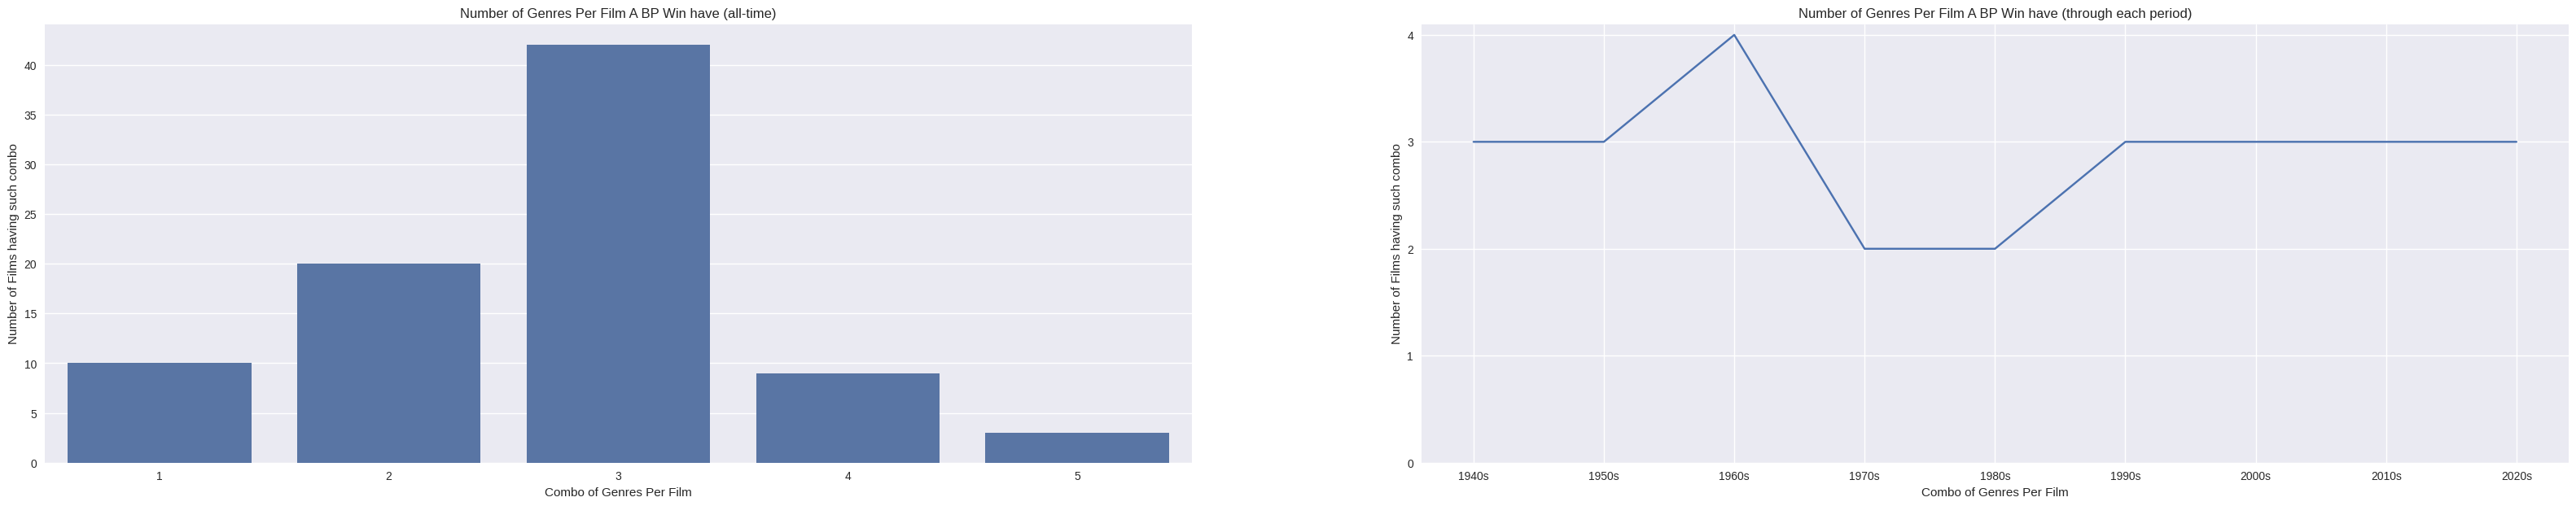

In [ ]:
# @title Most Best Picture Winner is a mix of 3 Genres
genre_combo = bp_winner_imdb[['genre','year_ceremony']].reset_index()
genre_combo['no_of_genre_per_film'] = genre_combo['genre'].str.count(',') + 1
genre_per_film_count = genre_combo[['year_ceremony','no_of_genre_per_film']].reset_index()
#genre_per_film_count = genre_per_film_count_year['no_of_genre_per_film'].value_counts().reset_index()

genre_per_film_2020s = genre_per_film_count[genre_per_film_count['year_ceremony']>2019]['no_of_genre_per_film'].mean().round()
genre_per_film_2010s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(2010,2020,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_2000s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(2000,2009,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_1990s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(1990,2000,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_1980s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(1980,1990,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_1970s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(1970,1980,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_1960s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(1960,1970,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_1950s = genre_per_film_count[genre_per_film_count['year_ceremony'].isin(range(1950,1960,1))]['no_of_genre_per_film'].mean().round()
genre_per_film_1940s = genre_per_film_count[genre_per_film_count['year_ceremony']<1950]['no_of_genre_per_film'].mean().round()

d = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'genre_per_film':[genre_per_film_1940s,genre_per_film_1950s,genre_per_film_1960s,genre_per_film_1970s,genre_per_film_1980s,genre_per_film_1990s,genre_per_film_2000s,genre_per_film_2010s,genre_per_film_2020s]}

genre_per_film_count_by_period = pd.DataFrame(data=d)
genre_per_film_count_by_period

plt.figure(figsize = (40,7))
plt.subplot(121)
sns.barplot(data= genre_per_film_count['no_of_genre_per_film'].value_counts().reset_index(), y='count',x='no_of_genre_per_film')
plt.xlabel('Combo of Genres Per Film')
plt.ylabel('Number of Films having such combo')
plt.title('Number of Genres Per Film A BP Win have (all-time)')

plt.subplot(122)
sns.lineplot(data= genre_per_film_count_by_period, x='period',y='genre_per_film')
plt.xlabel('Combo of Genres Per Film')
plt.ylabel('Number of Films having such combo')
plt.title('Number of Genres Per Film A BP Win have (through each period)')
plt.yticks(np.arange(0, 5, step=1))




Text(0.5, 1.0, 'Top Genres A BP Win likely to have')

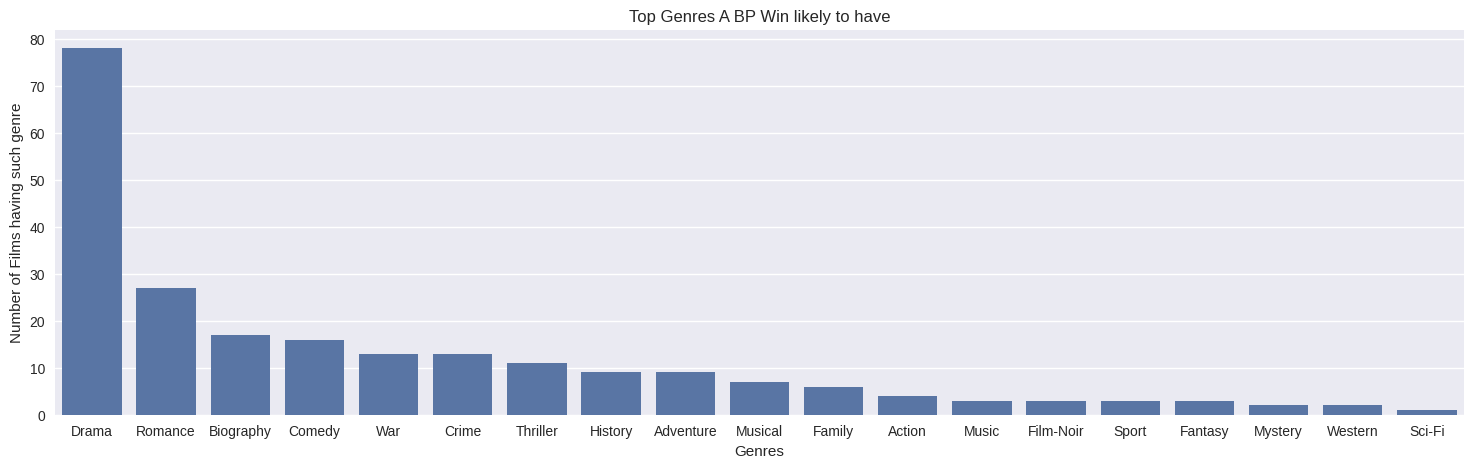

In [ ]:
# @title Among all Best Picture Winners, Drama is the dominant genre
genre = bp_winner_imdb['genre'].str.split(', ', expand = True)
genre['year_ceremony'] = bp_winner['year_ceremony']

#Counting Top Genres represented across Best Picture Winners (all-time)
abs_genre = bp_winner_imdb['genre'].str.split(', ', expand = True)
abs_genre = abs_genre.stack().value_counts().reset_index().rename(columns={'index':'genre', 0:'no_of_films_having_genre'})

unique_genre_count_1940s = round(genre[genre['year_ceremony']<1950].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_1950s = round(genre[genre['year_ceremony'].isin(range(1950,1960))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_1960s = round(genre[genre['year_ceremony'].isin(range(1960,1970))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_1970s = round(genre[genre['year_ceremony'].isin(range(1970,1980))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_1980s = round(genre[genre['year_ceremony'].isin(range(1980,1990))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_1990s = round(genre[genre['year_ceremony'].isin(range(1990,2000))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_2000s = round(genre[genre['year_ceremony'].isin(range(2000,2010))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_2010s = round(genre[genre['year_ceremony'].isin(range(2010,2020))].drop(columns='year_ceremony').stack().nunique()/10)
unique_genre_count_2020s = round(genre[genre['year_ceremony']>2019].drop(columns='year_ceremony').stack().nunique()/4)

d1 = {'period':['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'],
     'genre_per_film':[unique_genre_count_1940s,unique_genre_count_1950s,unique_genre_count_1960s,unique_genre_count_1970s,unique_genre_count_1980s,unique_genre_count_1990s,unique_genre_count_2000s,unique_genre_count_2010s,unique_genre_count_2020s]}

unique_genre_count_by_period = pd.DataFrame(data=d1)
unique_genre_count_by_period


plt.figure(figsize = (40,5))
plt.subplot(121)
sns.barplot(data=abs_genre, y='count',x='genre')
plt.xlabel('Genres')
plt.ylabel('Number of Films having such genre')
plt.title('Top Genres A BP Win likely to have')

#plt.subplot(122)
#sns.lineplot(data= unique_genre_count_by_period, x='period',y='genre_per_film')
#plt.xlabel('Period')
#plt.ylabel('Unique Genres to Number of BP Winners Ratio')
#plt.title('Number of Unique Genres to Number of BP Winners Ratio')
#plt.yticks(np.arange(0, 5,step=1))



In [ ]:
# @title Recent Trend also shows that aside from Drama, [Comedy+Biography] are the most popular genre in recent years (since 2010s). Previous decade also sees certain genres gaining popular: Romance (40s, 50s, 60s, and a resurgence in 90s), Crime (70s & 00s), Musical (60s), War (40s)
genre = bp_winner_imdb['genre'].str.split(', ', expand = True)
genre['year_ceremony'] = bp_winner_imdb['year_ceremony']


genre_1940s = genre[genre['year_ceremony']<1950].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'1940s'})
genre_1950s = genre[genre['year_ceremony'].isin(range(1950,1960))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'1950s'})
genre_1960s = genre[genre['year_ceremony'].isin(range(1960,1970))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'1960s'})
genre_1970s = genre[genre['year_ceremony'].isin(range(1970,1980))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'1970s'})
genre_1980s = genre[genre['year_ceremony'].isin(range(1980,1990))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'1980s'})
genre_1990s = genre[genre['year_ceremony'].isin(range(1990,2000))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'1990s'})
genre_2000s = genre[genre['year_ceremony'].isin(range(2000,2010))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'2000s'})
genre_2010s = genre[genre['year_ceremony'].isin(range(2010,2020))].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'2010s'})
genre_2020s = genre[genre['year_ceremony']>2019].drop(columns='year_ceremony').stack().value_counts().reset_index().rename(columns={'index':'genre', 'count':'2020s'})

genre_by_decade = genre_1940s.merge(genre_1950s,on='genre',how='outer').merge(genre_1960s,on='genre',how='outer')
genre_by_decade = genre_by_decade.merge(genre_1970s,on='genre',how='outer')
genre_by_decade = genre_by_decade.merge(genre_1980s,on='genre',how='outer')
genre_by_decade = genre_by_decade.merge(genre_1990s,on='genre',how='outer')
genre_by_decade = genre_by_decade.merge(genre_2000s,on='genre',how='outer')
genre_by_decade = genre_by_decade.merge(genre_2010s,on='genre',how='outer')
genre_by_decade = genre_by_decade.merge(genre_2020s,on='genre',how='outer')

genre_by_decade.columns = ["genre","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s","2020s"]

genre_by_decade = genre_by_decade.sort_values(by=['2010s','2020s'],ascending=False)

cm = sns.light_palette("green", as_cmap=True)
genre_by_decade=genre_by_decade.style.background_gradient(cmap=cm).highlight_null('grey')
genre_by_decade
#genre_by_decade['1940s'] = genre_by_decade['1940s']/10
#genre_by_decade['1950s'] = genre_by_decade['1950s']/10
#genre_by_decade['1960s'] = genre_by_decade['1960s']/10
#genre_by_decade['1970s'] = genre_by_decade['1970s']/10
#genre_by_decade['1980s'] = genre_by_decade['1980s']/10
#genre_by_decade['1990s'] = genre_by_decade['1990s']/10
#genre_by_decade['2000s'] = genre_by_decade['2000s']/10
#genre_by_decade['2010s'] = genre_by_decade['2010s']/10
#genre_by_decade['2020s'] = (genre_by_decade['2020s']/4).round(1)

Text(0.5, 1.0, 'Release Month among Best Picture Nomineees')

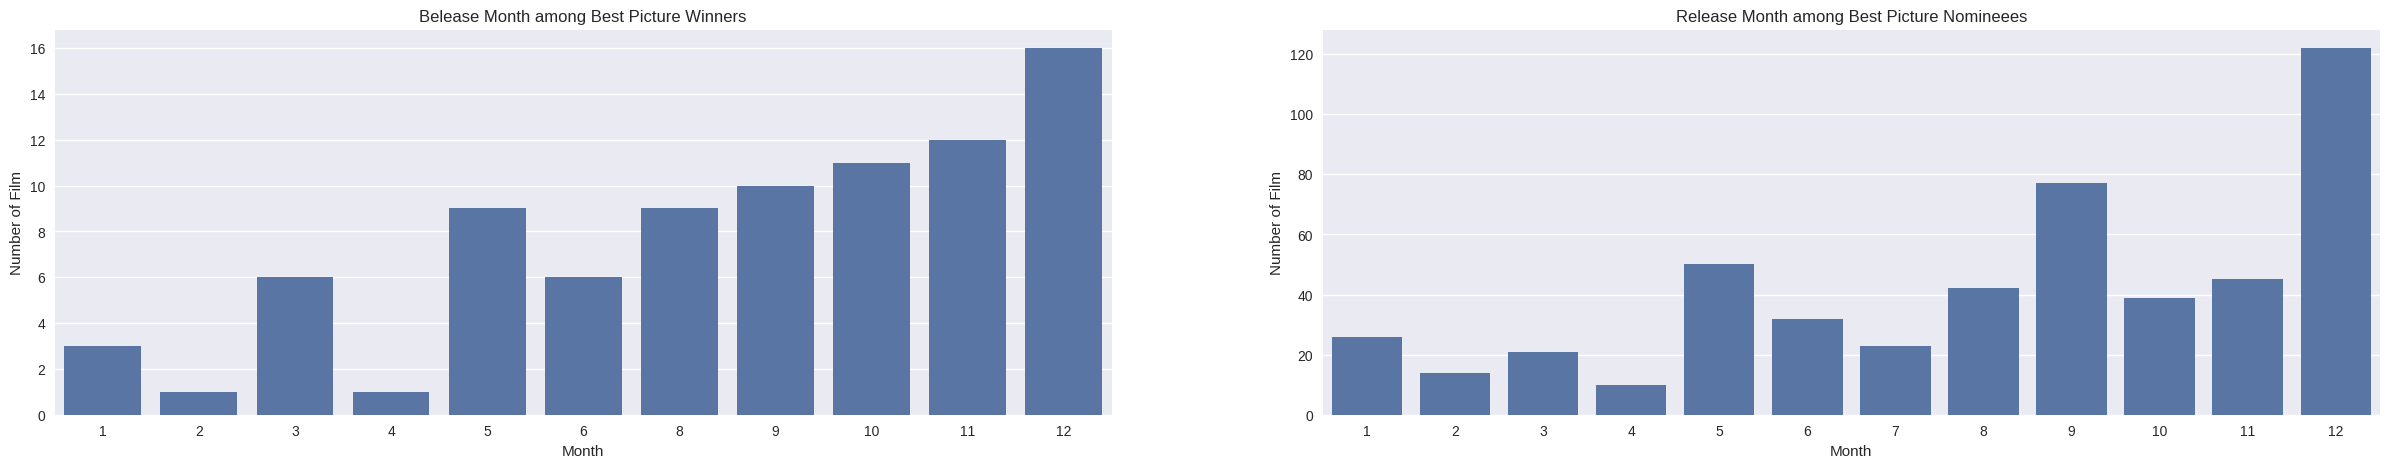

In [ ]:
# @title Historically, majority of Best Picture Nominees are released in May (correlating with Cannes Festival/ Summer Blockbuster Season), September (correlating with most film festivals) & December (Christmas/ close to Oscar Ceremony). Among which, those released in Fall/ Winter Season (Sep-Dec) tend to go on winning Best Picture

bp_nominees['year_film']=bp_nominees['year_ceremony']-1
bp_nominees_imdb = pd.merge(bp_nominees, bp_imdb, on =['film','year_film'])


bp_nominees_imdb['release_date'] = pd.to_datetime(bp_nominees_imdb['release_date'])
release_date_bp_win = bp_nominees_imdb[bp_nominees_imdb['best_picture']=='Win']['release_date']
release_date_bp_win = release_date_bp_win.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'no_of_films'})

release_date_bp_nom = bp_nominees_imdb['release_date']
release_date_bp_nom = release_date_bp_nom.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'no_of_films'})

plt.figure(figsize = (30,5))

#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(121)
sns.barplot(data=release_date_bp_win, y='no_of_films',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Film')
plt.title('Belease Month among Best Picture Winners')
#plt.xticks(ticks=range(,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(122)
sns.barplot(data=release_date_bp_nom, y='no_of_films',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Film')
plt.title('Release Month among Best Picture Nomineees')

Text(0.5, 1.0, '% Best Picture Nominees that win Best Picture')

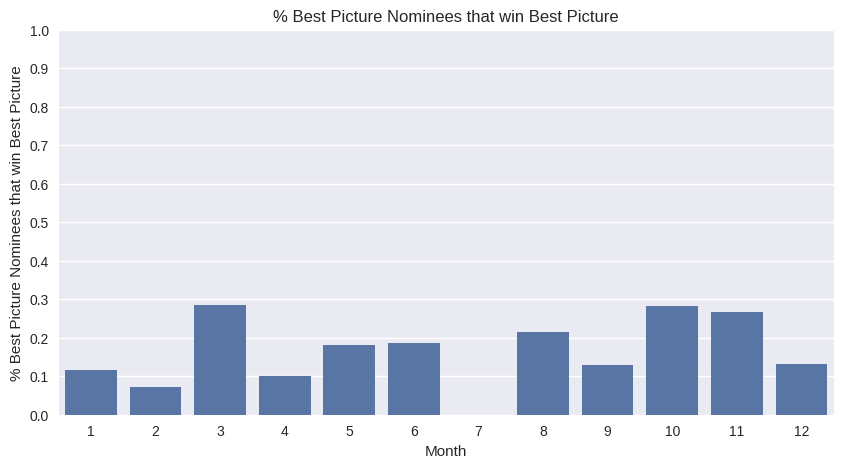

In [ ]:
# @title % Best Picture Nominees that win Best Picture each Month
release_date_bp_win

release_date = release_date_bp_win.rename(columns={'no_of_films':'bp winners'}).merge(release_date_bp_nom,on='month',how='outer')
release_date = release_date.rename(columns={'no_of_films':'bp nominees'})

release_date['bp winners'] = release_date['bp winners'].fillna(0).astype(int)
release_date['%win'] = release_date['bp winners']/ release_date['bp nominees']
release_date = release_date.sort_values(by='month',ascending=True)
release_date


plt.figure(figsize = (10,5))
sns.barplot(data=release_date, y='%win',x='month')
plt.xlabel('Month')
plt.ylabel('% Best Picture Nominees that win Best Picture')
plt.yticks(np.arange(0,1.1,step=0.1))
plt.title('% Best Picture Nominees that win Best Picture')

In [ ]:
# @title Release Month among Best Picture Winner by year
#release_date_bp_nom = best_picture['release_date']

bp_winner=bp_winner_imdb

release_date_bp_win_1940s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(1940,1950)))]['release_date'])
release_date_bp_win_1940s = release_date_bp_win_1940s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'1940s'})

release_date_bp_win_1950s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(1950,1960)))]['release_date'])
release_date_bp_win_1950s = release_date_bp_win_1950s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'1950s'})

release_date_bp_win_1960s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(1960,1970)))]['release_date'])
release_date_bp_win_1960s = release_date_bp_win_1960s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'1960s'})

release_date_bp_win_1970s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(1970,1980)))]['release_date'])
release_date_bp_win_1970s = release_date_bp_win_1970s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'1970s'})

release_date_bp_win_1980s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(1980,1990)))]['release_date'])
release_date_bp_win_1980s = release_date_bp_win_1980s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'1980s'})

release_date_bp_win_1990s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(1990,2000)))]['release_date'])
release_date_bp_win_1990s = release_date_bp_win_1990s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'1990s'})

release_date_bp_win_2000s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(2000,2010)))]['release_date'])
release_date_bp_win_2000s = release_date_bp_win_2000s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'2000s'})

release_date_bp_win_2010s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony'].isin(range(2010,2020)))]['release_date'])
release_date_bp_win_2010s = release_date_bp_win_2010s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'2010s'})

release_date_bp_win_2020s = pd.to_datetime(bp_winner[(bp_winner['best_picture']=='Win') & (bp_winner['year_ceremony']>=2020)]['release_date'])
release_date_bp_win_2020s = release_date_bp_win_2020s.dt.month.value_counts().reset_index().sort_values('release_date',ascending= True).rename(columns={'release_date':'month','count':'2020s'})

release_by_decade = release_date_bp_win_1940s.merge(release_date_bp_win_1950s,on='month',how='outer').merge(release_date_bp_win_1960s,on='month',how='outer')
release_by_decade = release_by_decade.merge(release_date_bp_win_1970s,on='month',how='outer')
release_by_decade = release_by_decade.merge(release_date_bp_win_1980s,on='month',how='outer')
release_by_decade = release_by_decade.merge(release_date_bp_win_1990s,on='month',how='outer')
release_by_decade = release_by_decade.merge(release_date_bp_win_2000s,on='month',how='outer')
release_by_decade = release_by_decade.merge(release_date_bp_win_2010s,on='month',how='outer')
release_by_decade = release_by_decade.merge(release_date_bp_win_2020s,on='month',how='outer')
release_by_decade.columns = ["month","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s","2020s"]

release_by_decade = release_by_decade.sort_values(by='month',ascending=True)

cm = sns.light_palette("green", as_cmap=True)
release_by_decade=release_by_decade.style.background_gradient(cmap=cm).highlight_null('grey')
release_by_decade

Text(0, 0.5, 'Number of Films')

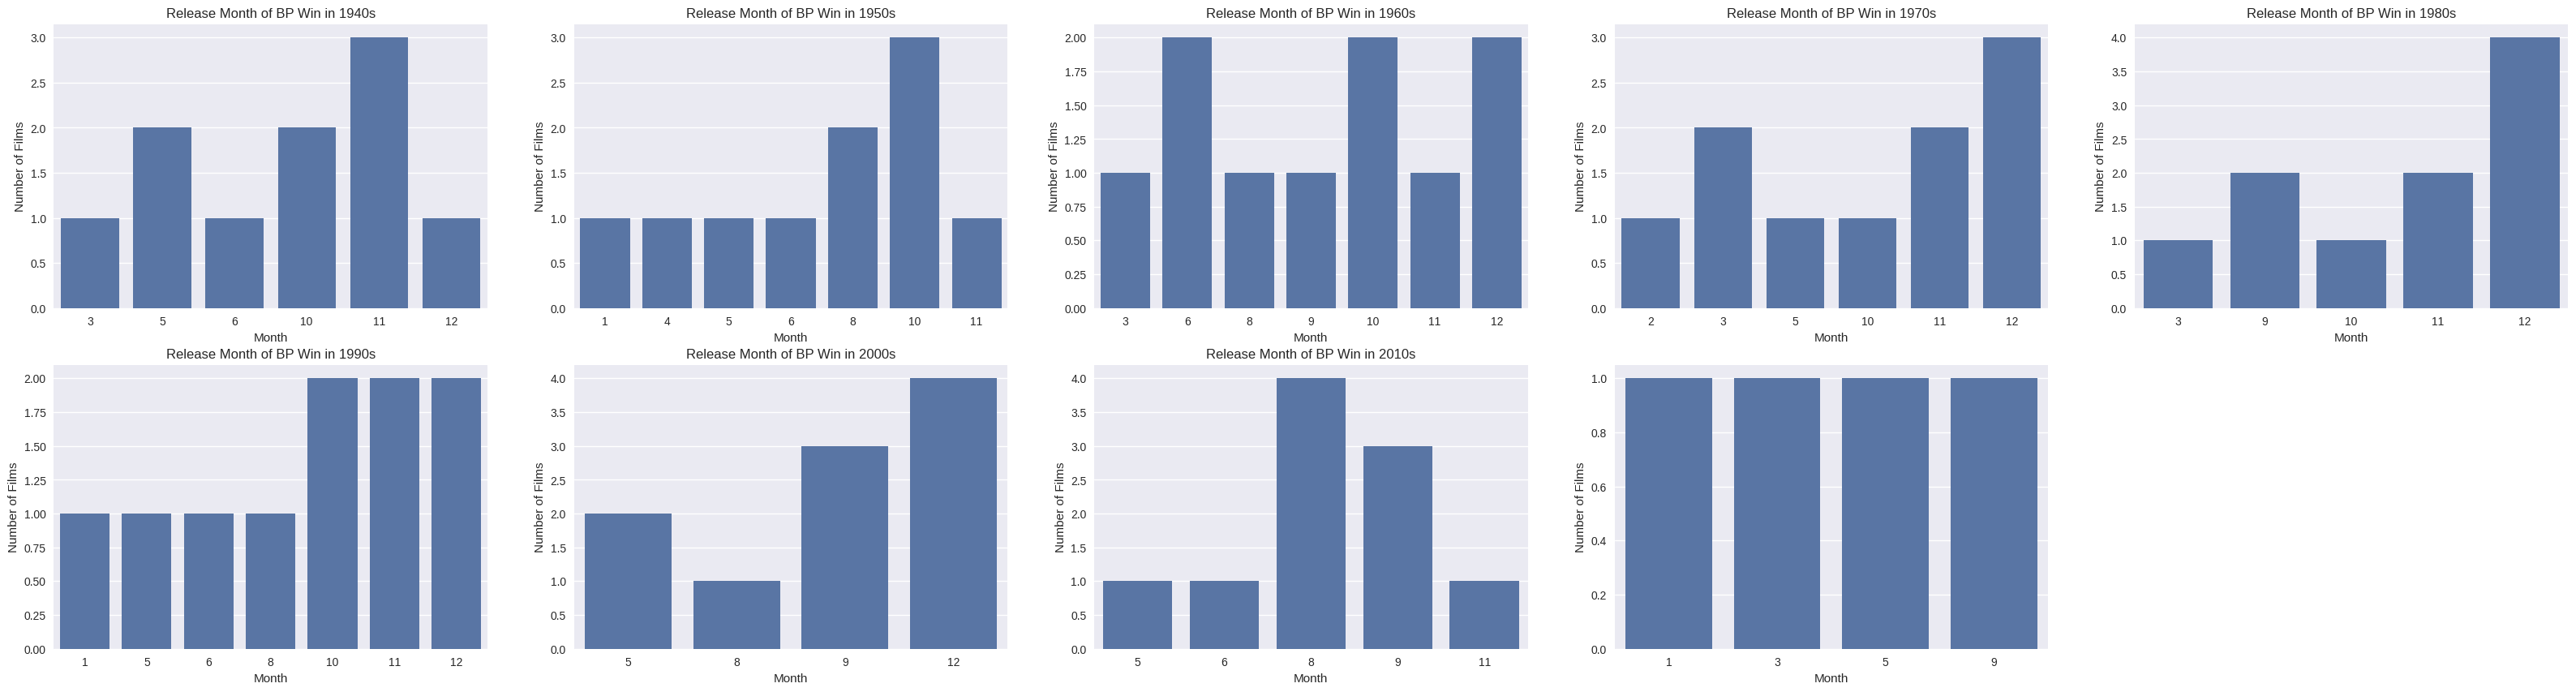

In [ ]:
# @title Visualization of Release Month among Best Picture Winners
plt.figure(figsize = (40,10))

plt.subplot(251)
sns.barplot(data=release_date_bp_win_1940s, y='1940s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 1940s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(252)
sns.barplot(data=release_date_bp_win_1950s,  y='1950s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 1950s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(253)
sns.barplot(data=release_date_bp_win_1960s, y='1960s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 1960s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(254)
sns.barplot(data=release_date_bp_win_1970s, y='1970s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 1970s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(255)
sns.barplot(data=release_date_bp_win_1980s, y='1980s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 1980s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(256)
sns.barplot(data=release_date_bp_win_1990s, y='1990s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 1990s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(257)
sns.barplot(data=release_date_bp_win_2000s,  y='2000s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 2000s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(258)
sns.barplot(data=release_date_bp_win_2010s, y='2010s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Release Month of BP Win in 2010s')
#plt.xticks(ticks=range(0,12), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.subplot(259)
sns.barplot(data=release_date_bp_win_2020s,  y='2020s',x='month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
#plt.title('Release Month of BP Win in 20200s')